# Inspect cross-validation results

In [25]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns

%matplotlib inline

sns.set_style("ticks")

# Configure matplotlib theme.
fontsize = 14
matplotlib_params = {
    'axes.labelsize': fontsize,
    'font.size': fontsize,
    'legend.fontsize': 10,
    'xtick.labelsize': fontsize,
    'ytick.labelsize': fontsize,
    'text.usetex': False,
    'figure.figsize': [6, 4],
    'savefig.dpi': 300,
    'figure.dpi': 300,
    'text.usetex': False
}

plt.rcParams.update(matplotlib_params)

# Turn off spines for all plots.
plt.rc("axes.spines", top=False, right=False)

#plt.style.use("huddlej")

In [63]:
def matthews_correlation_coefficient(tp, tn, fp, fn):
    """Return Matthews correlation coefficient for values from a confusion matrix.
    Implementation is based on the definition from wikipedia:

    https://en.wikipedia.org/wiki/Matthews_correlation_coefficient
    """
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    if denominator == 0:
            denominator = 1

    return float(numerator) / denominator

def get_matthews_correlation_coefficient_for_data_frame(freq_df, return_confusion_matrix=False):
        """Calculate Matthew's correlation coefficient from a given pandas data frame
        with columns for initial, observed, and predicted frequencies.
        """
        observed_growth = (freq_df["observed_freq"] > freq_df["initial_freq"])
        predicted_growth = (freq_df["predicted_freq"] > freq_df["initial_freq"])
        true_positives = ((observed_growth) & (predicted_growth)).sum()
        false_positives= ((~observed_growth) & (predicted_growth)).sum()

        observed_decline = (freq_df["observed_freq"] <= freq_df["initial_freq"])
        predicted_decline = (freq_df["predicted_freq"] <= freq_df["initial_freq"])
        true_negatives = ((observed_decline) & (predicted_decline)).sum()
        false_negatives = ((~observed_decline) & (predicted_decline)).sum()

        mcc = matthews_correlation_coefficient(
            true_positives,
            true_negatives,
            false_positives,
            false_negatives
        )

        if return_confusion_matrix:
            confusion_matrix = {
                "tp": true_positives,
                "tn": true_negatives,
                "fp": false_positives,
                "fn": false_negatives
            }

            return mcc, confusion_matrix
        else:
            return mcc

def accuracy(tp, tn, fp, fn):
    return (tp + tn) / float(tp + tn + fp + fn)

def calculate_correlation_for_df(df):    
    return pearsonr(df["observed_growth_rate"], df["predicted_growth_rate"])[0]

def mse_for_df(df):    
    return np.square(df["observed_freq"] - df["predicted_freq"]).sum() / df["observed_freq"].shape[0]

def facet_time_plot(data, value, value_label, timepoint_column="timepoint", predictors_column="predictors"):
    g = sns.FacetGrid(data, col=predictors_column, col_wrap=3, height=4)
    g.map_dataframe(sns.lineplot, x=timepoint_column, y=value, estimator="mean", ci="sd", markers=True, dashes=False,
                   style=predictors_column)
    g.set_axis_labels("Date", value_label)

    for ax in g.axes.flatten():
        ax.axhline(y=0, color="#cccccc")

        start, end = [int(value) for value in ax.get_xlim()]
        end = end + 1
        stepsize = 2.0
        ax.xaxis.set_ticks(np.arange(start, end, stepsize))

        labels = ax.get_xticklabels()
        output = plt.setp(labels, rotation=30)
        
    return g

In [3]:
df = pd.read_table("model_validation_20190204.tab", keep_default_na=False, na_values="N/A")

In [4]:
df.shape

(66, 23)

In [5]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors     ...      test_timepoint  testing_accuracy  \
0       null     ...             2012.25               0.0   
1       null     ...             2012.75               0.0   
2       null     ...             2013.25               0.0   
3       null     ...             2013.75               0.0   
4       null     ...             2014.25               0.0   

   testing_correlation  tn  tp  training_accuracy  training_correlation  \
0            -0.032544  48   0           0.066827              0.007788   
1             0.014051  23   0           0.071165             -0.002537   
2            -0.151211   0  37          -0.016591             -0.136689   
3            -0.004386   0  33          -0.054463             -0.139167   
4             0.139972   0  11           0.029775             -0.138286   

   training_windows  viruses  year_range  
0                 9       92   2006-2018  
1                10       92   2006-2018  
2                11       92   2006-2018  
3                12       92   2006-2018  
4                13       92   2006-2018  

[5 rows x 23 columns]

In [6]:
df["predictors"].unique()

array(['null', 'ep_x', 'ne_star', 'lbi', 'cTiterSub',
       'ne_star-lbi-cTiterSub'], dtype=object)

In [7]:
df[[col for col in df.columns if col.startswith("parameter")]]

parameter-cTiterSub  parameter-ep_x  parameter-lbi  parameter-ne_star  \
0                   NaN             NaN            NaN                NaN   
1                   NaN             NaN            NaN                NaN   
2                   NaN             NaN            NaN                NaN   
3                   NaN             NaN            NaN                NaN   
4                   NaN             NaN            NaN                NaN   
5                   NaN             NaN            NaN                NaN   
6                   NaN             NaN            NaN                NaN   
7                   NaN             NaN            NaN                NaN   
8                   NaN             NaN            NaN                NaN   
9                   NaN             NaN            NaN                NaN   
10                  NaN             NaN            NaN                NaN   
11                  NaN       -0.378752            NaN                NaN   
12                  NaN       -0.237035            NaN                NaN   
13                  NaN        0.966750            NaN                NaN   
14                  NaN        1.850313            NaN                NaN   
15                  NaN        1.918271            NaN                NaN   
16                  NaN        1.872375            NaN                NaN   
17                  NaN        1.772548            NaN                NaN   
18                  NaN        1.442443            NaN                NaN   
19                  NaN        1.297493            NaN                NaN   
20                  NaN        1.195065            NaN                NaN   
21                  NaN        1.051214            NaN                NaN   
22                  NaN             NaN            NaN          -3.580829   
23                  NaN             NaN            NaN          -2.400800   
24                  NaN             NaN            NaN          -0.752468   
25                  NaN             NaN            NaN          -0.955643   
26                  NaN             NaN            NaN          -1.392274   
27                  NaN             NaN            NaN          -1.384136   
28                  NaN             NaN            NaN          -1.005357   
29                  NaN             NaN            NaN          -1.015326   
..                  ...             ...            ...                ...   
36                  NaN             NaN       0.515384                NaN   
37                  NaN             NaN       0.531220                NaN   
38                  NaN             NaN       0.527898                NaN   
39                  NaN             NaN       0.520259                NaN   
40                  NaN             NaN       0.496341                NaN   
41                  NaN             NaN       0.528692                NaN   
42                  NaN             NaN       0.526888                NaN   
43                  NaN             NaN       0.521334                NaN   
44            -0.033296             NaN            NaN                NaN   
45            -0.021812             NaN            NaN                NaN   
46             0.068481             NaN            NaN                NaN   
47             0.584201             NaN            NaN                NaN   
48             0.672898             NaN            NaN                NaN   
49             0.680286             NaN            NaN                NaN   
50             0.792522             NaN            NaN                NaN   
51             0.822809             NaN            NaN                NaN   
52             0.898994             NaN            NaN                NaN   
53             0.900040             NaN            NaN                NaN   
54             0.890771             NaN            NaN                NaN   
55             0.372558             NaN       0.374053           0.553177   


In [9]:
df.columns

Index([u'fn', u'fp', u'last_training_timepoint', u'n_samples',
       u'parameter-cTiterSub', u'parameter-ep_x', u'parameter-lbi',
       u'parameter-ne_star', u'parameter-null', u'predictors', u'sae',
       u'sample', u'sse', u'test_timepoint', u'testing_accuracy',
       u'testing_correlation', u'tn', u'tp', u'training_accuracy',
       u'training_correlation', u'training_windows', u'viruses',
       u'year_range'],
      dtype='object')

In [10]:
predictor_order = ["null", "ep_x", "cTiterSub", "ne_star", "dms", "lbi", "ne_star-lbi-cTiterSub"]

In [11]:
predictor_names = {
    "null": "null",
    "ep_x": "epitope muts",
    "cTiterSub": "HI phenotypes",
    "ne_star": "non-epitope muts",
    "dms": "DMS phenotypes",
    "lbi": "LBI",
    "ne_star-lbi-cTiterSub": "composite"
}

In [12]:
predictor_names_order = [predictor_names[predictor] for predictor in predictor_order]

In [13]:
df = df[df.predictors.isin(predictor_order)].copy()

In [14]:
df["predictor_name"] = df["predictors"].apply(lambda predictor: predictor_names[predictor])

In [15]:
df["mse"] = df["sse"] / df["n_samples"]

In [16]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors    ...     testing_correlation  tn  tp  training_accuracy  \
0       null    ...               -0.032544  48   0           0.066827   
1       null    ...                0.014051  23   0           0.071165   
2       null    ...               -0.151211   0  37          -0.016591   
3       null    ...               -0.004386   0  33          -0.054463   
4       null    ...                0.139972   0  11           0.029775   

   training_correlation  training_windows  viruses  year_range  \
0              0.007788                 9       92   2006-2018   
1             -0.002537                10       92   2006-2018   
2             -0.136689                11       92   2006-2018   
3             -0.139167                12       92   2006-2018   
4             -0.138286                13       92   2006-2018   

   predictor_name       mse  
0            null  0.162928  
1            null  0.211803  
2            null  0.045557  
3            null  0.010750  
4            null  0.115989  

[5 rows x 25 columns]

In [17]:
df.loc[:, ["test_timepoint", "n_samples"]].drop_duplicates()

test_timepoint  n_samples
0          2012.25        101
1          2012.75         59
2          2013.25         51
3          2013.75         51
4          2014.25         34
5          2014.75         41
6          2015.25         35
7          2015.75         36
8          2016.25         42
9          2016.75         63
10         2017.25         55

In [18]:
agg_functions = ["mean", "std"]
np.around(df.groupby("predictor_name").aggregate({
    "testing_accuracy": agg_functions,
    "mse": agg_functions,
    "testing_correlation": agg_functions
}).sort_values([("mse", "mean")]), 3)

testing_accuracy           mse        testing_correlation  \
                             mean    std   mean    std                mean   
predictor_name                                                               
composite                   0.555  0.427  0.060  0.080               0.565   
HI phenotypes               0.330  0.590  0.076  0.078               0.275   
LBI                         0.153  0.615  0.081  0.088               0.222   
null                        0.000  0.000  0.090  0.084               0.004   
non-epitope muts           -0.066  0.557  0.093  0.084              -0.152   
epitope muts               -0.266  0.371  0.105  0.101              -0.096   

                         
                    std  
predictor_name           
composite         0.387  
HI phenotypes     0.541  
LBI               0.578  
null              0.075  
non-epitope muts  0.398  
epitope muts      0.578

In [19]:
error_df = df.groupby("predictor_name").aggregate({"sse": "sum", "sae": "sum", "n_samples": "sum"})

In [20]:
# Calculate mean squared error.
mse = (error_df["sse"] / error_df["n_samples"]).sort_values()
mse

predictor_name
composite           0.064354
HI phenotypes       0.085731
LBI                 0.086120
null                0.095495
non-epitope muts    0.097186
epitope muts        0.109379
dtype: float64

In [21]:
mse_df = mse.reset_index().rename({0: "mse"}, axis=1)
mse_df

predictor_name       mse
0         composite  0.064354
1     HI phenotypes  0.085731
2               LBI  0.086120
3              null  0.095495
4  non-epitope muts  0.097186
5      epitope muts  0.109379

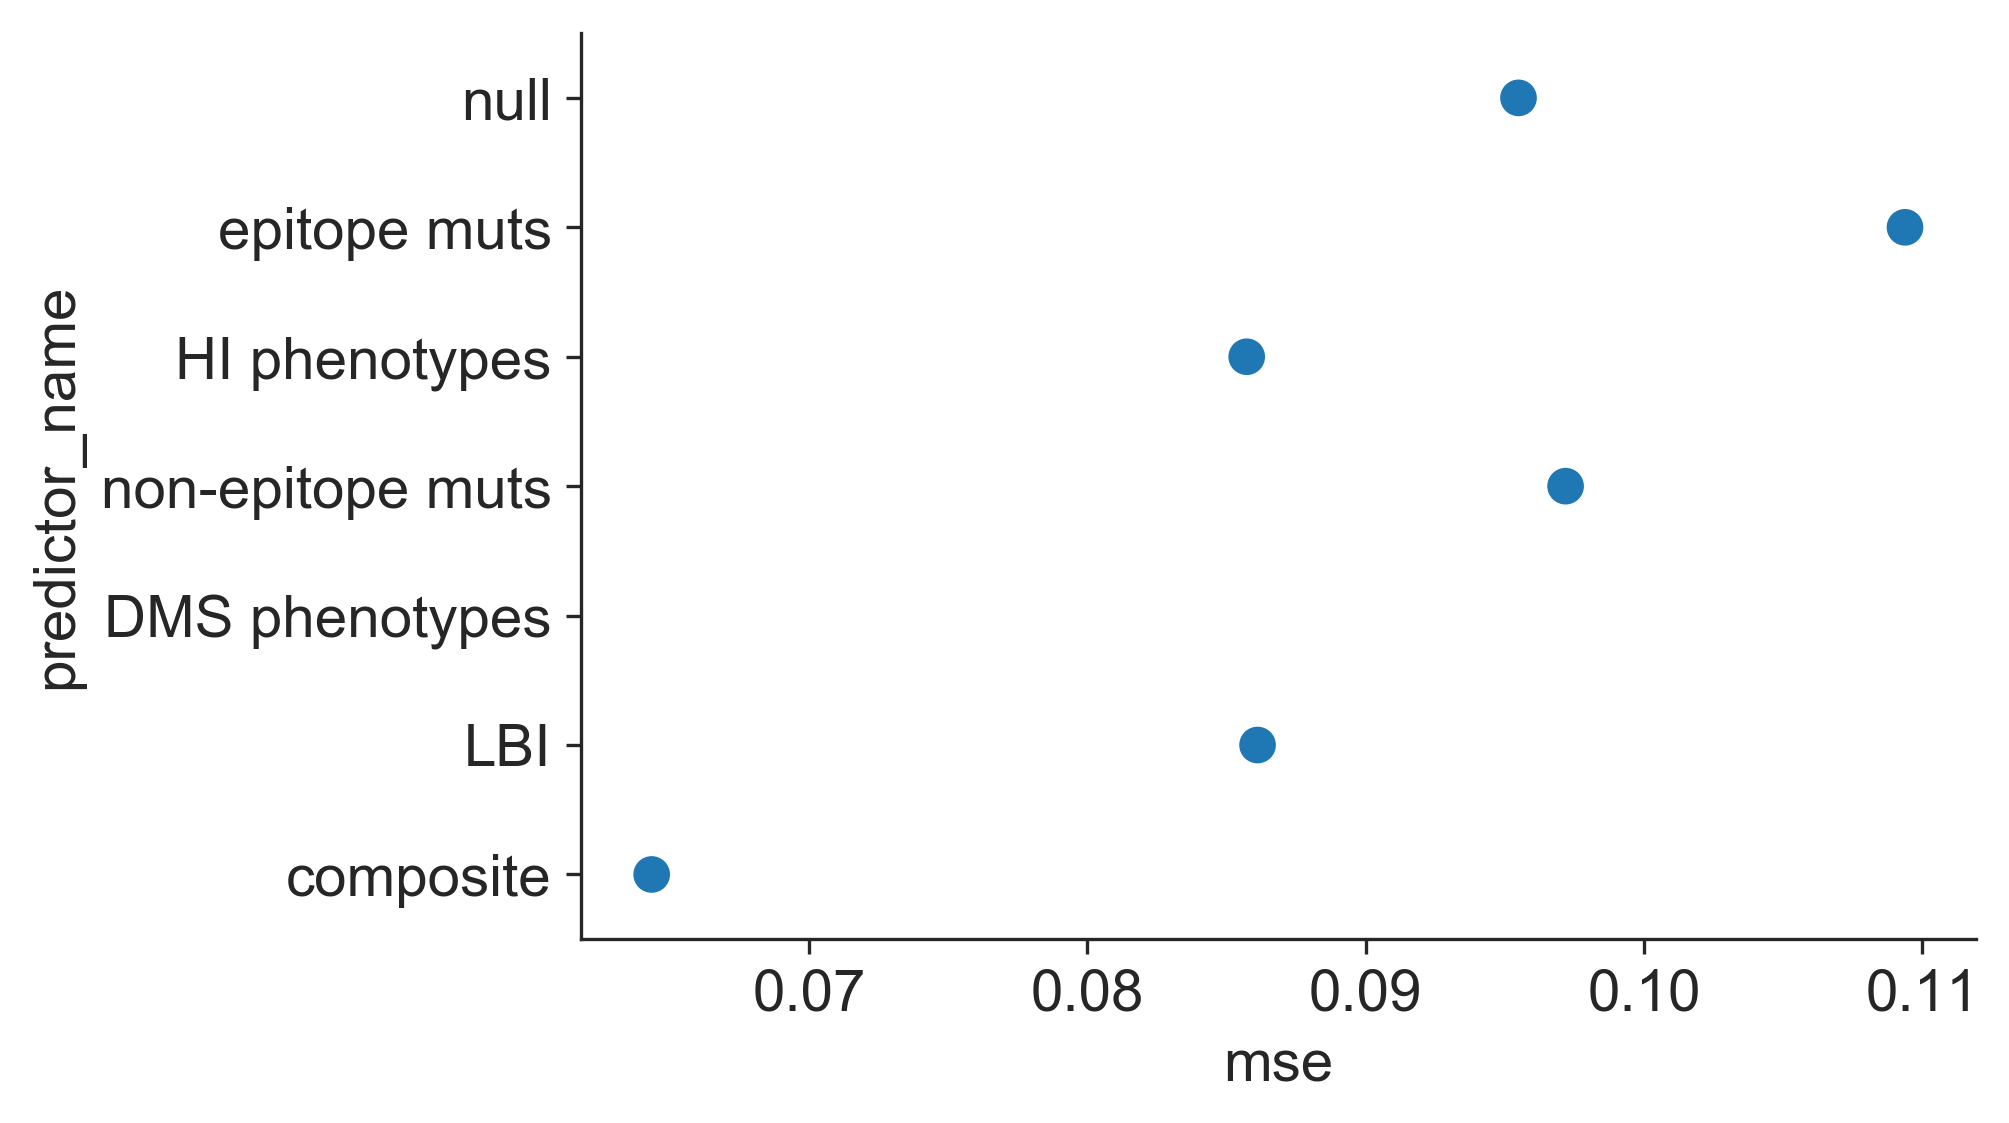

In [26]:
sns.pointplot(
    x="mse",
    y="predictor_name",
    data=mse_df,
    join=False,
    order=predictor_names_order
)

In [23]:
# Calculate mean absolute error
mae = (error_df["sae"] / error_df["n_samples"]).sort_values()
mae

predictor_name
composite           0.173211
HI phenotypes       0.211781
LBI                 0.213480
null                0.228155
non-epitope muts    0.231297
epitope muts        0.239856
dtype: float64

In [24]:
mae_df = mae.reset_index().rename({0: "mae"}, axis=1)
mae_df

predictor_name       mae
0         composite  0.173211
1     HI phenotypes  0.211781
2               LBI  0.213480
3              null  0.228155
4  non-epitope muts  0.231297
5      epitope muts  0.239856

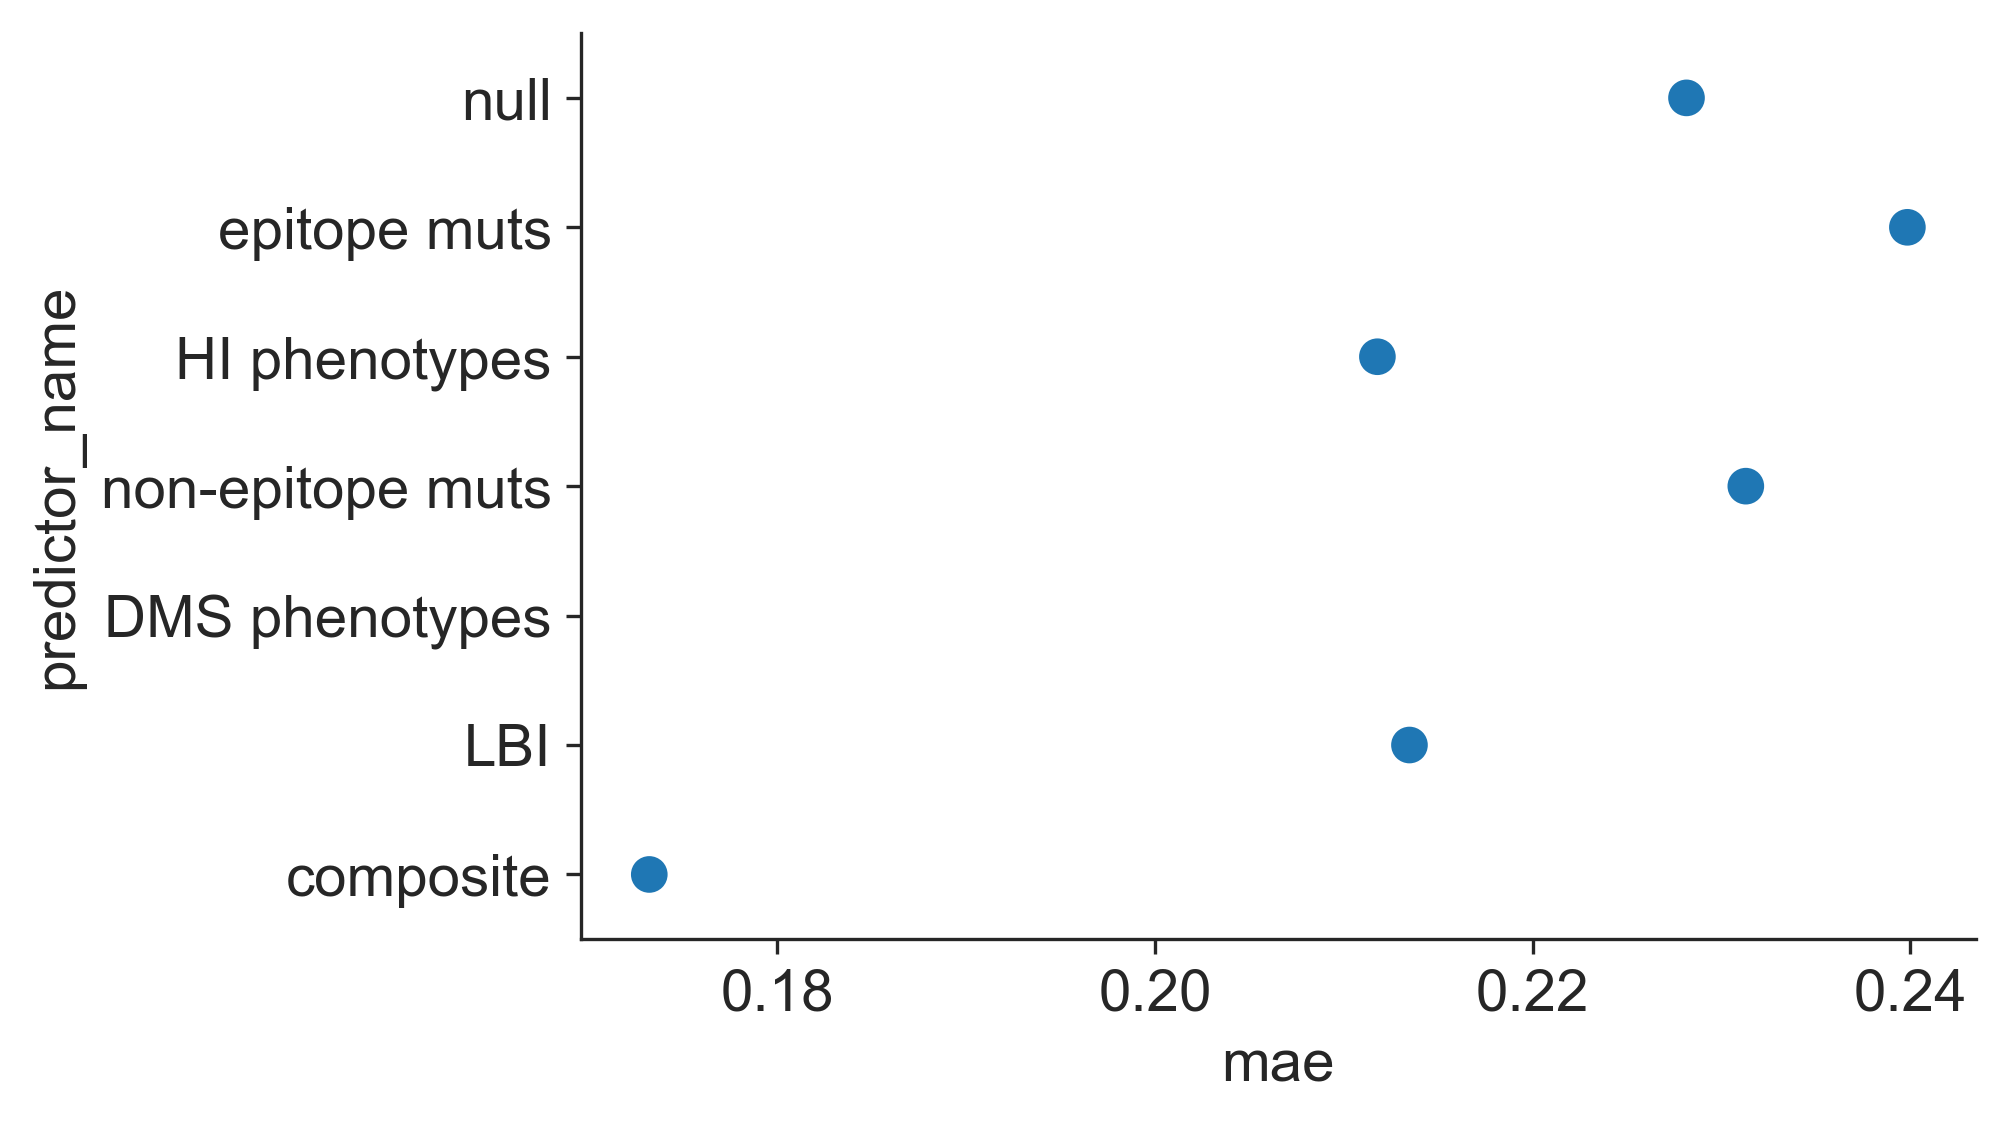

In [27]:
sns.pointplot(
    x="mae",
    y="predictor_name",
    data=mae_df,
    join=False,
    order=predictor_names_order
)

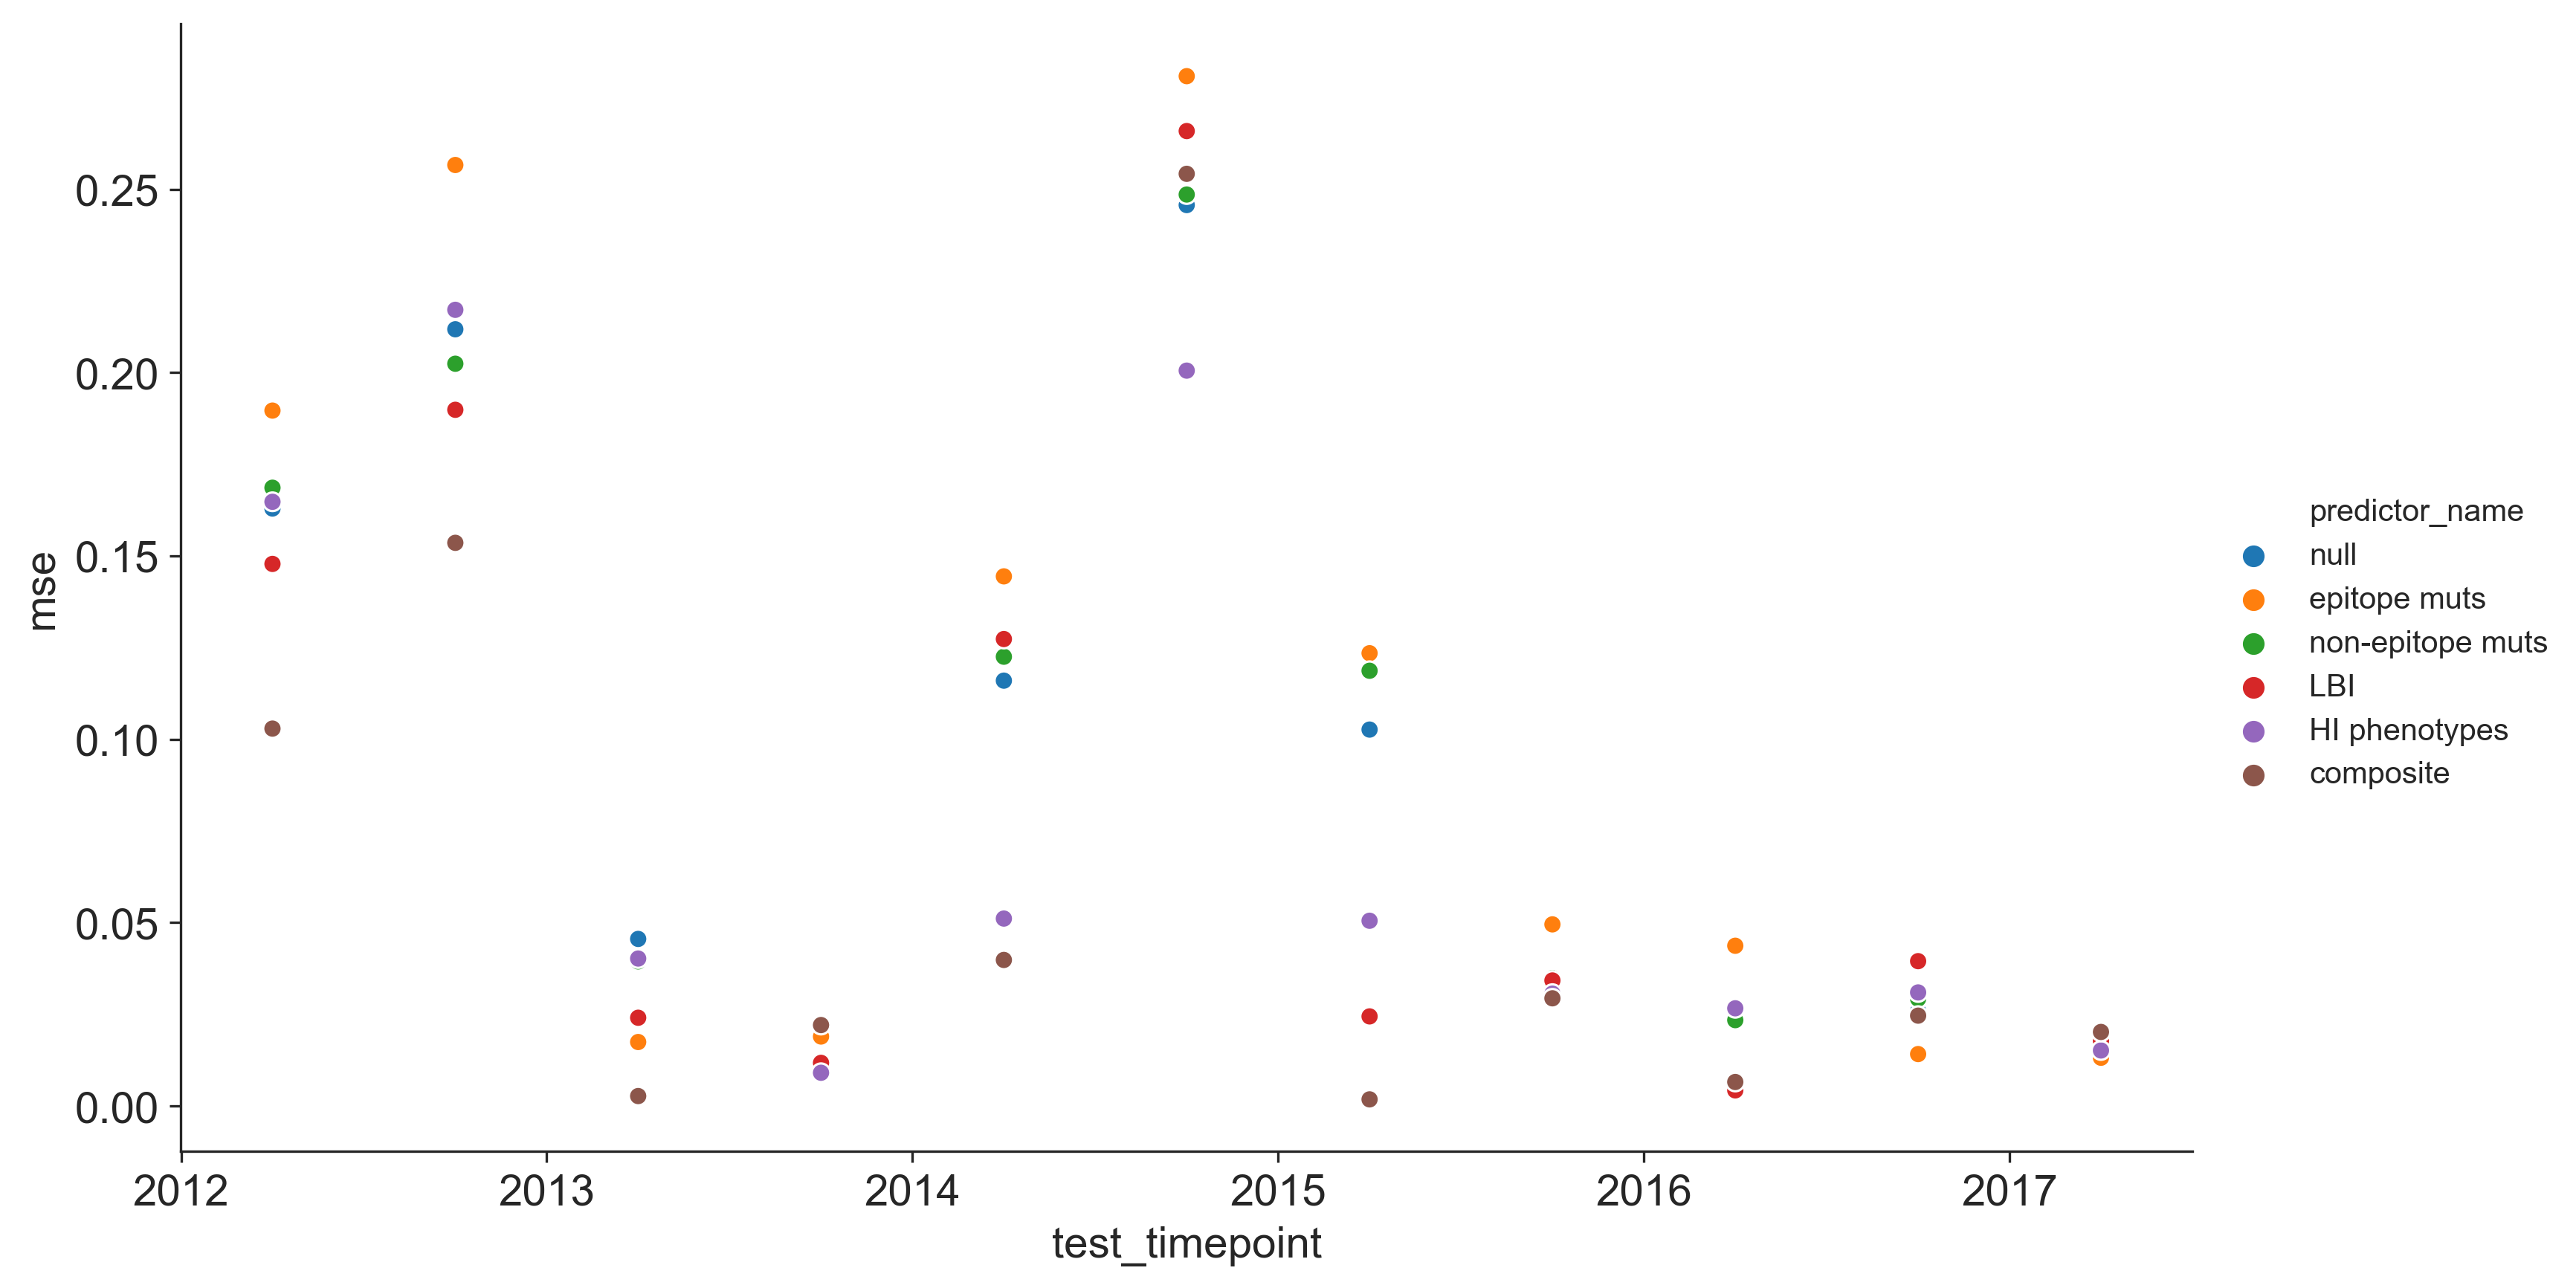

In [28]:
g = sns.relplot(
    "test_timepoint",
    "mse",
    hue="predictor_name",
    data=df,
    height=6,
    aspect=1.7,
    kind="scatter"
)
#for ax in g.axes.flatten():
#    ax.set_xlim(df["test_timepoint"].min() - 1, df["test_timepoint"].max() + 1)

In [29]:
df.columns

Index([u'fn', u'fp', u'last_training_timepoint', u'n_samples',
       u'parameter-cTiterSub', u'parameter-ep_x', u'parameter-lbi',
       u'parameter-ne_star', u'parameter-null', u'predictors', u'sae',
       u'sample', u'sse', u'test_timepoint', u'testing_accuracy',
       u'testing_correlation', u'tn', u'tp', u'training_accuracy',
       u'training_correlation', u'training_windows', u'viruses', u'year_range',
       u'predictor_name', u'mse'],
      dtype='object')

In [30]:
df["test_timepoint"].drop_duplicates()

0     2012.25
1     2012.75
2     2013.25
3     2013.75
4     2014.25
5     2014.75
6     2015.25
7     2015.75
8     2016.25
9     2016.75
10    2017.25
Name: test_timepoint, dtype: float64

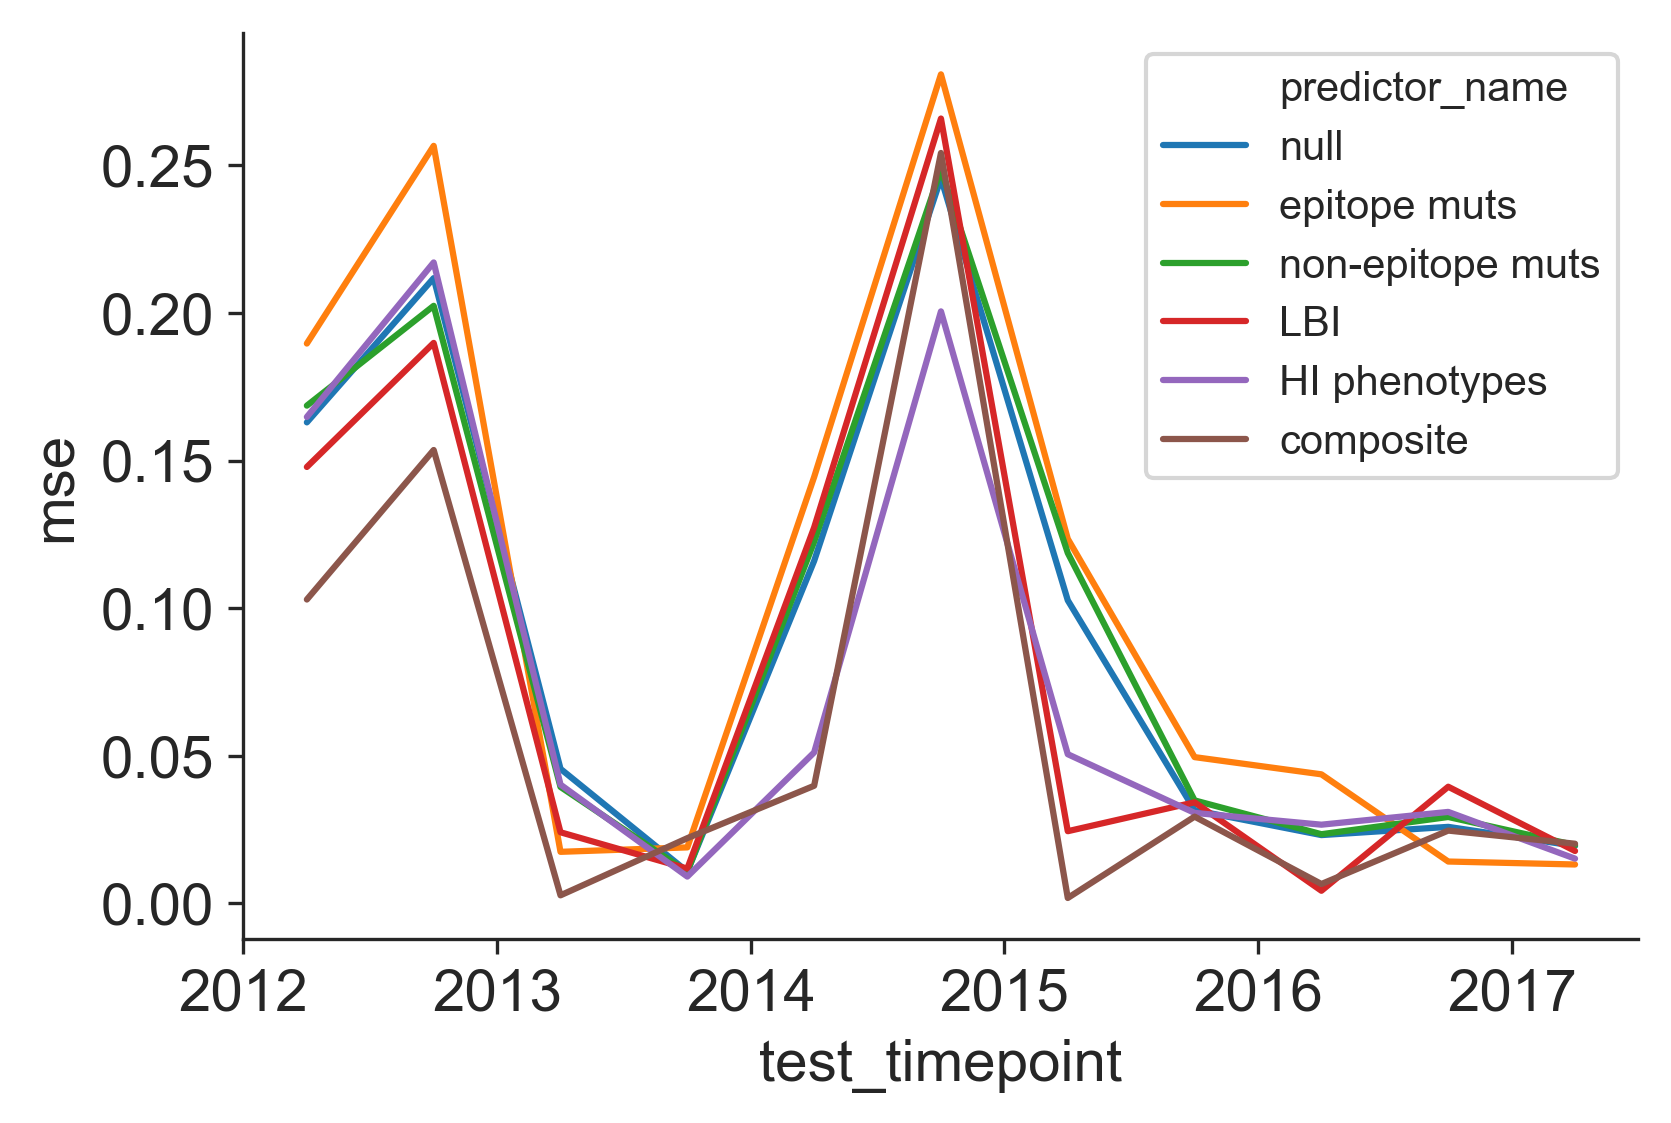

In [31]:
sns.lineplot(
    "test_timepoint",
    "mse",
    data=df,
    ci="sd",
    markers=True,
    dashes=False,
    hue="predictor_name"
)

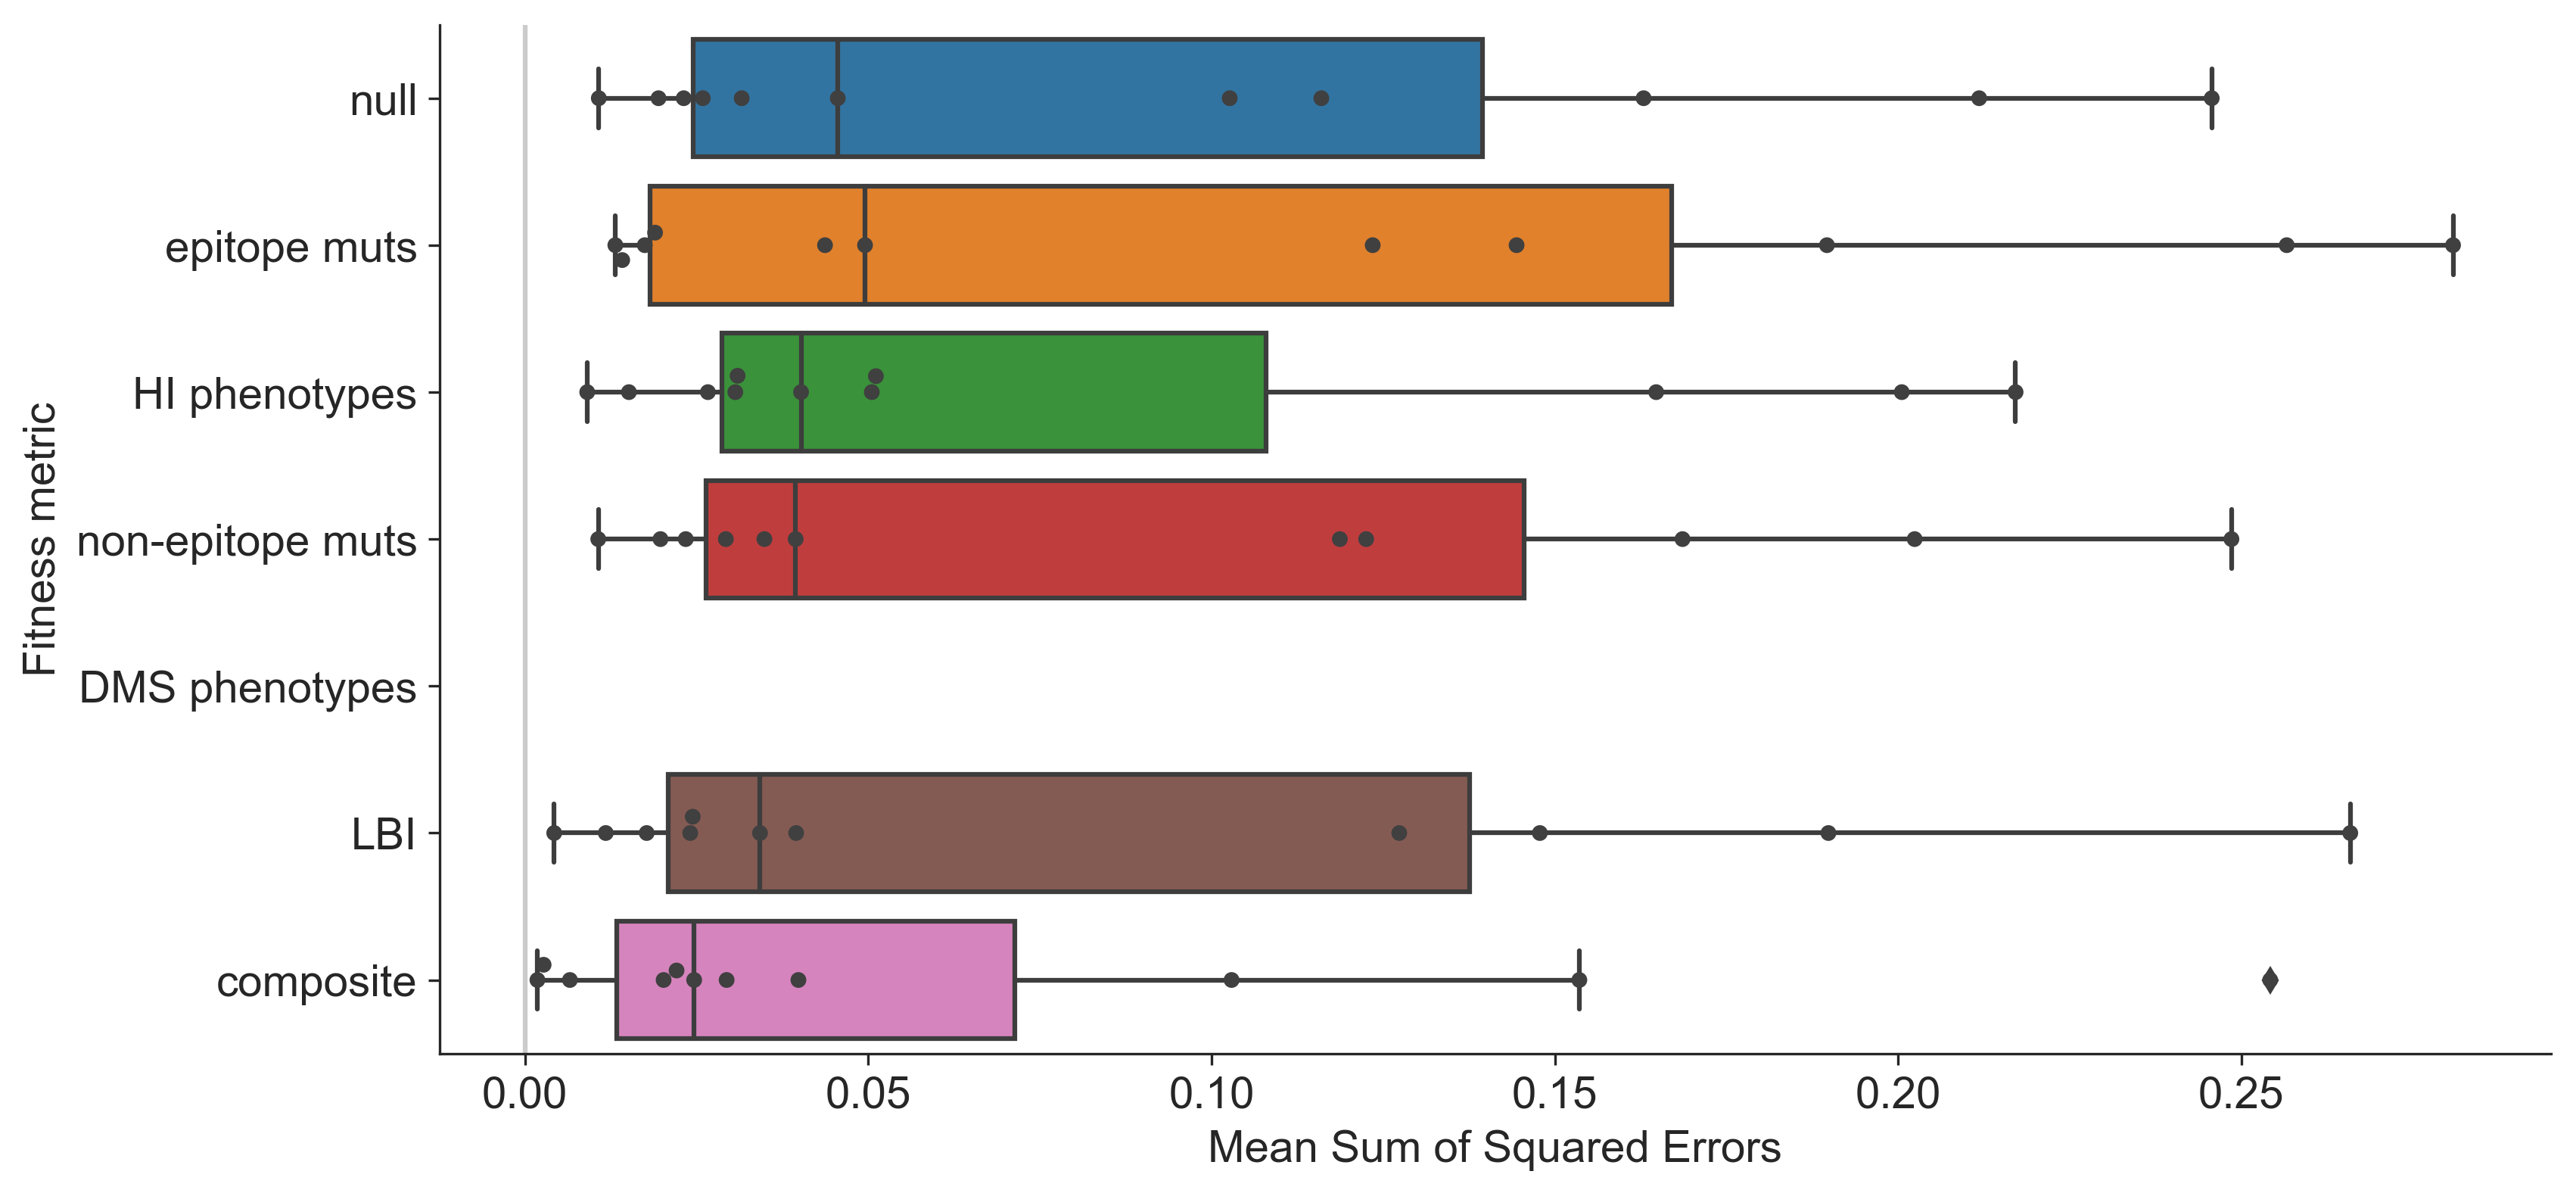

In [32]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictor_name",
    x="mse",
    data=df,
    ax=ax,
    order=predictor_names_order
)
sns.swarmplot(
    y="predictor_name",
    x="mse",
    data=df,
    ax=ax,
    color="0.25",
    order=predictor_names_order
)

ax.set_xlabel("Mean Sum of Squared Errors")
ax.set_ylabel("Fitness metric")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

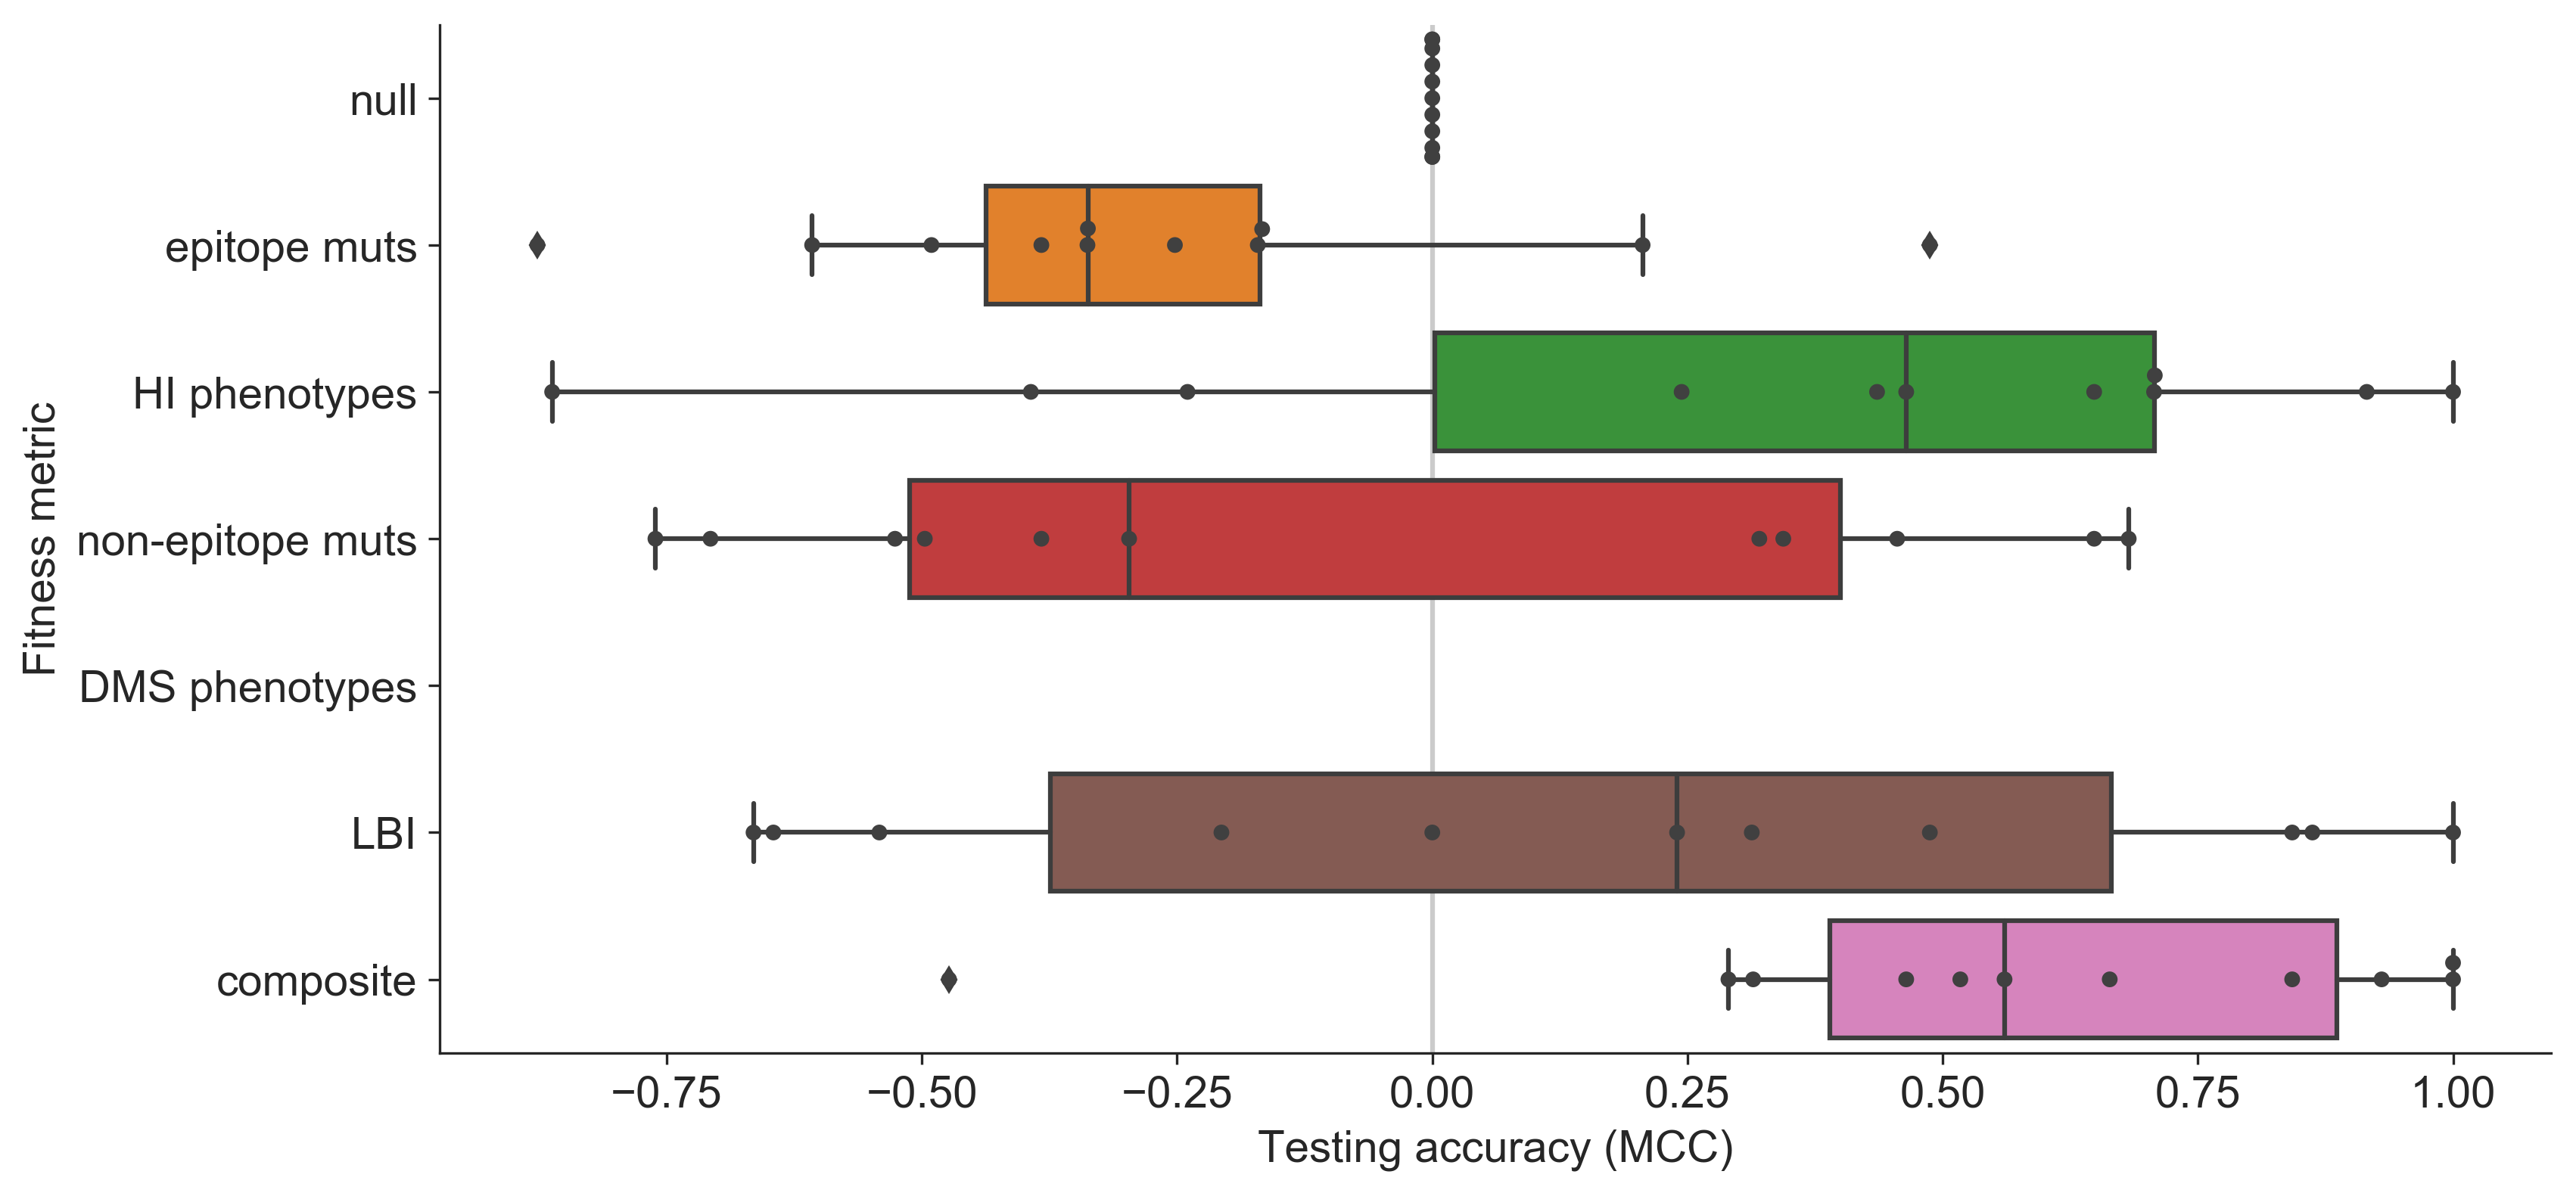

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictor_name",
    x="testing_accuracy",
    data=df,
    ax=ax,
    order=predictor_names_order
)
sns.swarmplot(
    y="predictor_name",
    x="testing_accuracy",
    data=df,
    ax=ax,
    color="0.25",
    order=predictor_names_order
)

ax.set_xlabel("Testing accuracy (MCC)")
ax.set_ylabel("Fitness metric")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

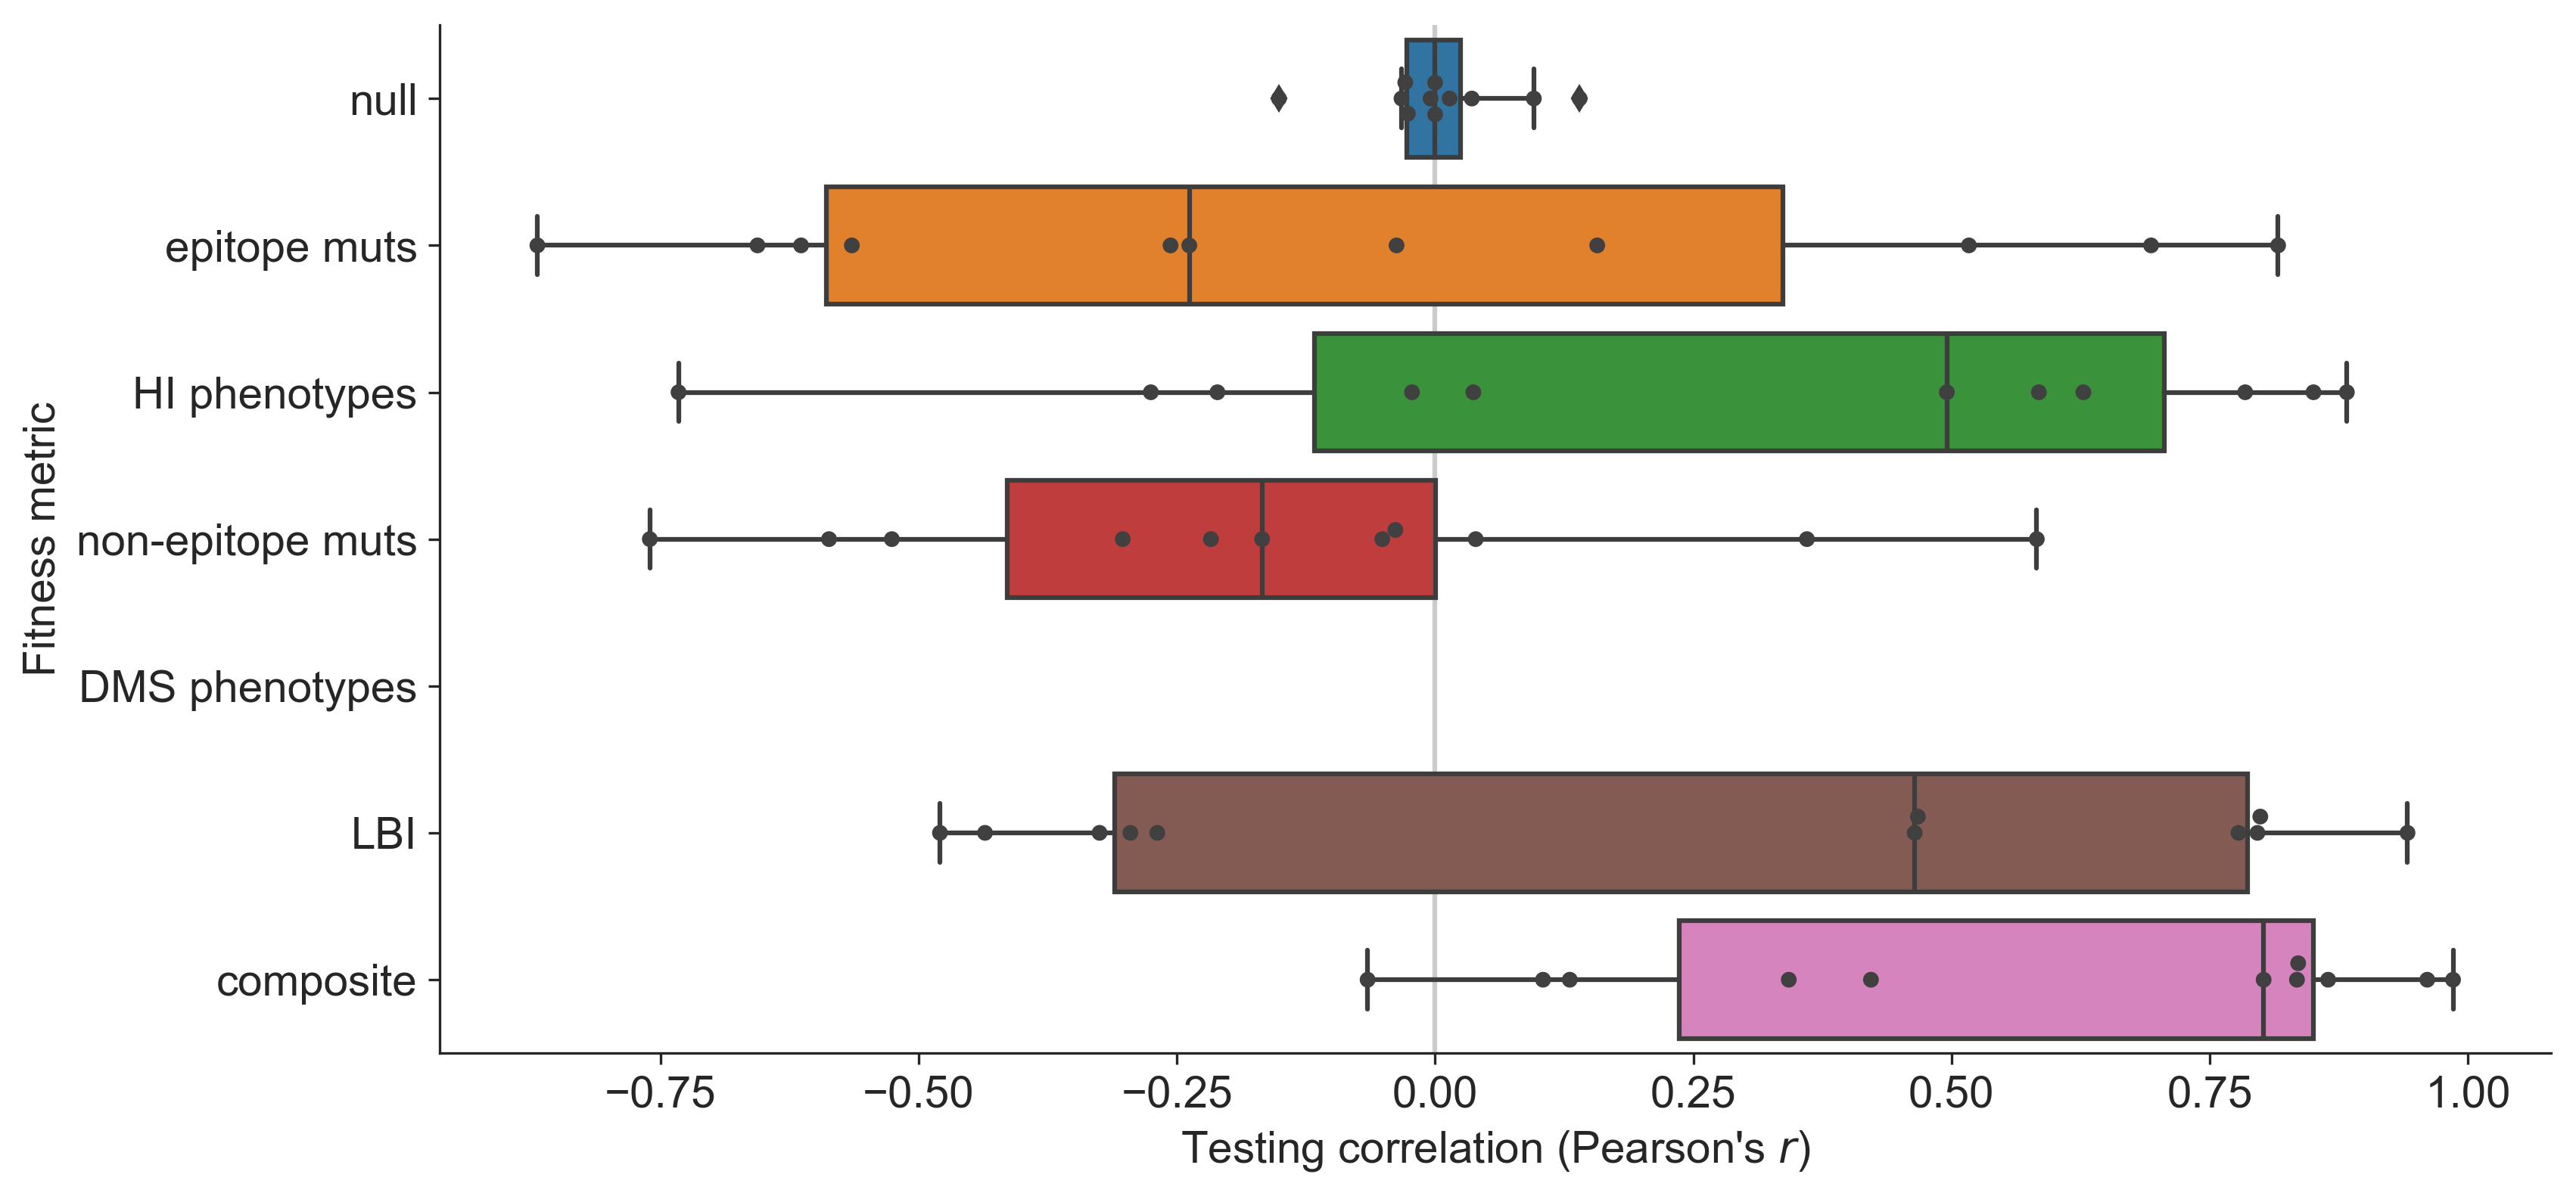

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictor_name",
    x="testing_correlation",
    data=df,
    ax=ax,
    order=predictor_names_order
)
sns.swarmplot(
    y="predictor_name",
    x="testing_correlation",
    data=df,
    ax=ax,
    color="0.25",
    order=predictor_names_order
)

ax.set_xlabel("Testing correlation (Pearson's $r$)")
ax.set_ylabel("Fitness metric")
ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)

sns.despine()

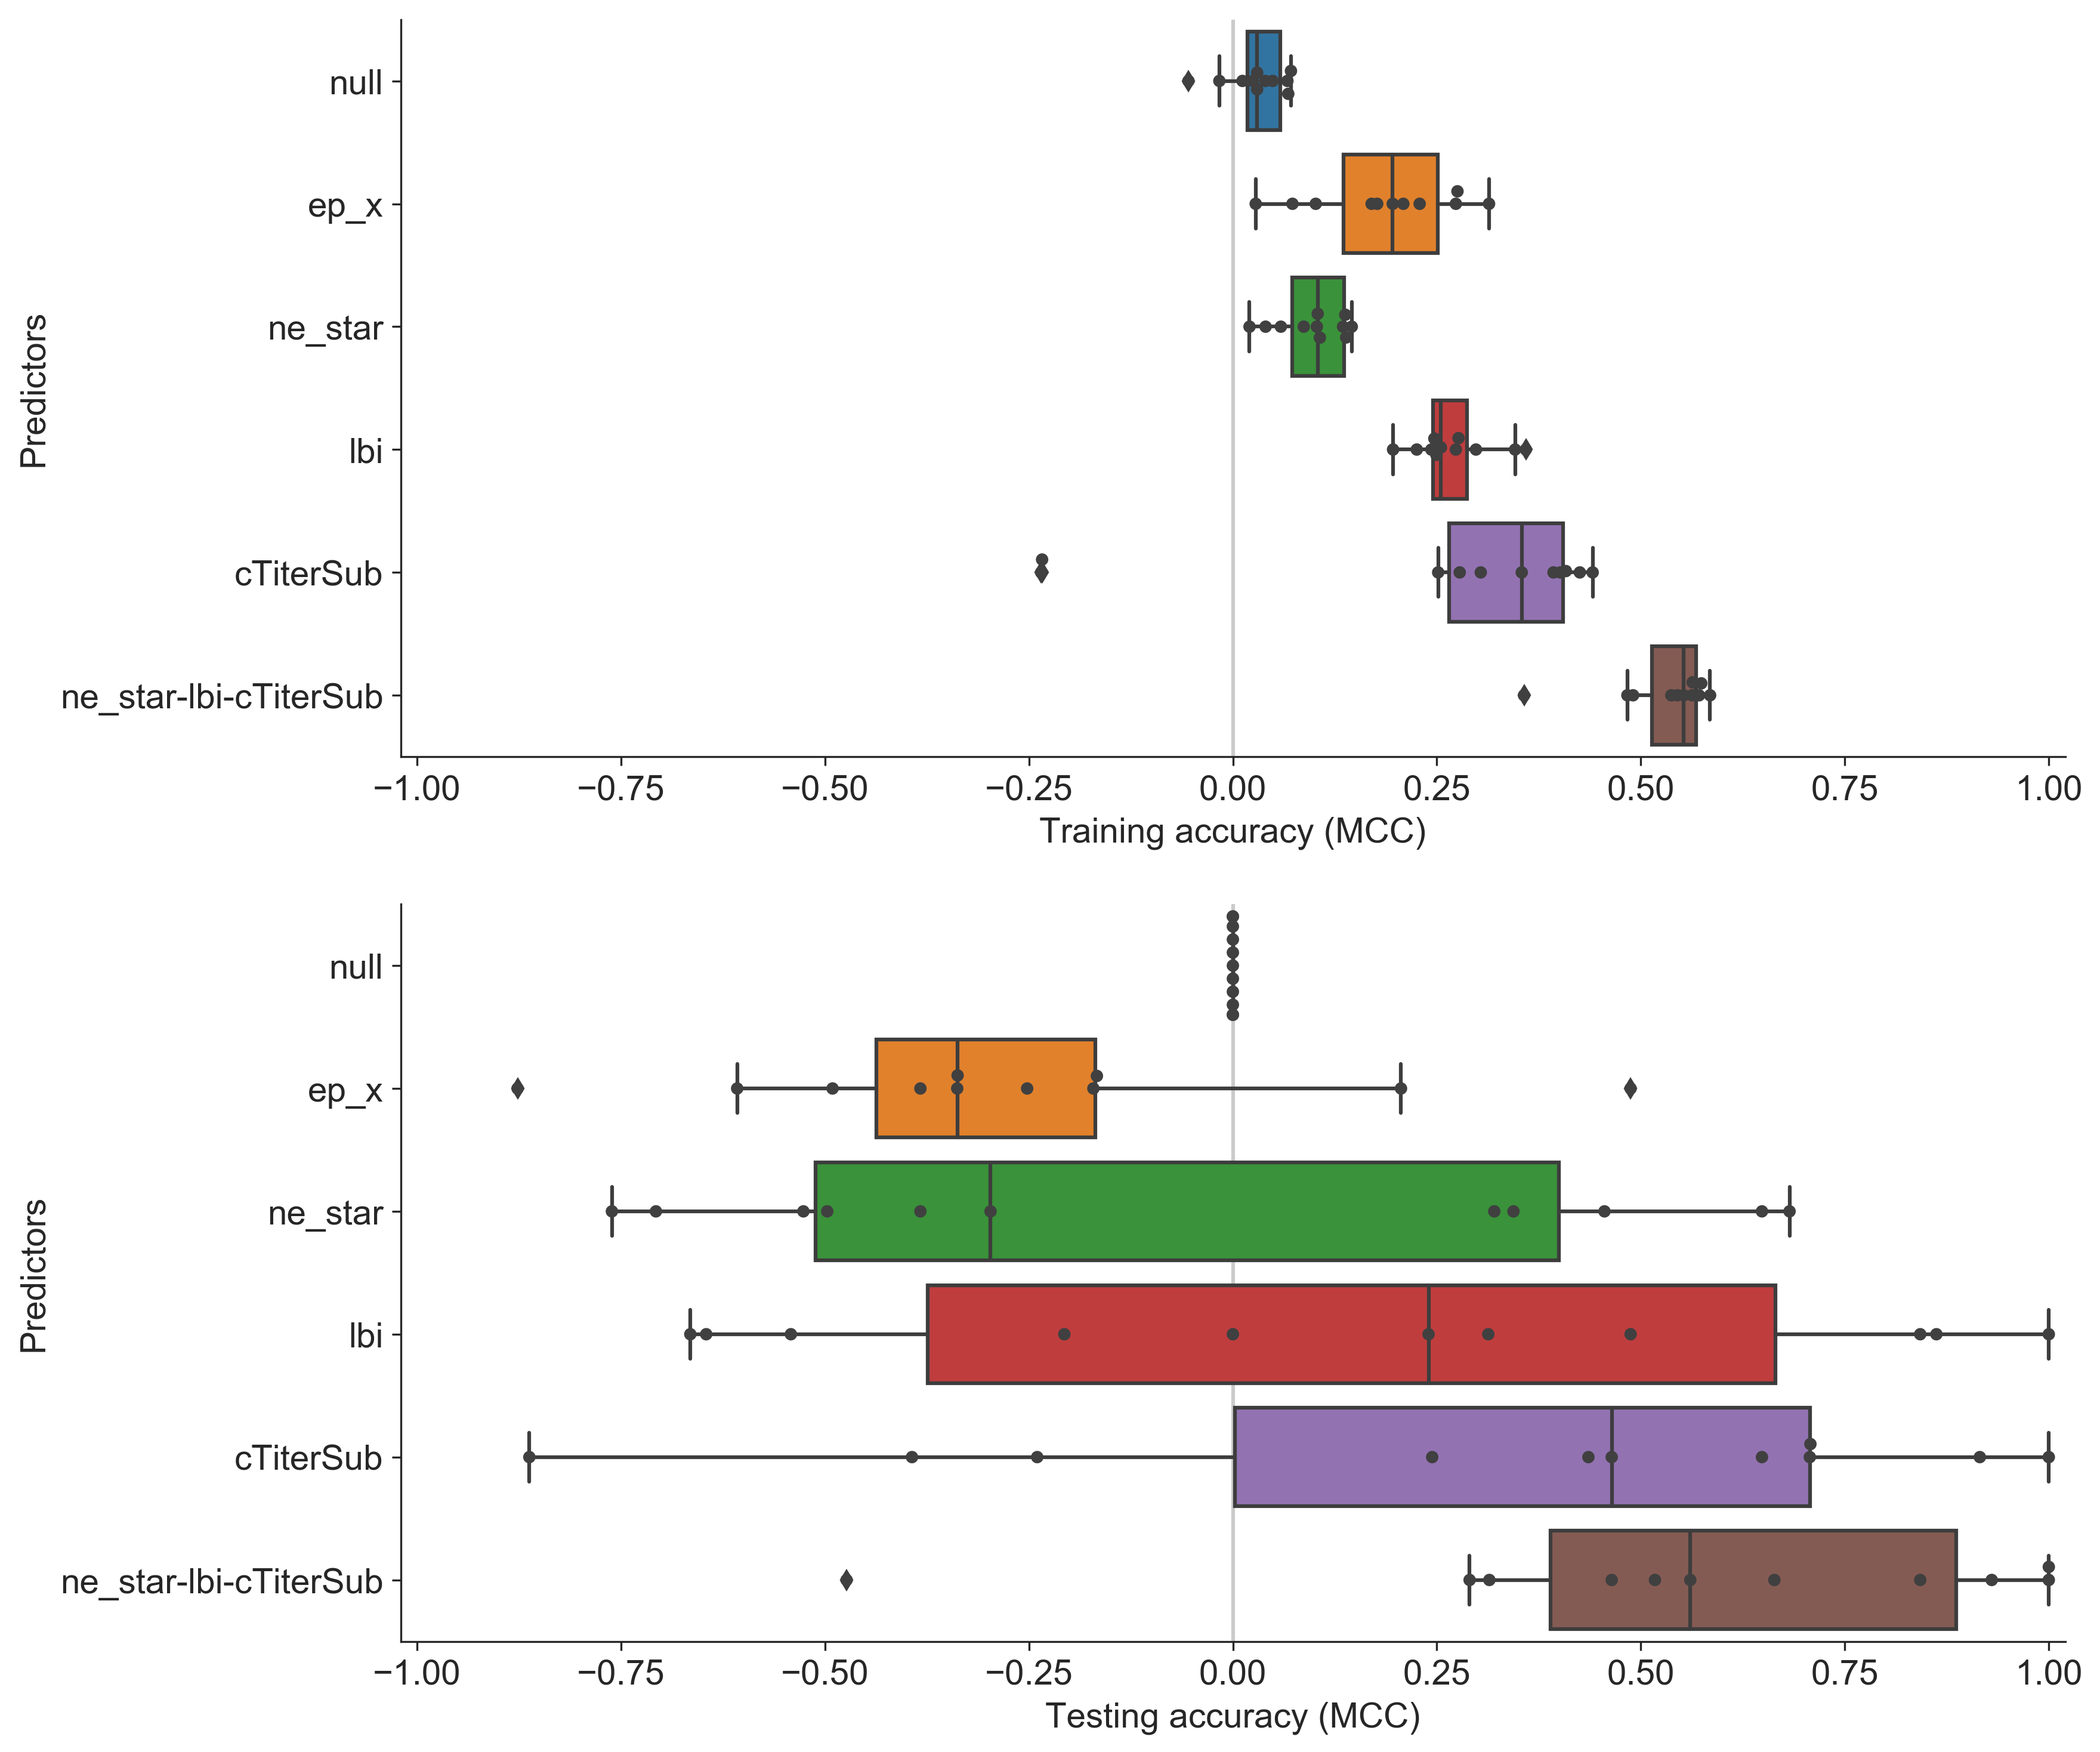

In [35]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training accuracy on the top panel.
sns.boxplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_accuracy",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training accuracy (MCC)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing accuracy on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_accuracy",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing accuracy (MCC)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

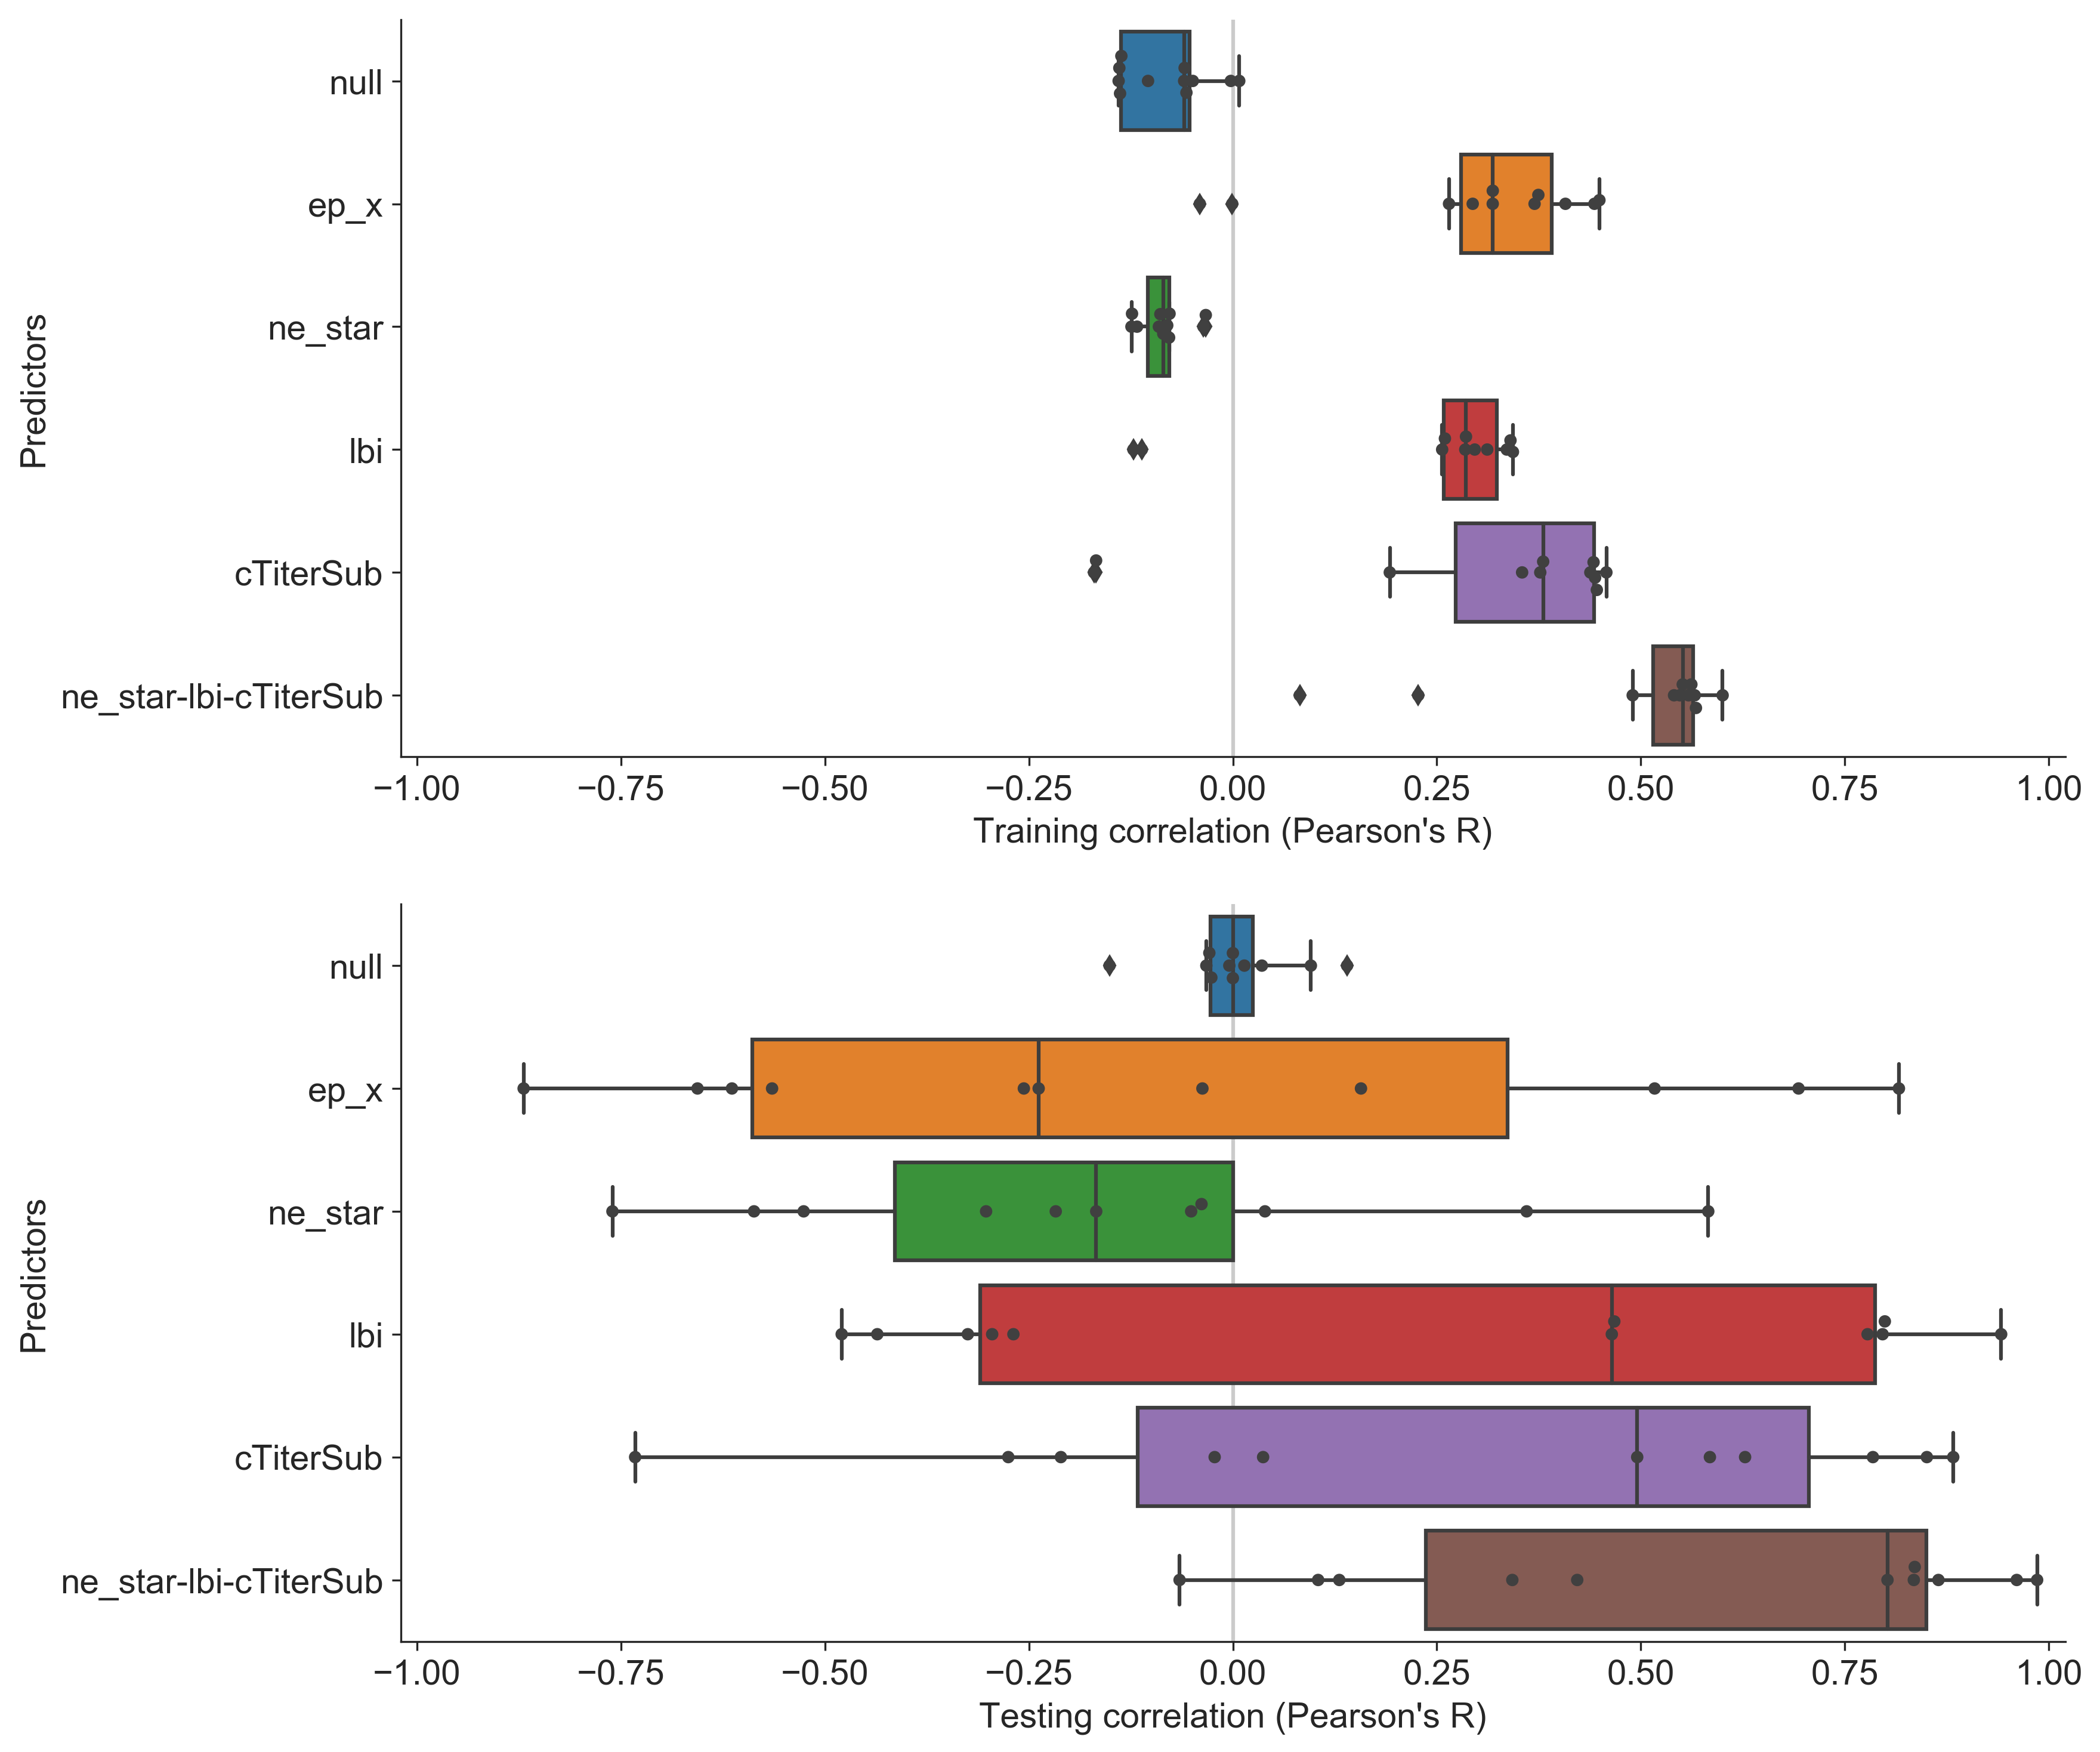

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(12, 12))

# Plot training correlation on the top panel.
sns.boxplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0]
)
sns.swarmplot(
    y="predictors",
    x="training_correlation",
    data=df,
    ax=axes[0],
    color="0.25"
)

axes[0].set_xlabel("Training correlation (Pearson's R)")
axes[0].set_ylabel("Predictors")
axes[0].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[0].set_xlim(-1.02, 1.02)

# Plot testing correlation on the bottom panel.
sns.boxplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1]
)
sns.swarmplot(
    y="predictors",
    x="testing_correlation",
    data=df,
    ax=axes[1],
    color="0.25"
)

axes[1].set_xlabel("Testing correlation (Pearson's R)")
axes[1].set_ylabel("Predictors")
axes[1].axvline(0, color="#999999", alpha=0.5, zorder=-10)
axes[1].set_xlim(-1.02, 1.02)

sns.despine()

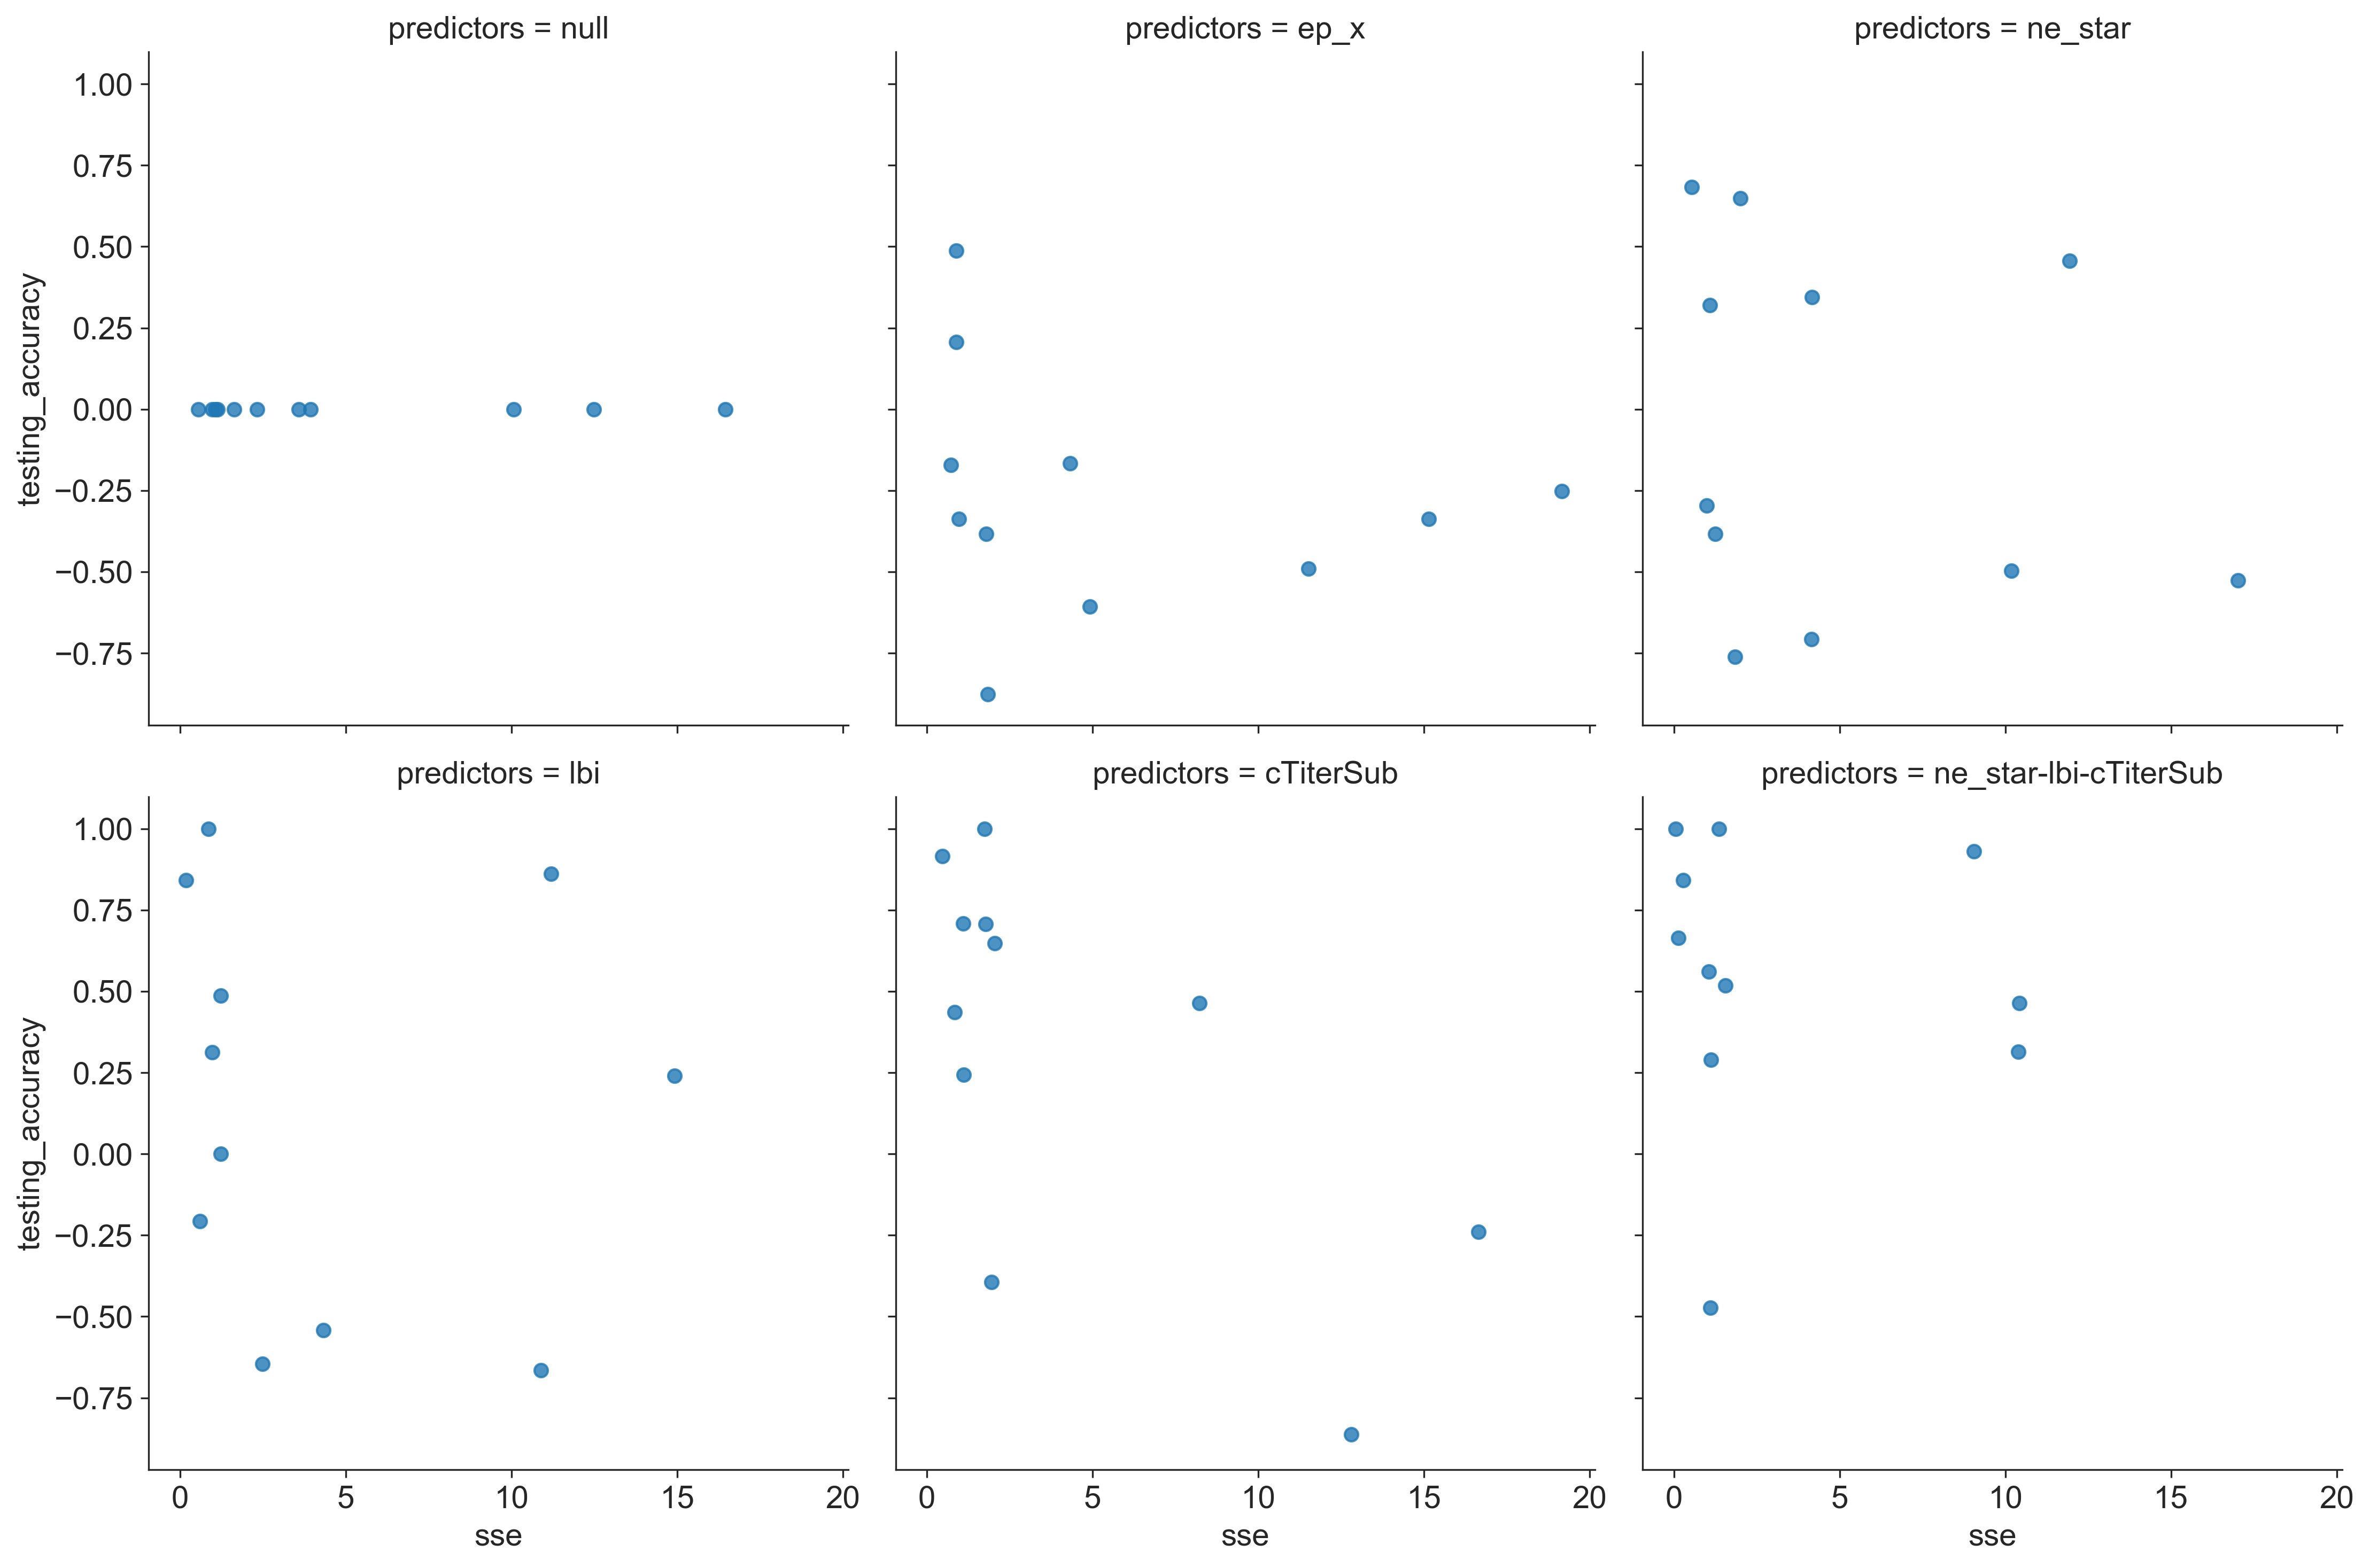

In [37]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="sse",
    y="testing_accuracy",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

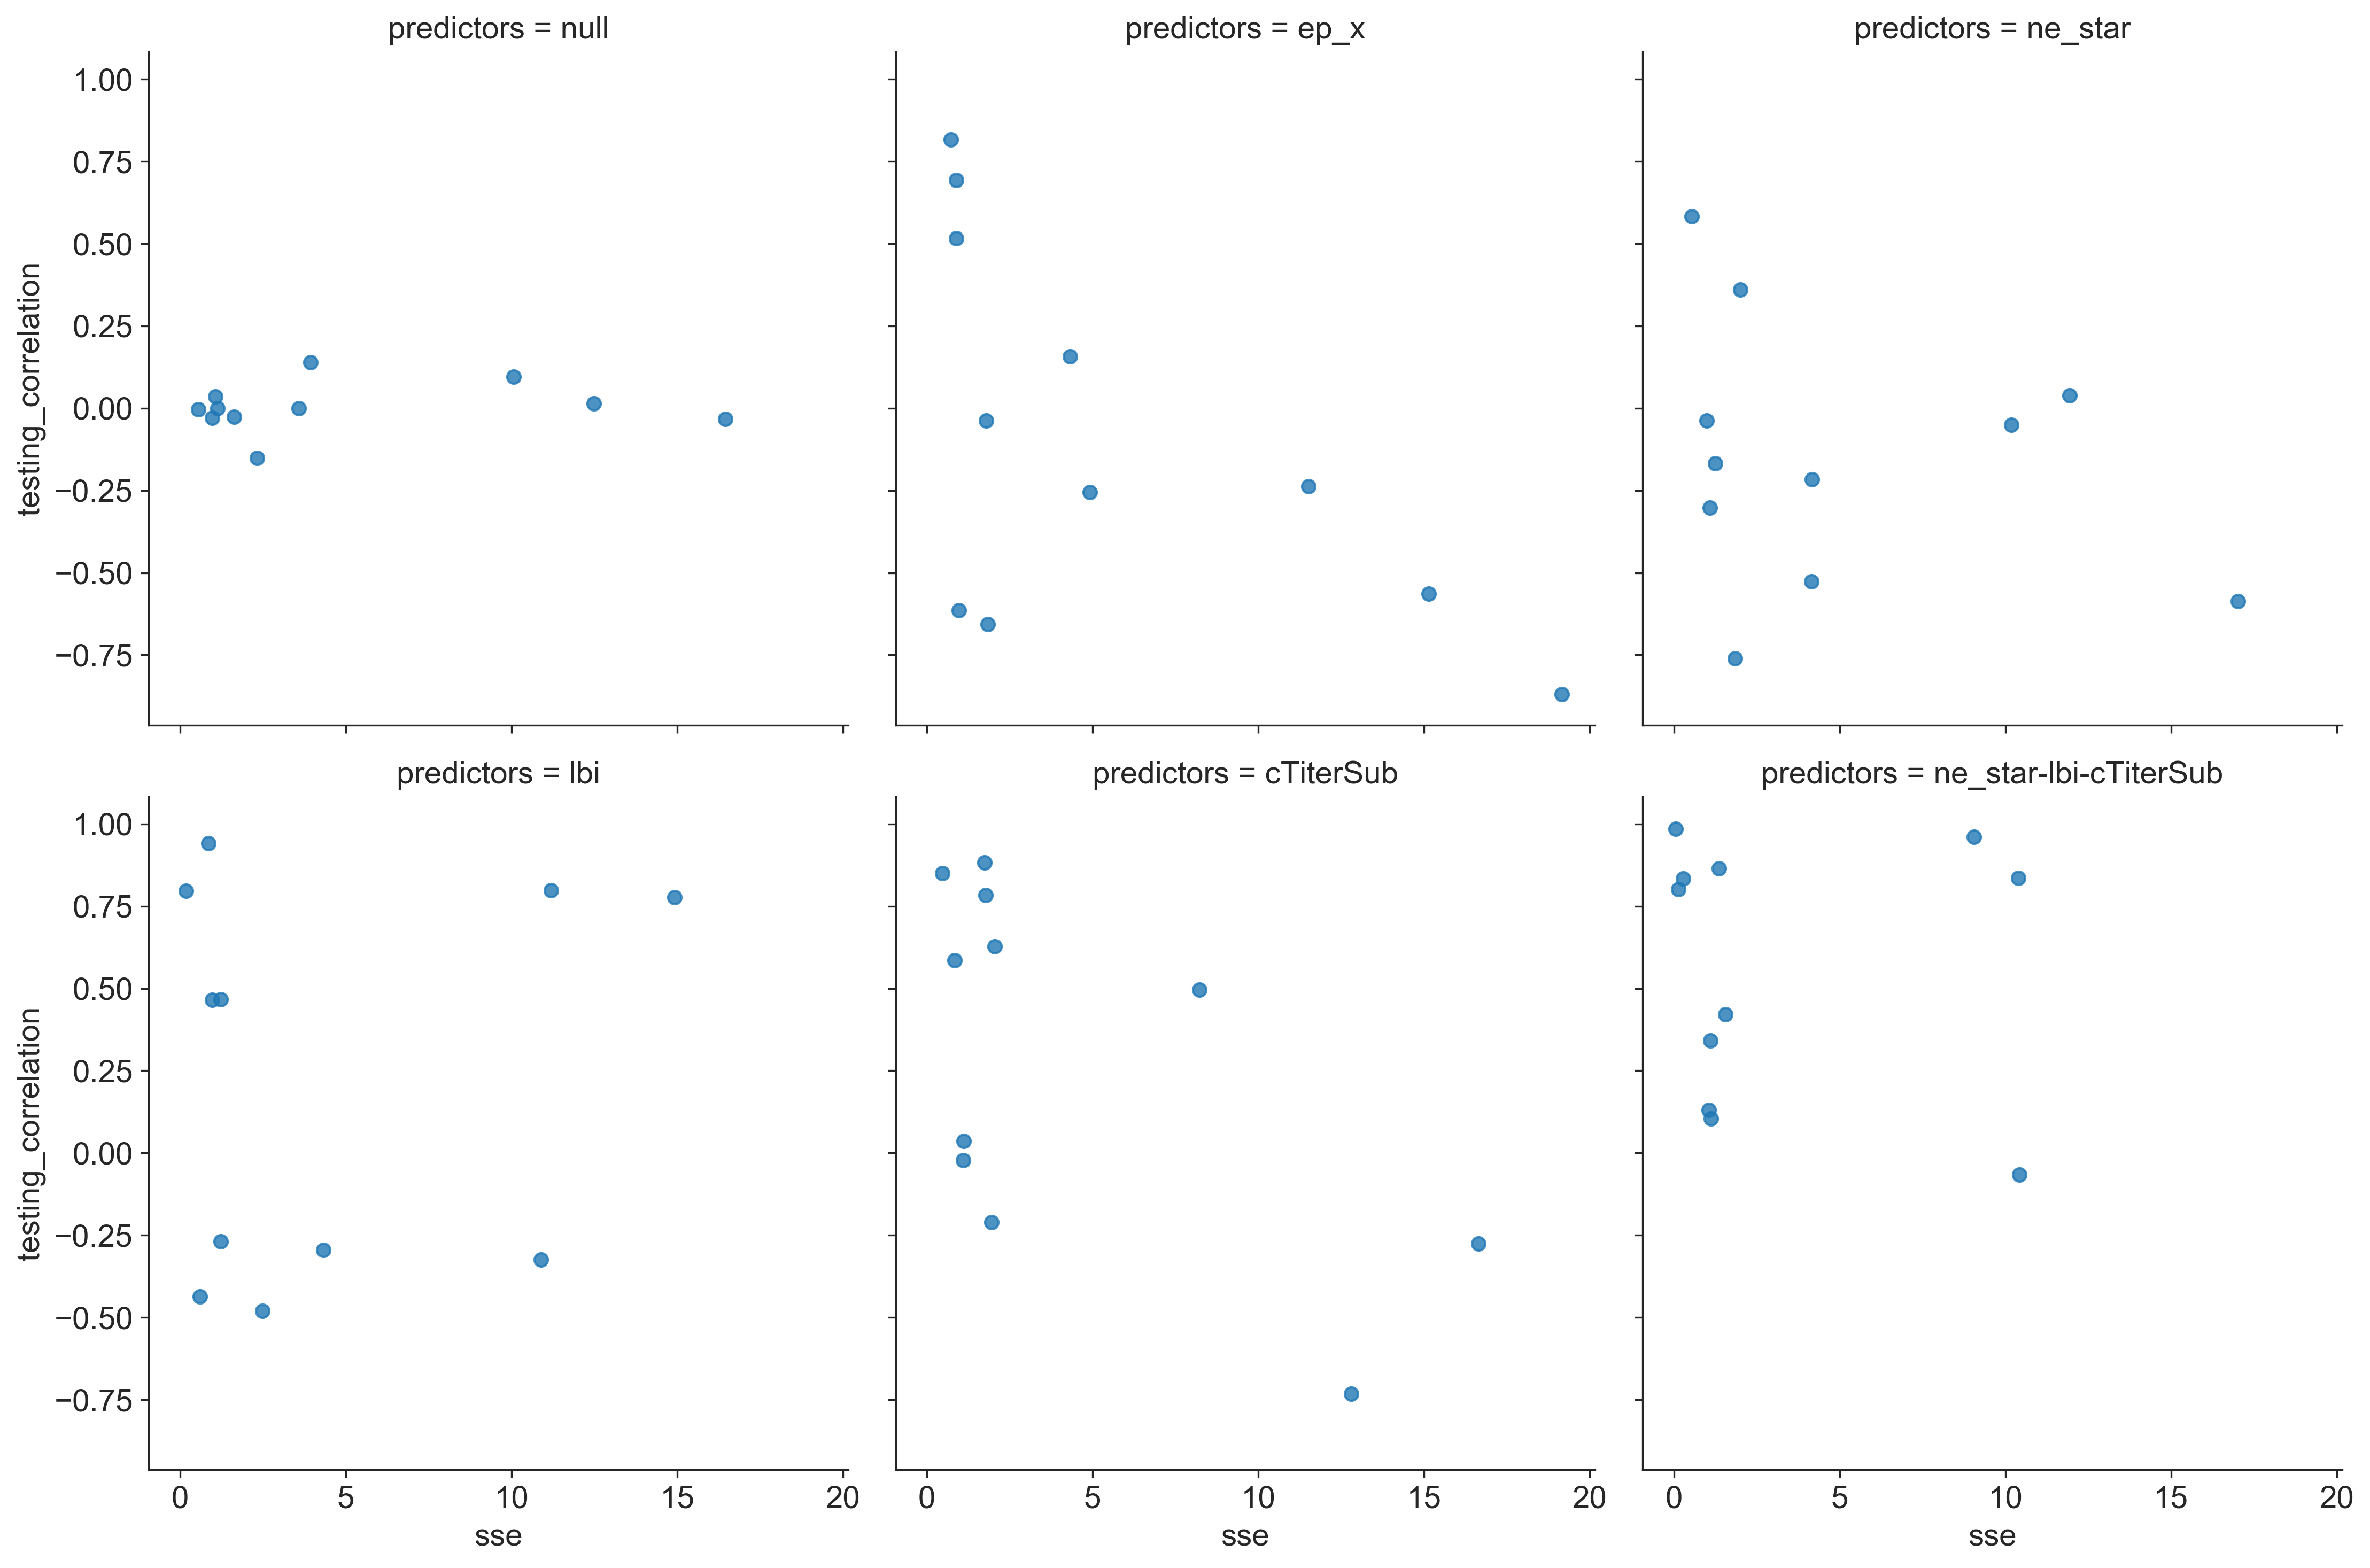

In [38]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="sse",
    y="testing_correlation",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

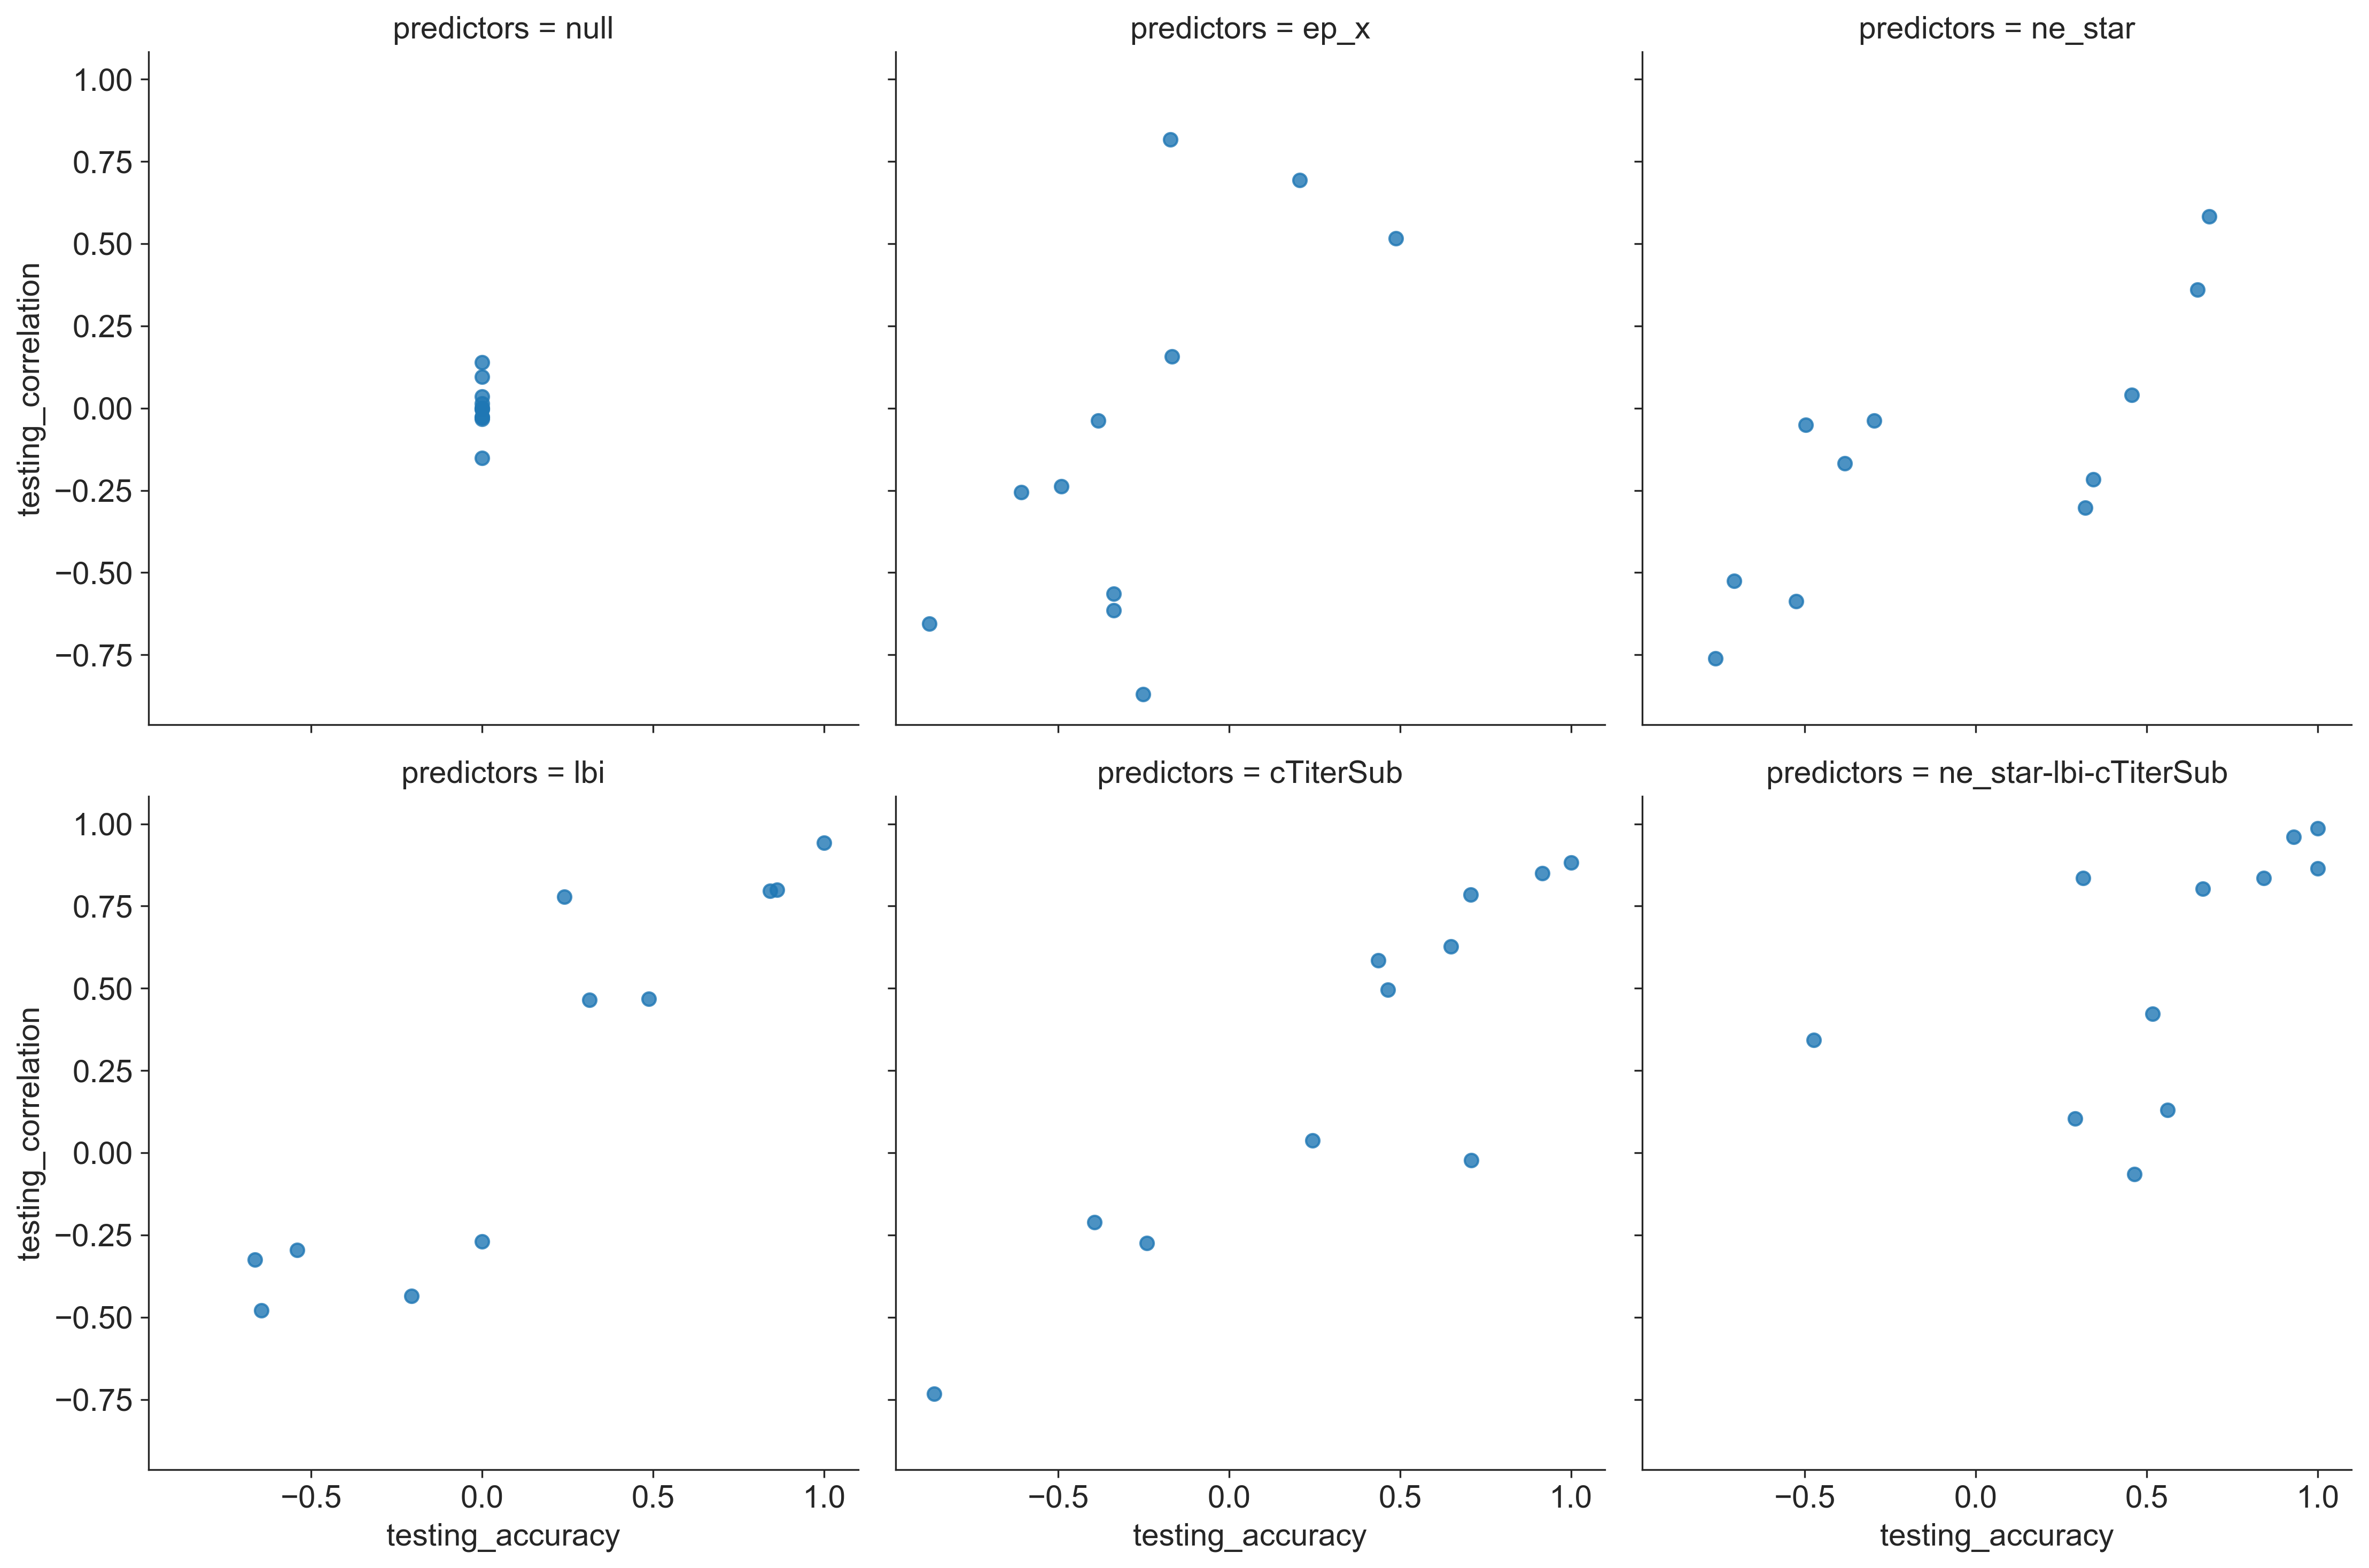

In [39]:
#fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.lmplot(
    x="testing_accuracy",
    y="testing_correlation",
    data=df,
    col="predictors",
    col_wrap=3,
    fit_reg=False
)

In [40]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors    ...     testing_correlation  tn  tp  training_accuracy  \
0       null    ...               -0.032544  48   0           0.066827   
1       null    ...                0.014051  23   0           0.071165   
2       null    ...               -0.151211   0  37          -0.016591   
3       null    ...               -0.004386   0  33          -0.054463   
4       null    ...                0.139972   0  11           0.029775   

   training_correlation  training_windows  viruses  year_range  \
0              0.007788                 9       92   2006-2018   
1             -0.002537                10       92   2006-2018   
2             -0.136689                11       92   2006-2018   
3             -0.139167                12       92   2006-2018   
4             -0.138286                13       92   2006-2018   

   predictor_name       mse  
0            null  0.162928  
1            null  0.211803  
2            null  0.045557  
3            null  0.010750  
4            null  0.115989  

[5 rows x 25 columns]

In [41]:
df["predictors"].unique()

array(['null', 'ep_x', 'ne_star', 'lbi', 'cTiterSub',
       'ne_star-lbi-cTiterSub'], dtype=object)

In [42]:
parameter_columns = [column for column in df.columns if column.startswith("parameter-")]
df.loc[:, ["predictors"] + parameter_columns].groupby("predictors").aggregate(["mean", "std"])

parameter-cTiterSub           parameter-ep_x            \
                                     mean       std           mean       std   
predictors                                                                     
cTiterSub                        0.568717  0.377114            NaN       NaN   
ep_x                                  NaN       NaN       1.159153  0.800172   
lbi                                   NaN       NaN            NaN       NaN   
ne_star                               NaN       NaN            NaN       NaN   
ne_star-lbi-cTiterSub            0.750840  0.290913            NaN       NaN   
null                                  NaN       NaN            NaN       NaN   

                      parameter-lbi           parameter-ne_star            \
                               mean       std              mean       std   
predictors                                                                  
cTiterSub                       NaN       NaN               NaN       NaN   
ep_x                            NaN       NaN               NaN       NaN   
lbi                        0.424158  0.180466               NaN       NaN   
ne_star                         NaN       NaN         -1.286320  0.931882   
ne_star-lbi-cTiterSub      0.678890  0.192768          0.614641  0.040485   
null                            NaN       NaN               NaN       NaN   

                      parameter-null       
                                mean  std  
predictors                                 
cTiterSub                        NaN  NaN  
ep_x                             NaN  NaN  
lbi                              NaN  NaN  
ne_star                          NaN  NaN  
ne_star-lbi-cTiterSub            NaN  NaN  
null                             0.0  0.0

In [48]:
parameters_df = df.loc[:, ["predictor_name"] + parameter_columns].melt(
    "predictor_name",
    parameter_columns,
    var_name="predictor",
    value_name="parameter"
).dropna().copy()

In [51]:
parameters_df["predictor"] = parameters_df["predictor"].str.replace("parameter-", "")

In [52]:
parameters_df

predictor_name  predictor  parameter
44      HI phenotypes  cTiterSub  -0.033296
45      HI phenotypes  cTiterSub  -0.021812
46      HI phenotypes  cTiterSub   0.068481
47      HI phenotypes  cTiterSub   0.584201
48      HI phenotypes  cTiterSub   0.672898
49      HI phenotypes  cTiterSub   0.680286
50      HI phenotypes  cTiterSub   0.792522
51      HI phenotypes  cTiterSub   0.822809
52      HI phenotypes  cTiterSub   0.898994
53      HI phenotypes  cTiterSub   0.900040
54      HI phenotypes  cTiterSub   0.890771
55          composite  cTiterSub   0.372558
56          composite  cTiterSub   0.015133
57          composite  cTiterSub   0.775669
58          composite  cTiterSub   0.848117
59          composite  cTiterSub   0.841594
60          composite  cTiterSub   0.828426
61          composite  cTiterSub   0.952269
62          composite  cTiterSub   0.893734
63          composite  cTiterSub   0.914088
64          composite  cTiterSub   0.913671
65          composite  cTiterSub   0.903977
77       epitope muts       ep_x  -0.378752
78       epitope muts       ep_x  -0.237035
79       epitope muts       ep_x   0.966750
80       epitope muts       ep_x   1.850313
81       epitope muts       ep_x   1.918271
82       epitope muts       ep_x   1.872375
83       epitope muts       ep_x   1.772548
84       epitope muts       ep_x   1.442443
..                ...        ...        ...
223  non-epitope muts    ne_star  -0.955643
224  non-epitope muts    ne_star  -1.392274
225  non-epitope muts    ne_star  -1.384136
226  non-epitope muts    ne_star  -1.005357
227  non-epitope muts    ne_star  -1.015326
228  non-epitope muts    ne_star  -0.588929
229  non-epitope muts    ne_star  -0.537407
230  non-epitope muts    ne_star  -0.536352
253         composite    ne_star   0.553177
254         composite    ne_star   0.522880
255         composite    ne_star   0.635755
256         composite    ne_star   0.651657
257         composite    ne_star   0.650247
258         composite    ne_star   0.628487
259         composite    ne_star   0.643234
260         composite    ne_star   0.617479
261         composite    ne_star   0.620768
262         composite    ne_star   0.621959
263         composite    ne_star   0.615409
264              null       null   0.000000
265              null       null   0.000000
266              null       null   0.000000
267              null       null   0.000000
268              null       null   0.000000
269              null       null   0.000000
270              null       null   0.000000
271              null       null   0.000000
272              null       null   0.000000
273              null       null   0.000000
274              null       null   0.000000

[88 rows x 3 columns]

/Users/jlhudd/projects/hi-vs-fra-titers/.snakemake/conda/5ca6ad20/lib/python2.7/site-packages/seaborn/categorical.py:1418: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


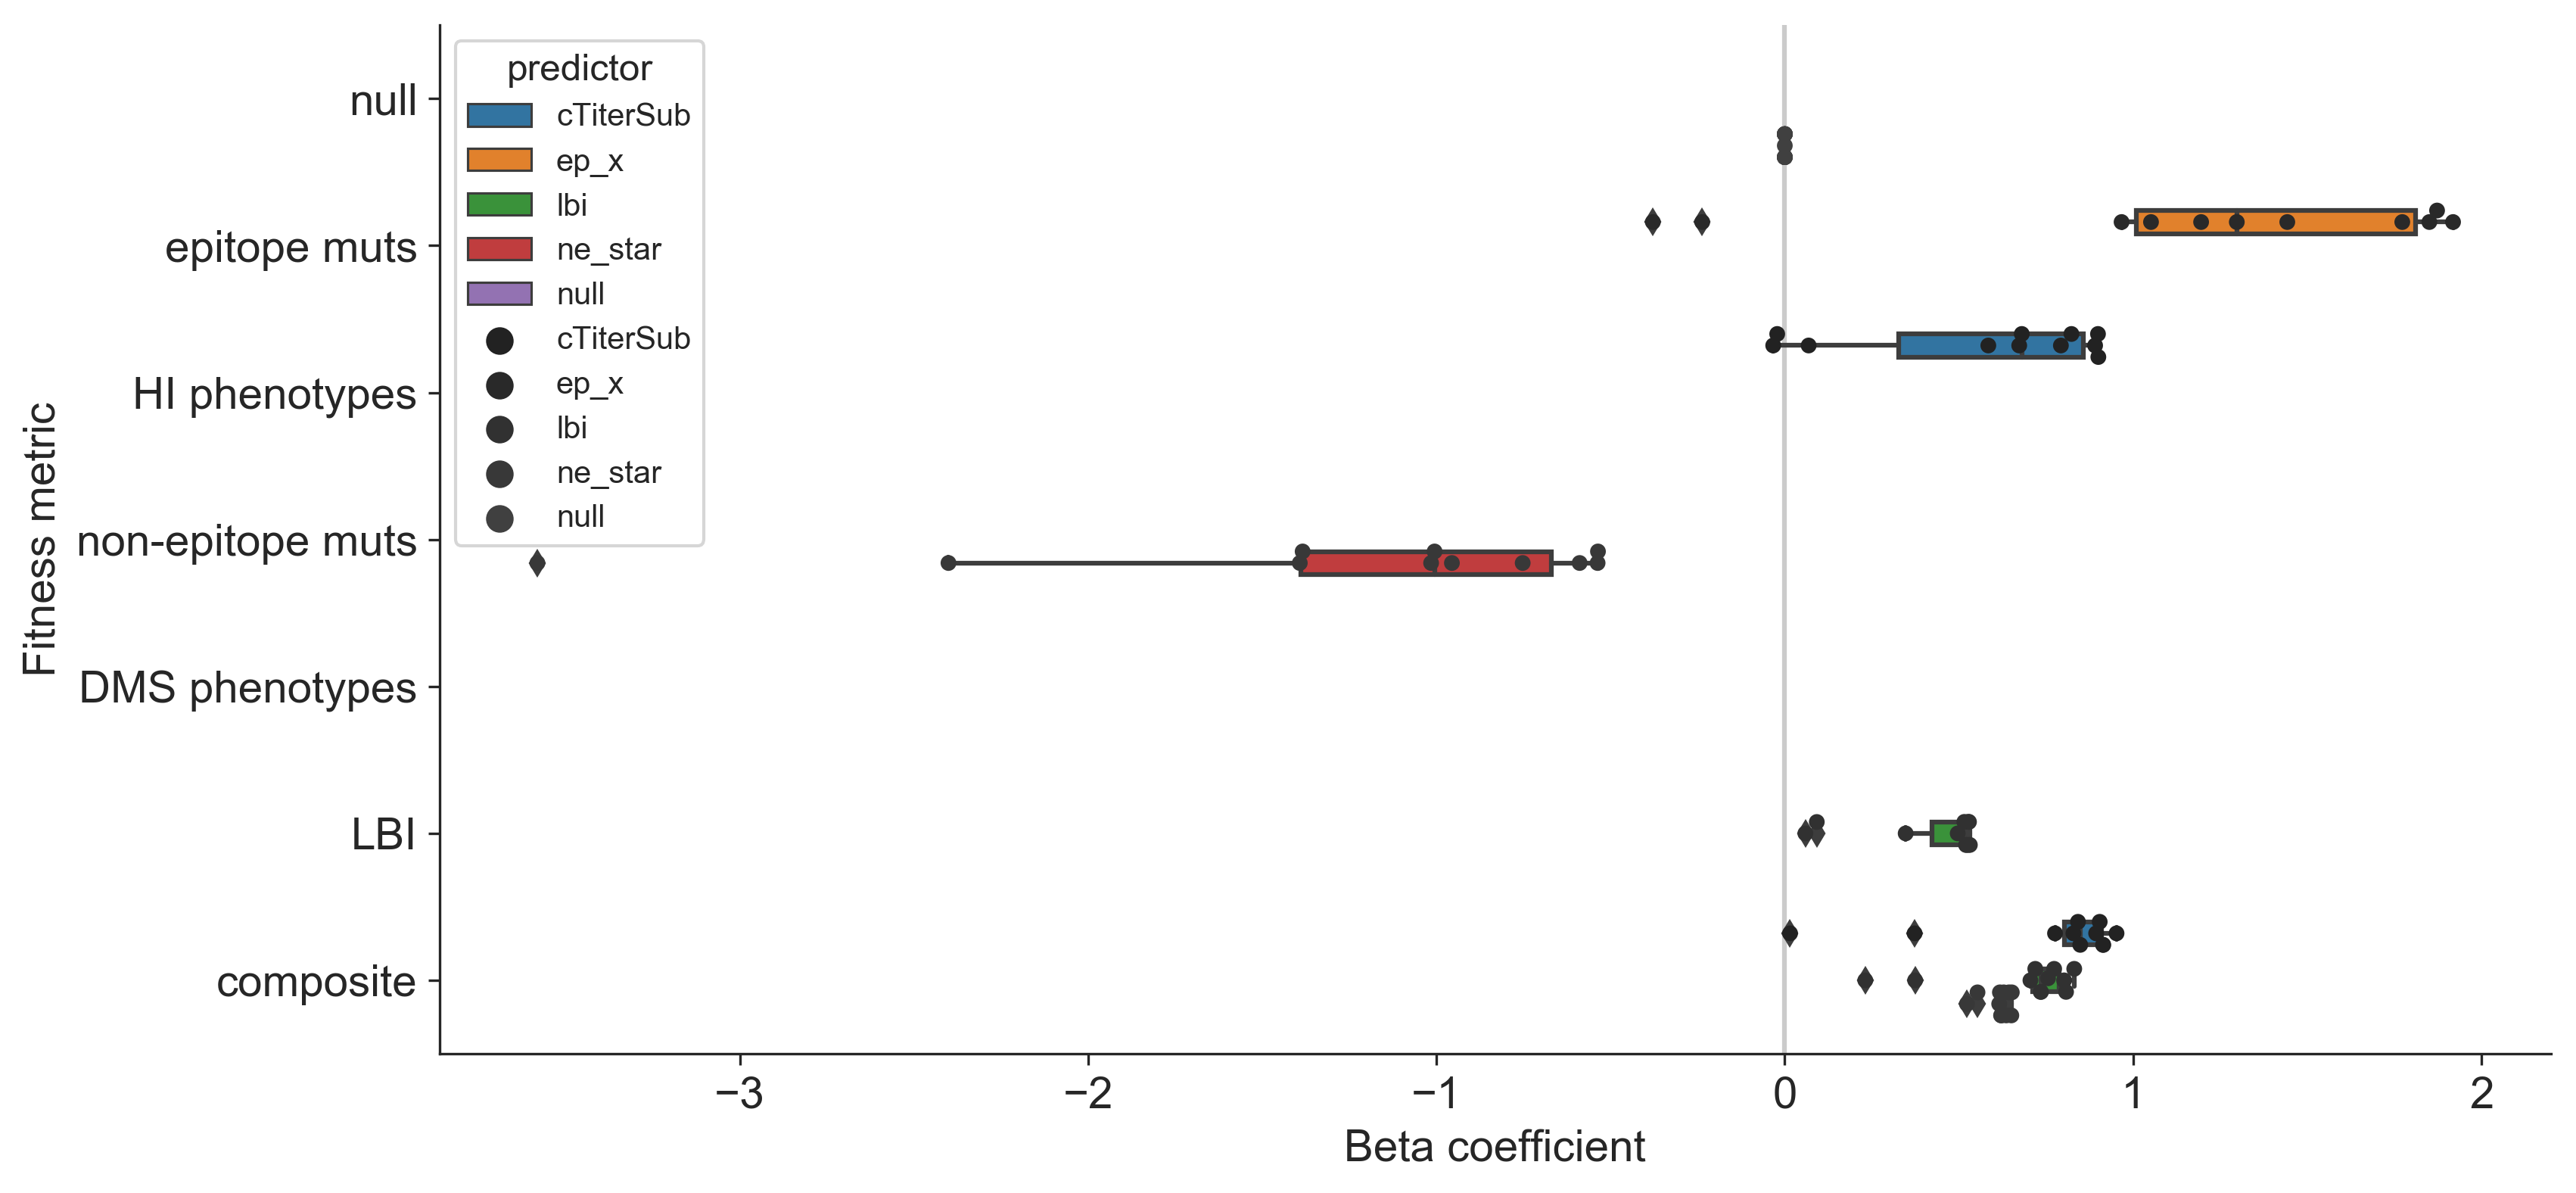

In [57]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.boxplot(
    y="predictor_name",
    x="parameter",
    hue="predictor",
    data=parameters_df,
    ax=ax,
    dodge=True,
    order=predictor_names_order
)

sns.swarmplot(
    y="predictor_name",
    x="parameter",
    hue="predictor",
    data=parameters_df,
    ax=ax,
    color="0.25",
    order=predictor_names_order,
    dodge=True
)

ax.axvline(0, color="#999999", alpha=0.5, zorder=-10)
ax.set_xlabel("Beta coefficient")
ax.set_ylabel("Fitness metric")

sns.despine()

In [31]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum()

fn     8
fp    32
tn    82
tp    11
dtype: int64

In [32]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum().sum()

133

In [33]:
df[df["predictors"] == "cTiterSub"].loc[:, ["fn", "fp", "tn", "tp"]].sum(axis=1)

66     3
67    17
68    12
69     3
70    24
71    17
72    17
73     9
74     7
75     9
76    15
dtype: int64

In [66]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors    ...     testing_correlation  tn  tp  training_accuracy  \
0       null    ...               -0.032544  48   0           0.066827   
1       null    ...                0.014051  23   0           0.071165   
2       null    ...               -0.151211   0  37          -0.016591   
3       null    ...               -0.004386   0  33          -0.054463   
4       null    ...                0.139972   0  11           0.029775   

   training_correlation  training_windows  viruses  year_range  \
0              0.007788                 9       92   2006-2018   
1             -0.002537                10       92   2006-2018   
2             -0.136689                11       92   2006-2018   
3             -0.139167                12       92   2006-2018   
4             -0.138286                13       92   2006-2018   

   predictor_name       mse  
0            null  0.162928  
1            null  0.211803  
2            null  0.045557  
3            null  0.010750  
4            null  0.115989  

[5 rows x 25 columns]

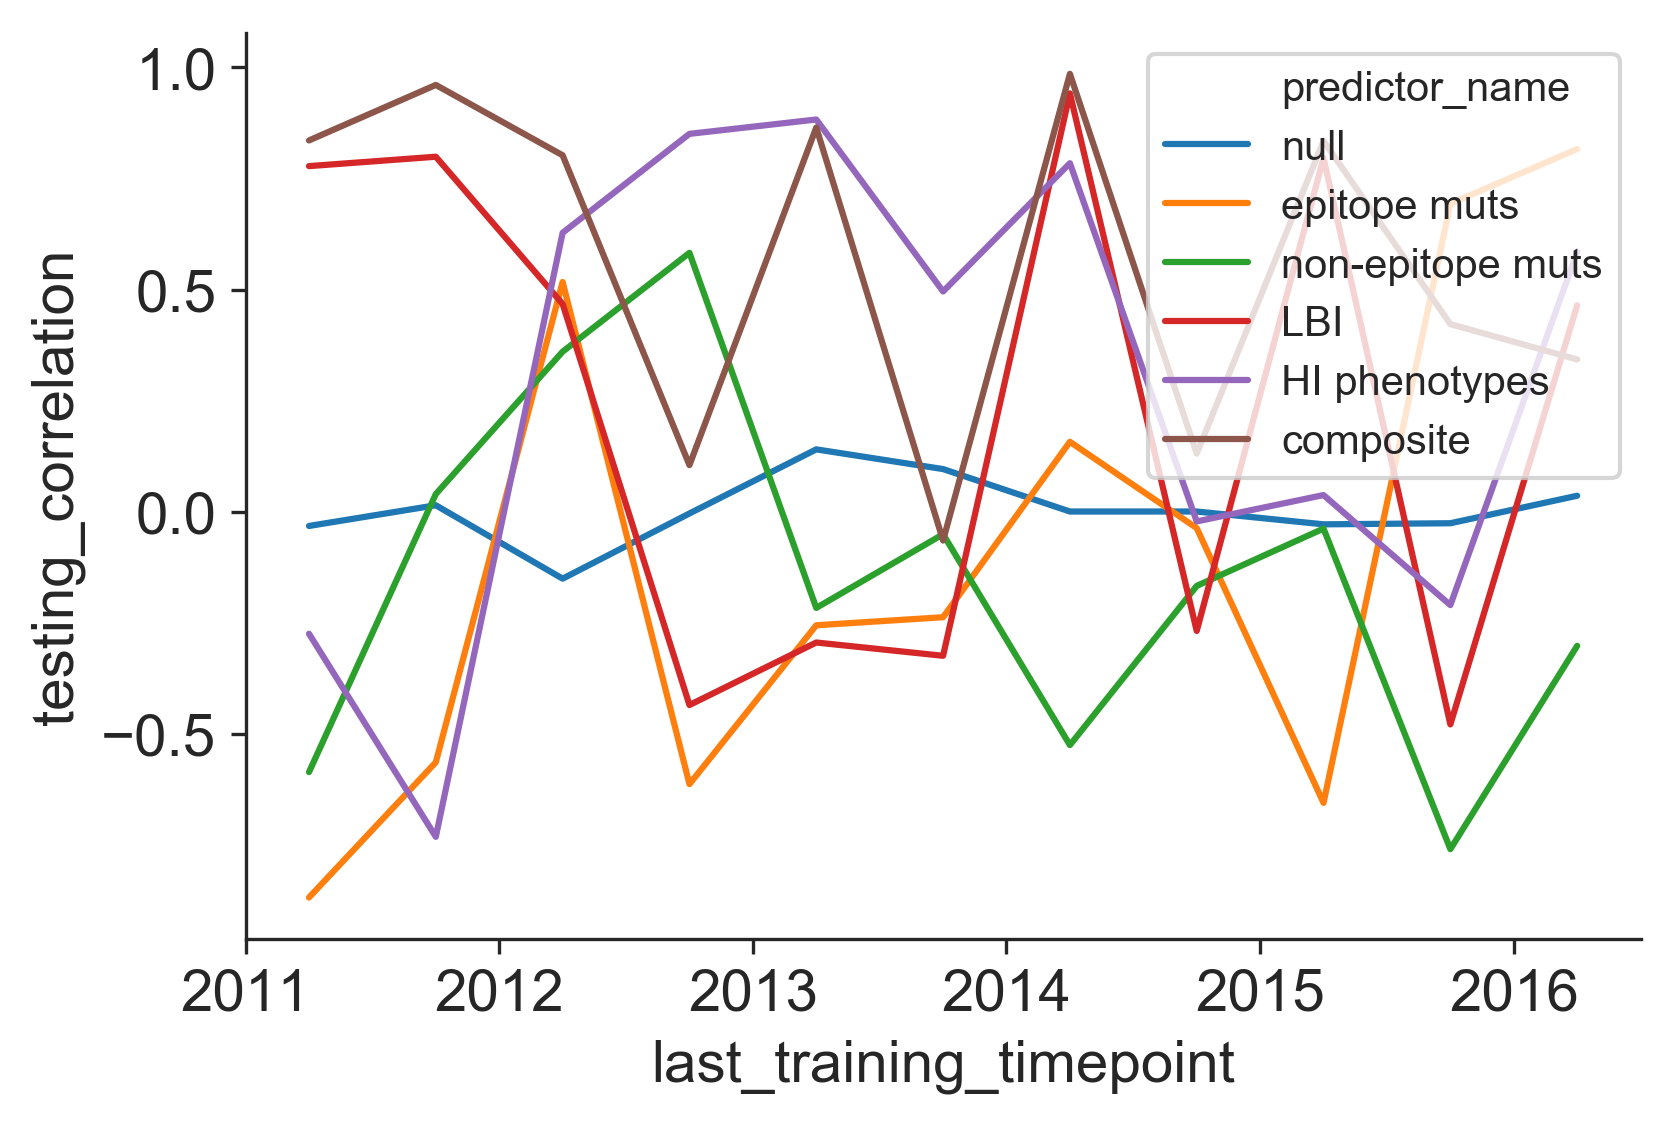

In [97]:
sns.lineplot("last_training_timepoint", "testing_correlation", "predictor_name", data=df)

In [ ]:
sns.tsplot("last_training_timepoint", "testing_correlation", "predictor_name", data=df)

In [82]:
df.head()

fn  fp  last_training_timepoint  n_samples  parameter-cTiterSub  \
0  53   0                  2011.25        101                  NaN   
1  36   0                  2011.75         59                  NaN   
2   0  14                  2012.25         51                  NaN   
3   0  18                  2012.75         51                  NaN   
4   0  23                  2013.25         34                  NaN   

   parameter-ep_x  parameter-lbi  parameter-ne_star  parameter-null  \
0             NaN            NaN                NaN             0.0   
1             NaN            NaN                NaN             0.0   
2             NaN            NaN                NaN             0.0   
3             NaN            NaN                NaN             0.0   
4             NaN            NaN                NaN             0.0   

  predictors    ...     testing_correlation  tn  tp  training_accuracy  \
0       null    ...               -0.032544  48   0           0.066827   
1       null    ...                0.014051  23   0           0.071165   
2       null    ...               -0.151211   0  37          -0.016591   
3       null    ...               -0.004386   0  33          -0.054463   
4       null    ...                0.139972   0  11           0.029775   

   training_correlation  training_windows  viruses  year_range  \
0              0.007788                 9       92   2006-2018   
1             -0.002537                10       92   2006-2018   
2             -0.136689                11       92   2006-2018   
3             -0.139167                12       92   2006-2018   
4             -0.138286                13       92   2006-2018   

   predictor_name       mse  
0            null  0.162928  
1            null  0.211803  
2            null  0.045557  
3            null  0.010750  
4            null  0.115989  

[5 rows x 25 columns]

In [80]:
df["last_training_timepoint"].describe()

count      66.000000
mean     2013.750000
std         1.593255
min      2011.250000
25%      2012.250000
50%      2013.750000
75%      2015.250000
max      2016.250000
Name: last_training_timepoint, dtype: float64

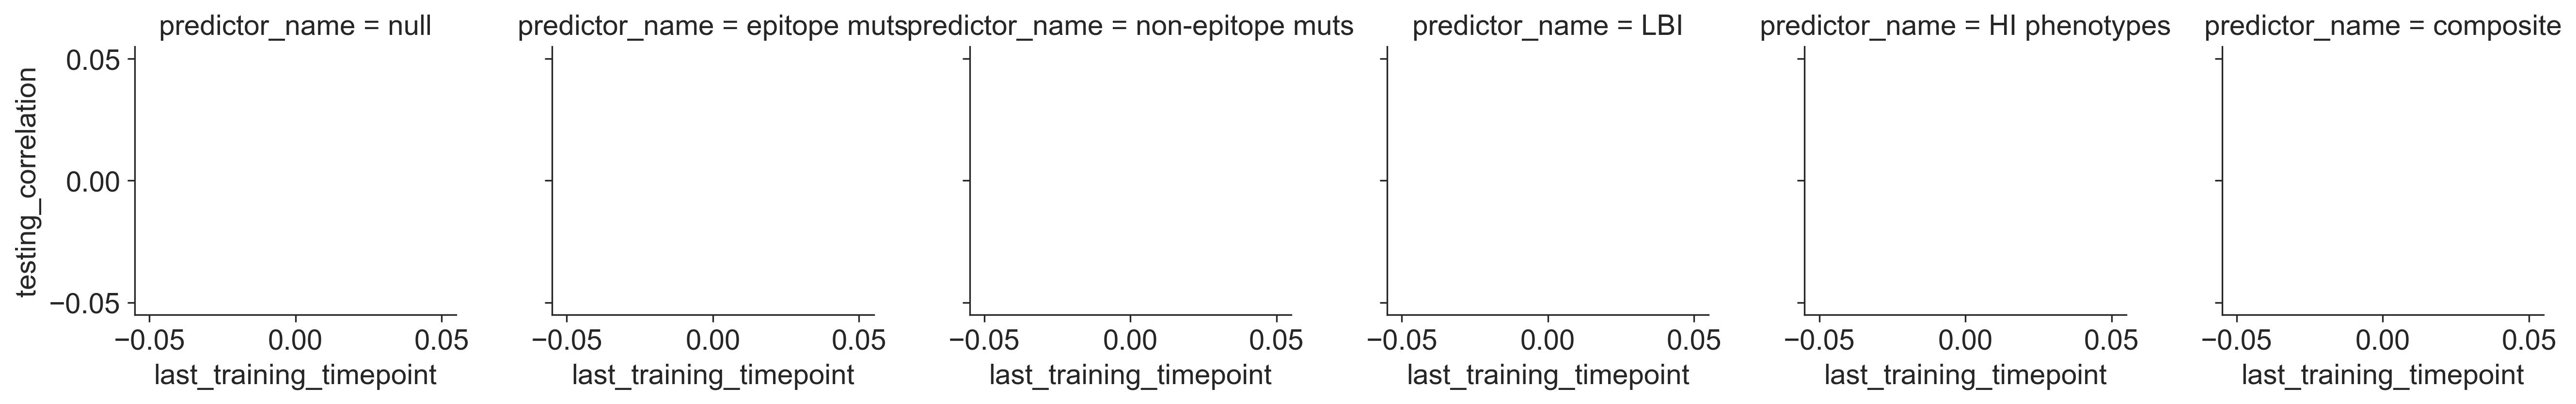

In [93]:
#def facet_time_plot(data, value, value_label, timepoint_column="timepoint", predictors_column="predictors"):
g = sns.FacetGrid(df, col="predictor_name")
g.map_dataframe(sns.lineplot, "last_training_timepoint", "testing_correlation", markers=True, dashes=False)
#g.set_axis_labels("Date", "Pearson's $r$")

In [ ]:
sns.lineplot()

In [ ]:
g = sns.FacetGrid(data, col="predictor_name", col_wrap=3, height=4)
g.map(sns.lineplot, x=timepoint_column, y=value, estimator="mean", ci="sd", markers=True, dashes=False,
               style=predictors_column)
g.set_axis_labels("Date", value_label)


In [ ]:
sns.lineplot()

In [ ]:
for ax in g.axes.flatten():
    ax.axhline(y=0, color="#cccccc")

    start, end = [int(value) for value in ax.get_xlim()]
    end = end + 1
    stepsize = 2.0
    ax.xaxis.set_ticks(np.arange(start, end, stepsize))

    labels = ax.get_xticklabels()
    output = plt.setp(labels, rotation=30)

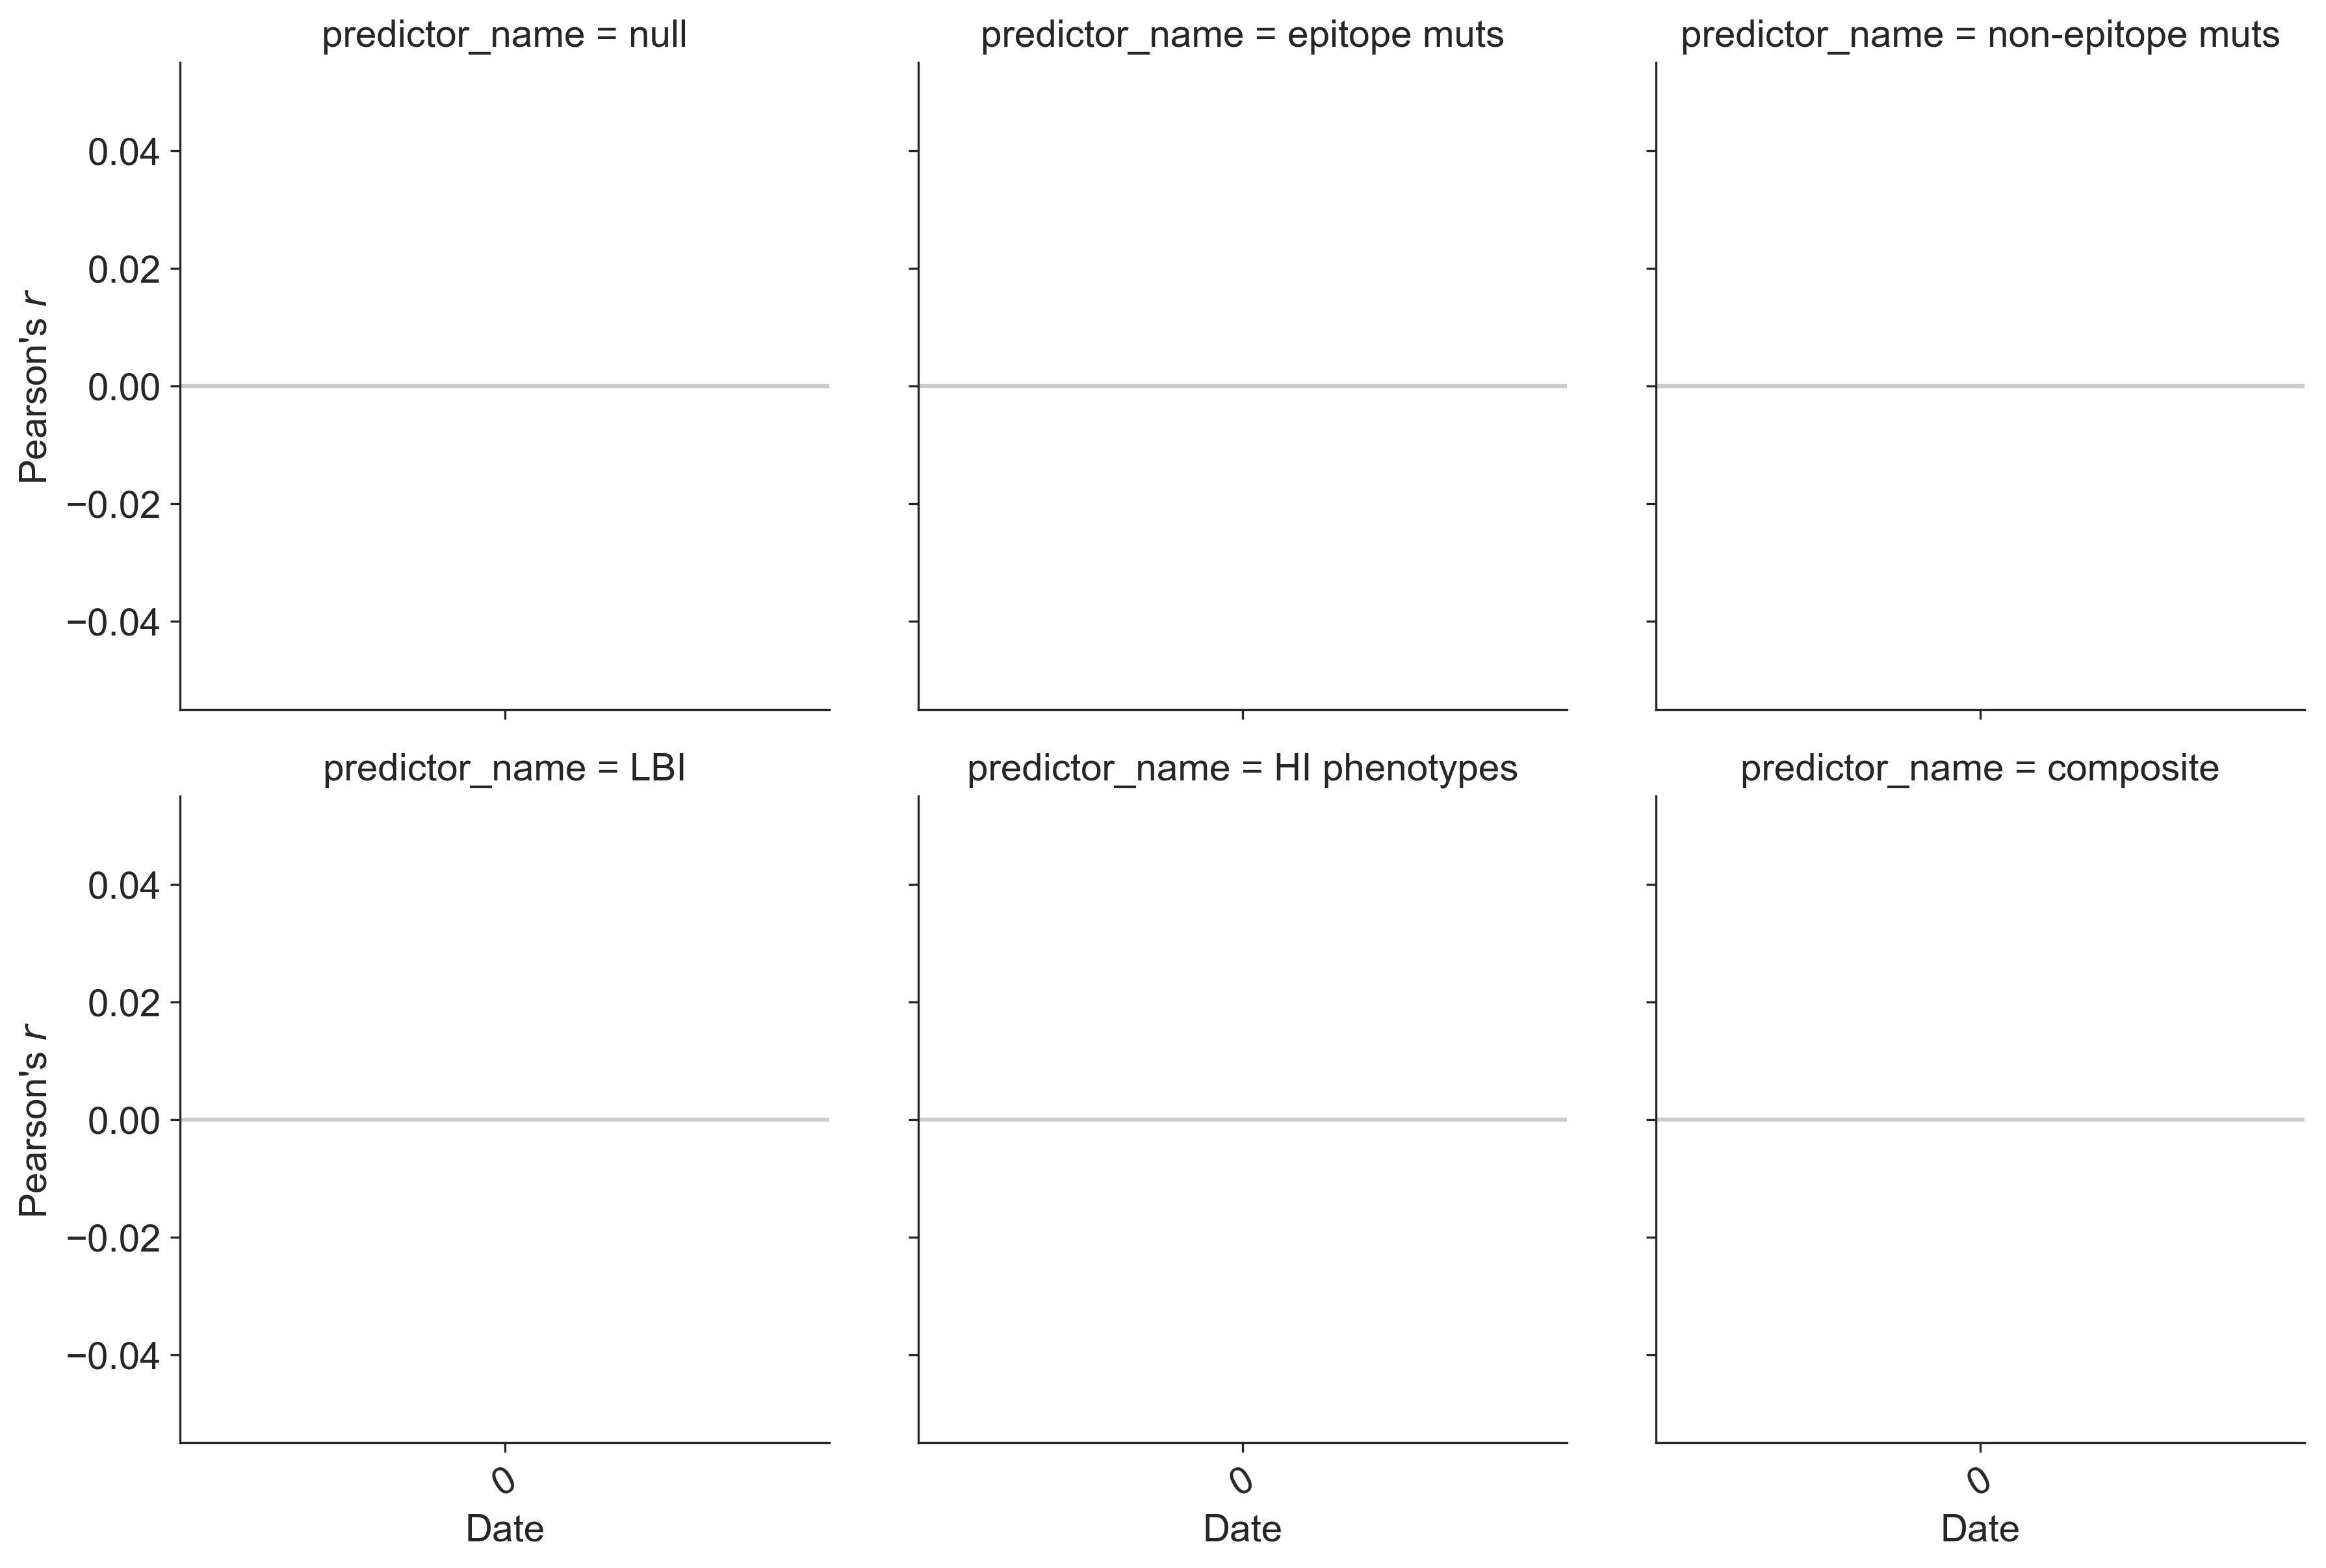

In [64]:
g = facet_time_plot(df, "testing_correlation", "Pearson's $r$", timepoint_column="last_training_timepoint",
                   predictors_column="predictor_name")

## Load raw model data

These data include observed and predicted clade frequencies for all clades across all timepoints in the cross-validation test data.

In [187]:
model_df = pd.read_table("models.tab", keep_default_na=False, na_values="N/A")

In [188]:
model_df.head()

clade  clade_size  initial_freq  observed_freq  predicted_freq  \
0  NODE_0000810         819      0.218169       0.054913        0.218174   
1  NODE_0011971          17      0.011282       0.001450        0.011282   
2  NODE_0003569        6609      0.694538       0.917818        0.694555   
3  NODE_0000811          18      0.021869       0.000144        0.021870   
4  NODE_0000809         801      0.154742       0.007328        0.154746   

   projected_timepoint  timepoint year_range  viruses predictors  sample  
0              2013.25    2012.25  2006-2018       92       null       0  
1              2013.25    2012.25  2006-2018       92       null       0  
2              2013.25    2012.25  2006-2018       92       null       0  
3              2013.75    2012.75  2006-2018       92       null       0  
4              2013.75    2012.75  2006-2018       92       null       0

In [189]:
model_df["observed_growth_rate"] = model_df["observed_freq"] / model_df["initial_freq"]
model_df["predicted_growth_rate"] = model_df["predicted_freq"] / model_df["initial_freq"]

In [190]:
test_df = model_df[model_df["predictors"] == "lbi"].copy()

In [191]:
correlation = pearsonr(test_df["observed_growth_rate"], test_df["predicted_growth_rate"])[0]
mcc, confusion_matrix = get_matthews_correlation_coefficient_for_data_frame(test_df, return_confusion_matrix=True)
accuracy = (confusion_matrix["tp"] + confusion_matrix["tn"]) / float(sum(confusion_matrix.values()))

(0, 5)

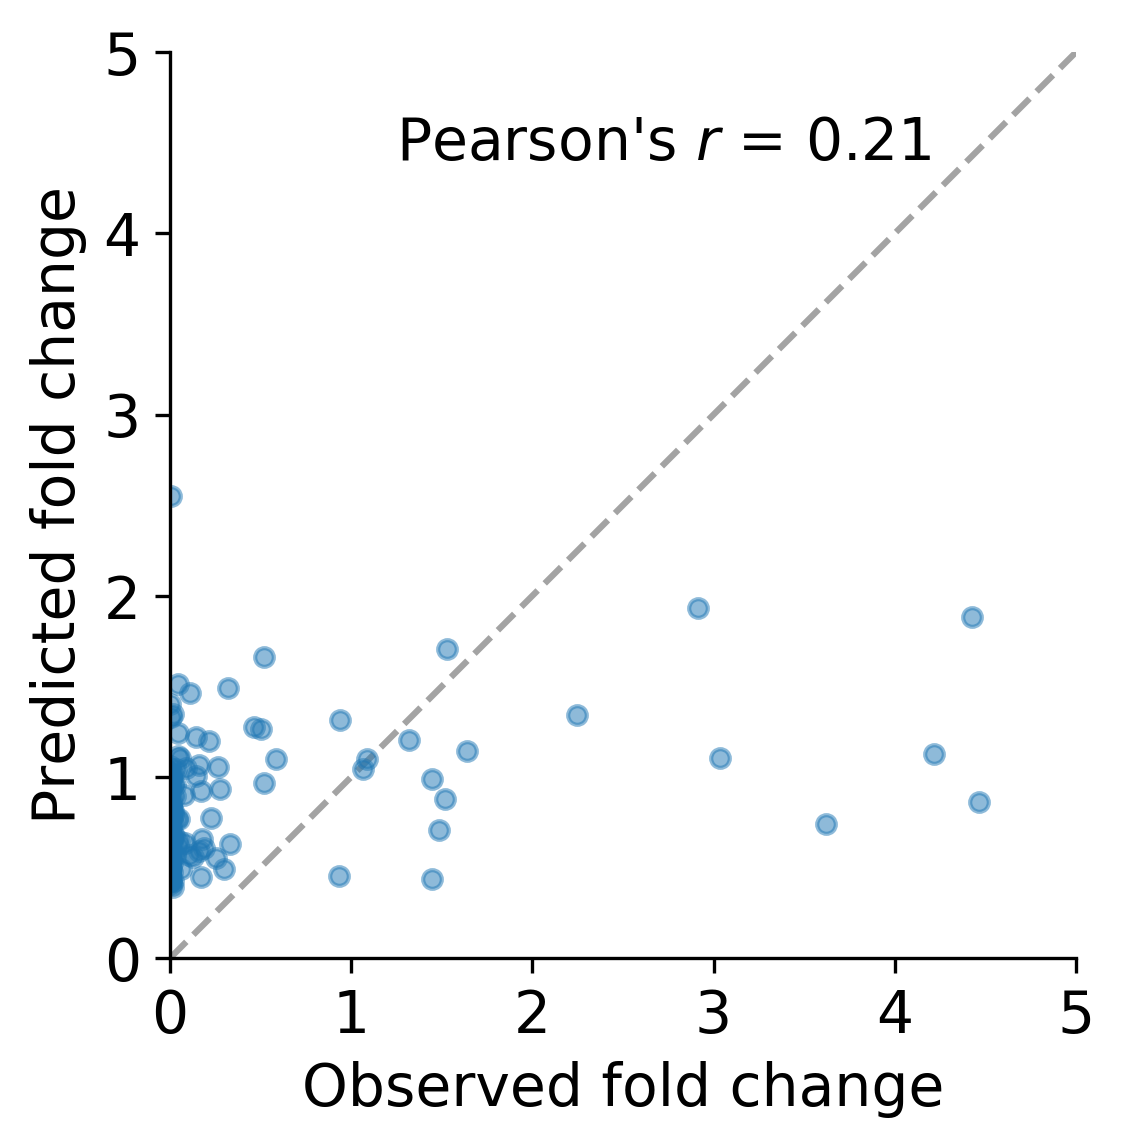

In [192]:
min_rate = 0
max_rate = 5
x = y = np.linspace(min_rate, max_rate, 100)
ax = test_df.plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax.plot(x, y, "--", color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Pearson's $r$ = %.2f" % correlation,
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [193]:
accurate_clades = (
    ((test_df["observed_growth_rate"] > 1) & (test_df["predicted_growth_rate"] > 1)) |
    ((test_df["observed_growth_rate"] < 1) & (test_df["predicted_growth_rate"] < 1))
)

(0, 5)

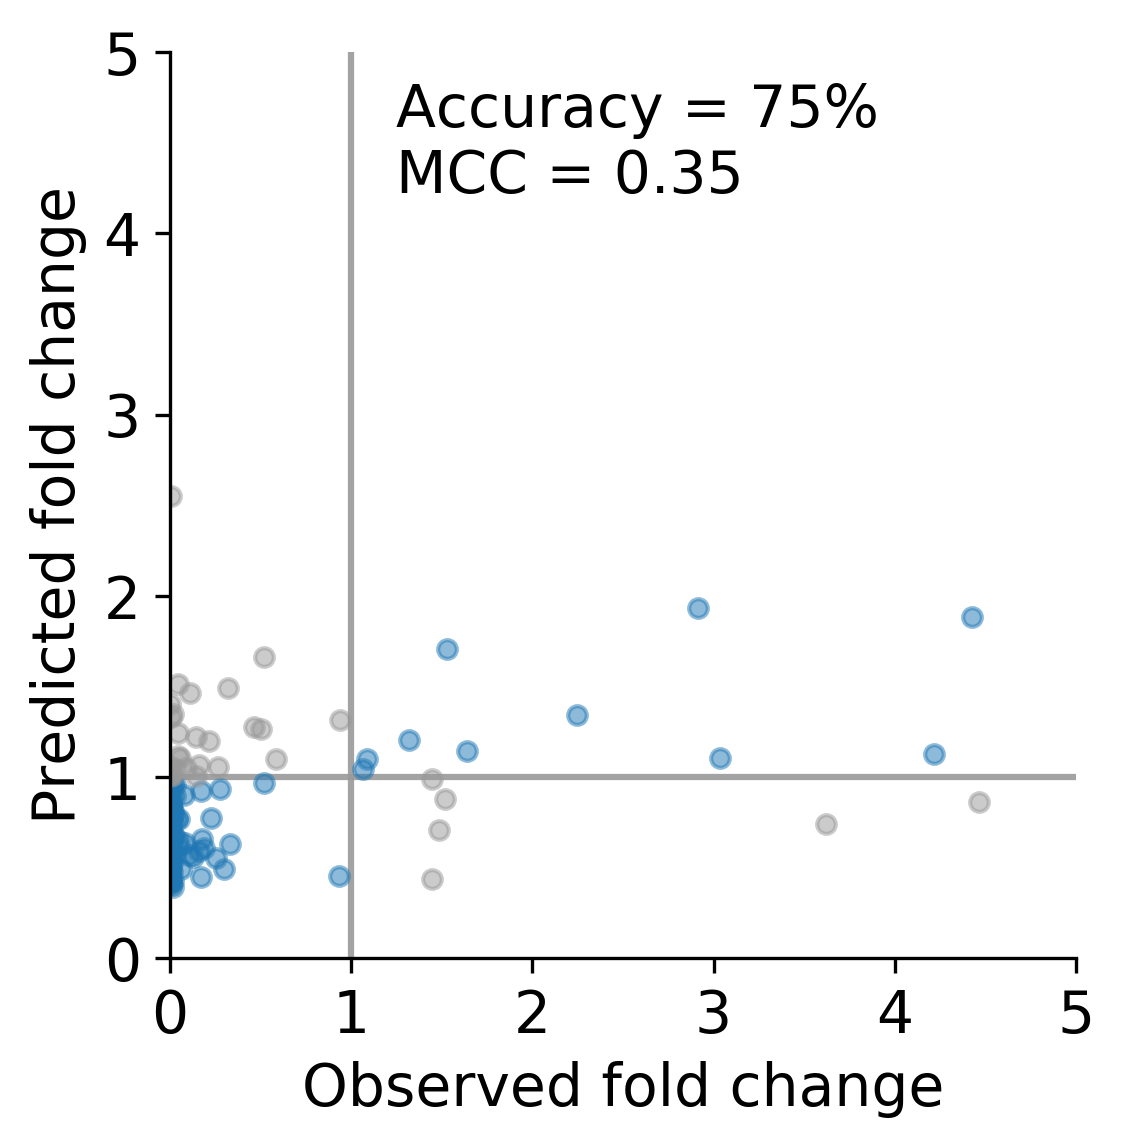

In [194]:
min_rate = 0
max_rate = 5
ax = test_df[accurate_clades].plot(
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    figsize=(4, 4)
)
ax = test_df[~accurate_clades].plot(
    ax=ax,
    x="observed_growth_rate",
    y="predicted_growth_rate",
    kind="scatter",
    alpha=0.5,
    color="#999999"
)

ax.axhline(1, color="#999999", alpha=0.9, zorder=-10)
ax.axvline(1, color="#999999", alpha=0.9, zorder=-10)
ax.text(
    0.25,
    0.9,
    "Accuracy = %i%%\nMCC = %.2f" % (accuracy * 100, mcc),
    transform=ax.transAxes,
    horizontalalignment="left",
    verticalalignment="center"
)

ax.set_xlabel("Observed fold change")
ax.set_ylabel("Predicted fold change")
ax.set_aspect("equal")
ax.set_xlim(min_rate, max_rate)
ax.set_ylim(min_rate, max_rate)

In [195]:
df_by_timepoint = model_df.groupby(["predictors", "timepoint", "sample"])

In [196]:
model_correlation_by_time = df_by_timepoint.apply(
    calculate_correlation_for_df
).reset_index(name="correlation")

In [197]:
test = model_correlation_by_time[model_correlation_by_time["predictors"].isin(["null", "lbi", "cTiterSub"])].dropna()

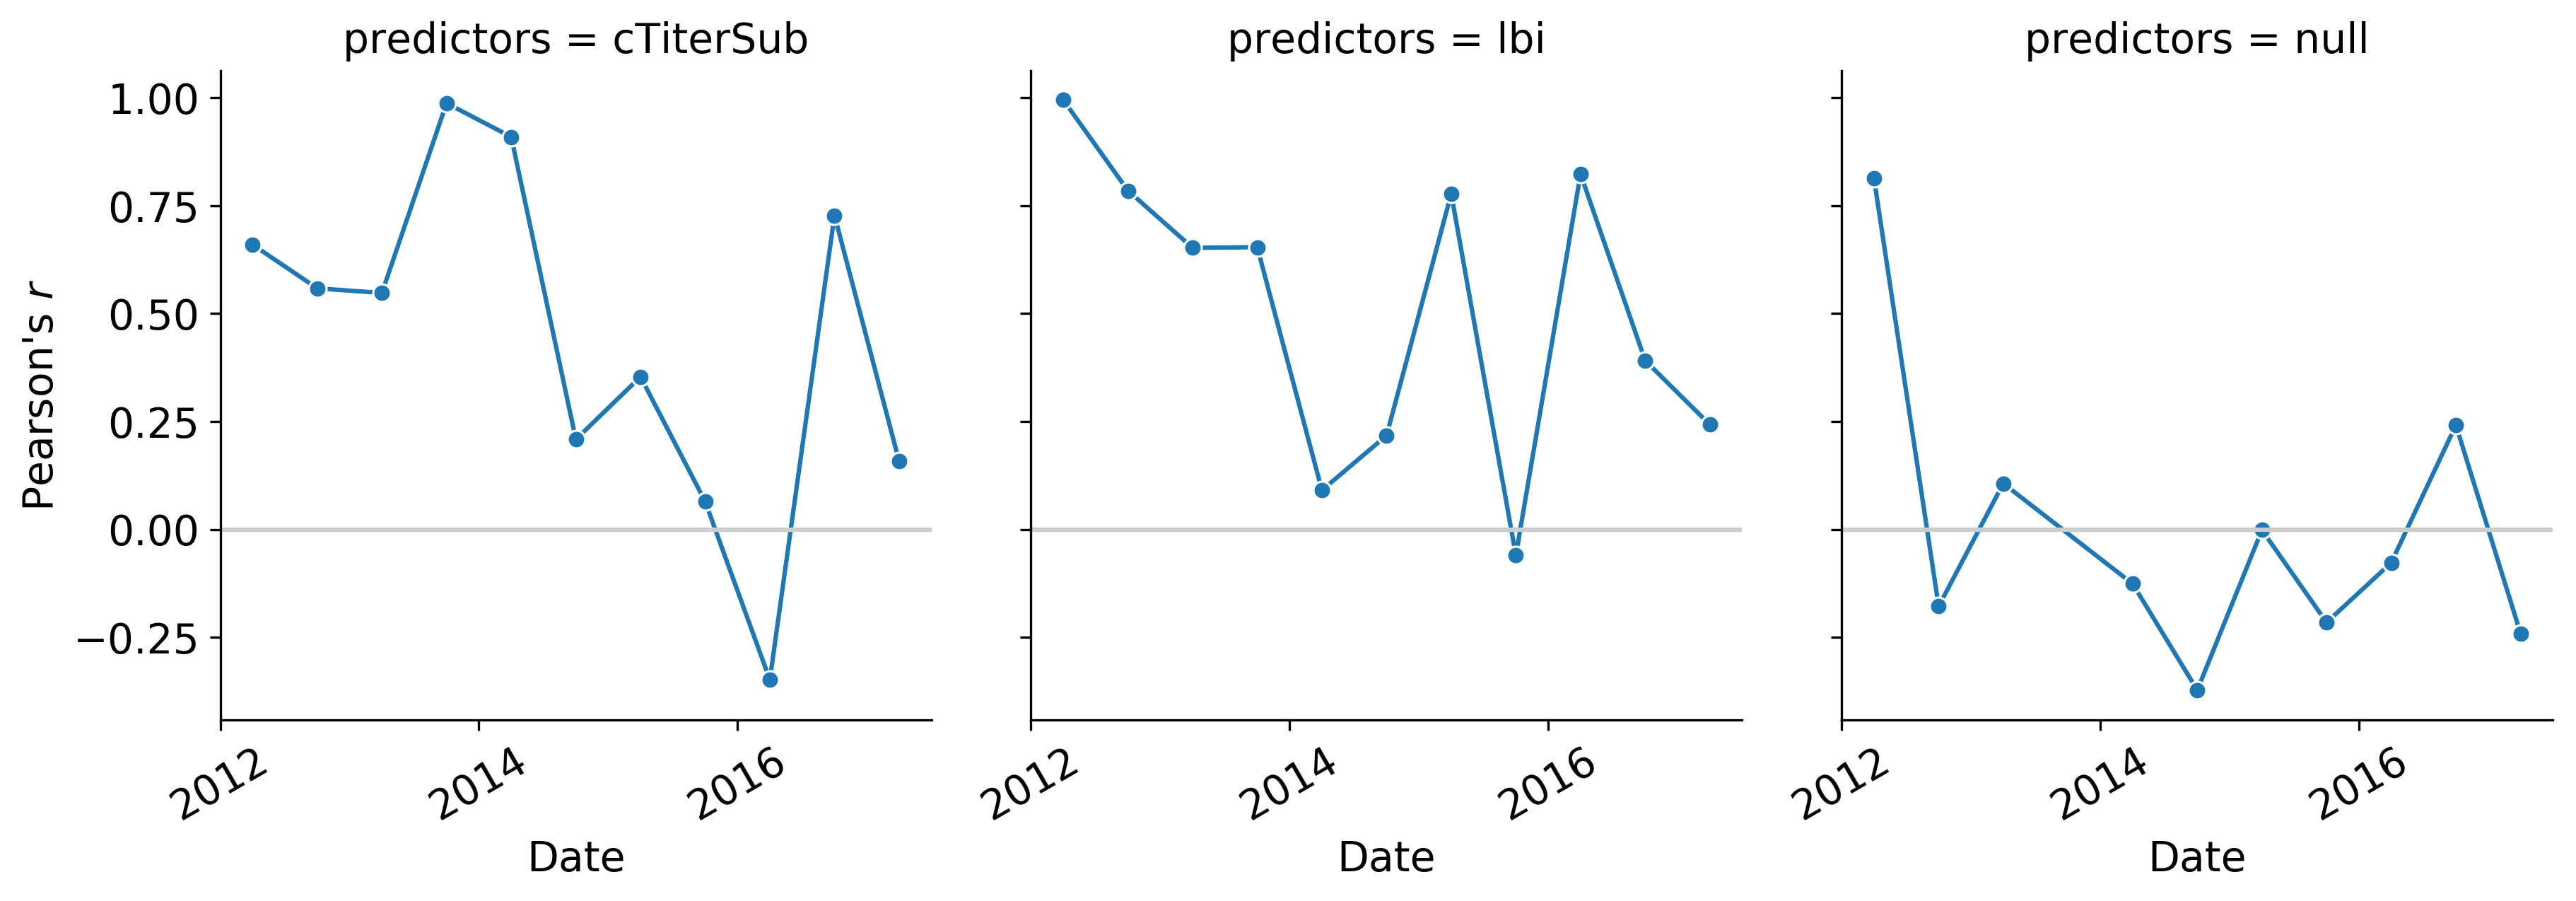

In [198]:
g = facet_time_plot(test, "correlation", "Pearson's $r$")

In [199]:
model_mcc_by_time = df_by_timepoint.apply(
    get_matthews_correlation_coefficient_for_data_frame
).reset_index(name="mcc")

In [200]:
mcc_test = model_mcc_by_time[model_mcc_by_time["predictors"].isin(["null", "lbi", "cTiterSub"])].dropna()

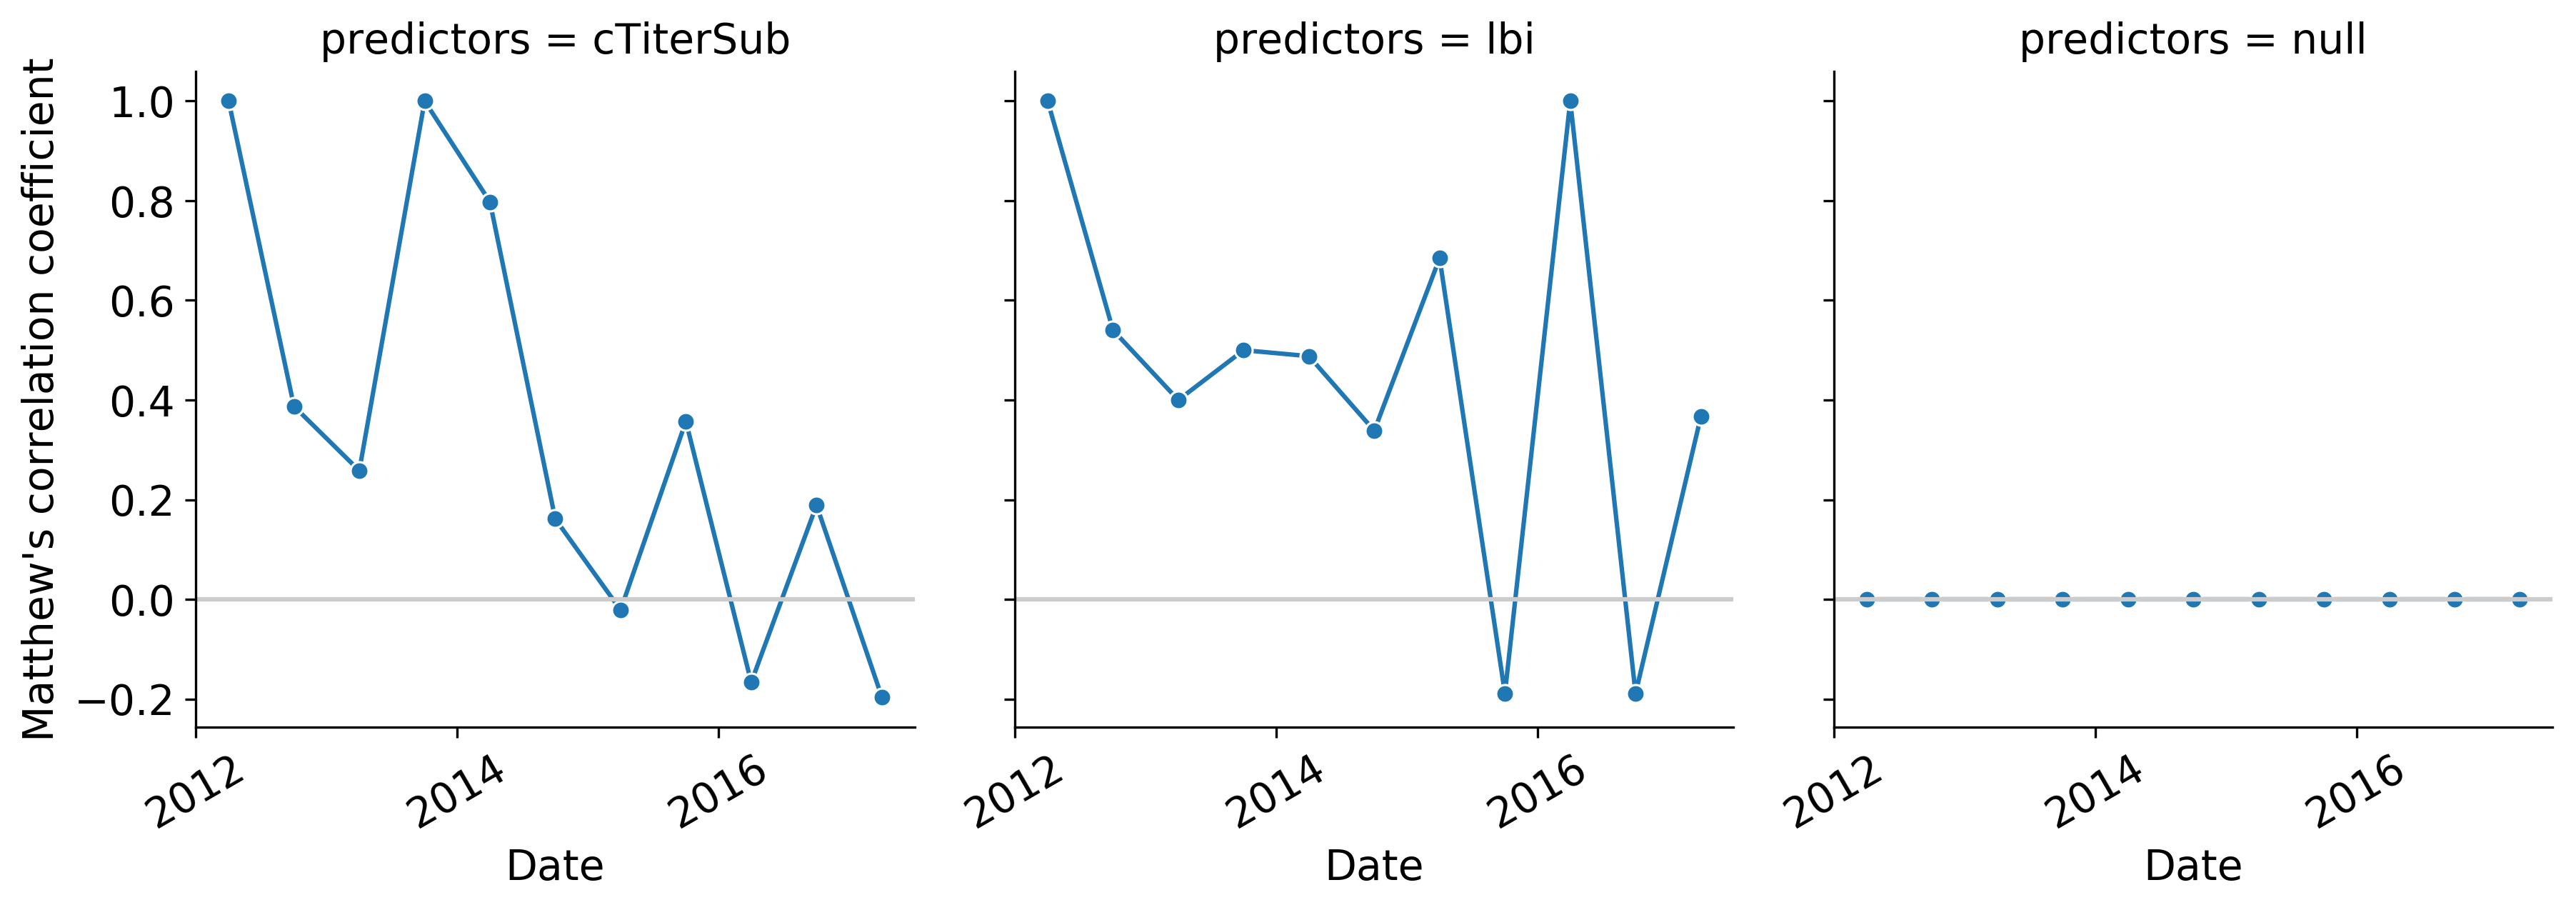

In [201]:
g = facet_time_plot(mcc_test, "mcc", "Matthew's correlation coefficient")

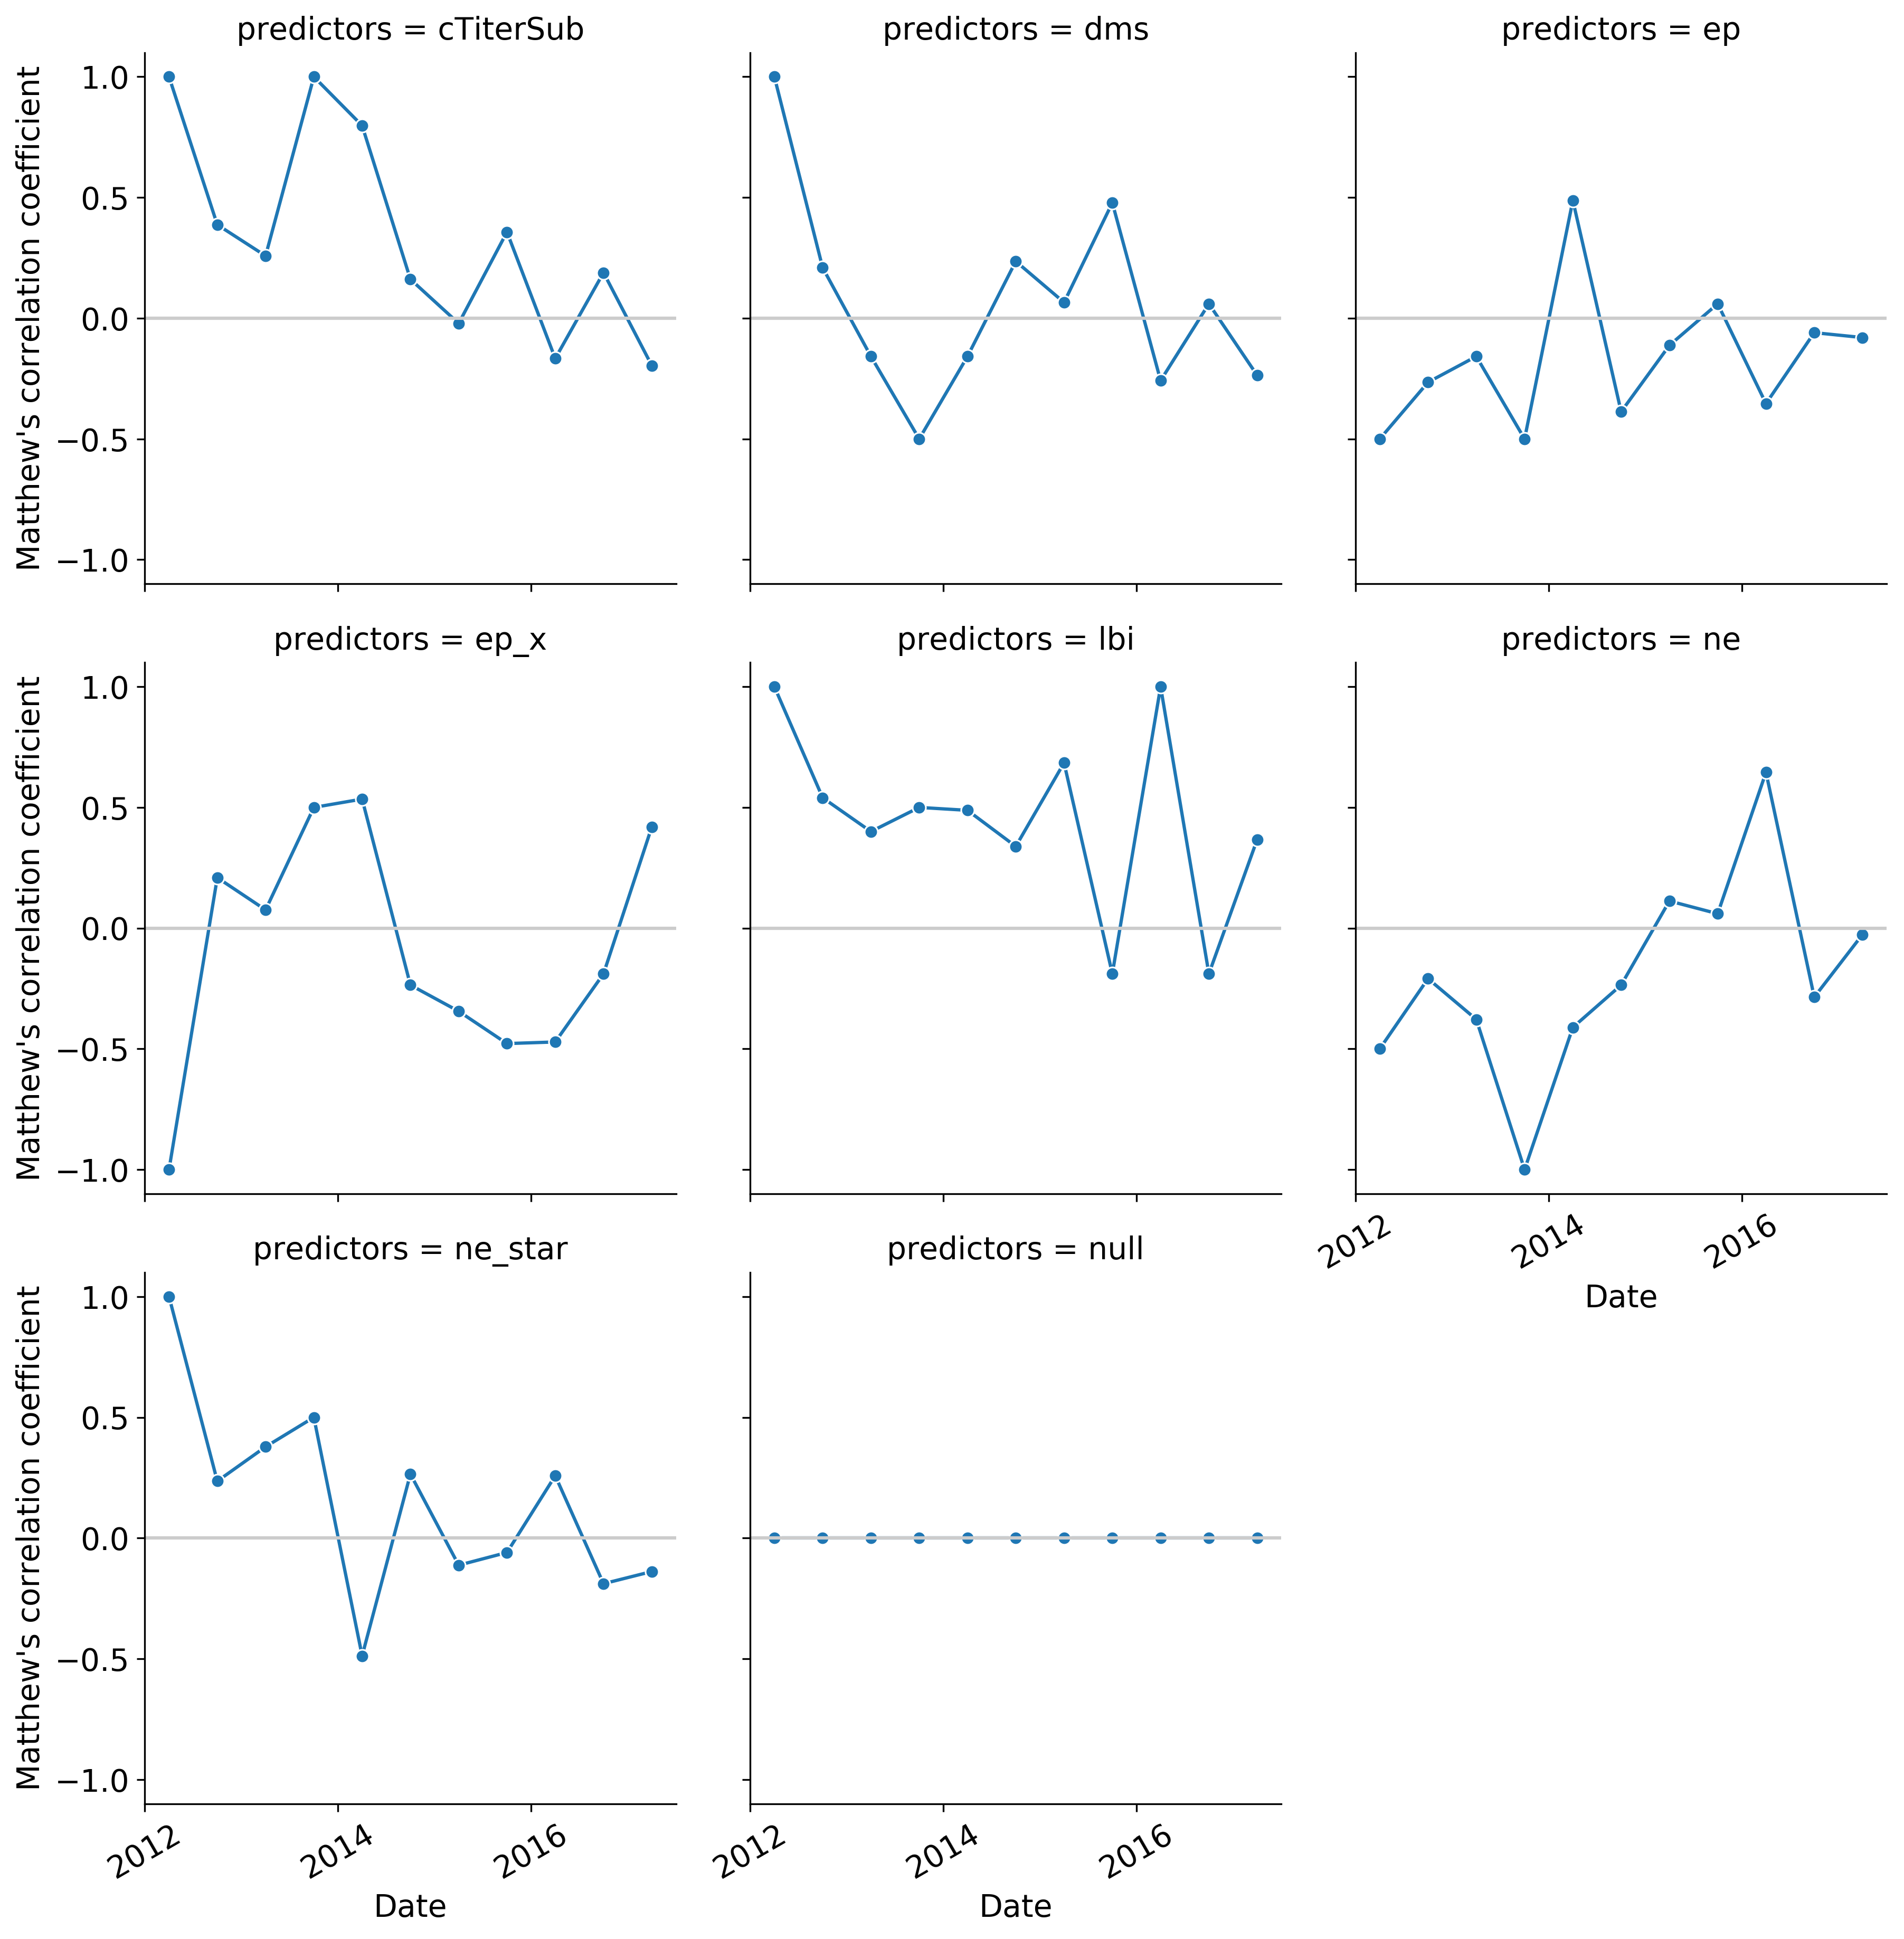

In [202]:
g = facet_time_plot(model_mcc_by_time, "mcc", "Matthew's correlation coefficient")

In [203]:
model_mse_by_time = df_by_timepoint.apply(
    mse_for_df
).reset_index(name="mse")

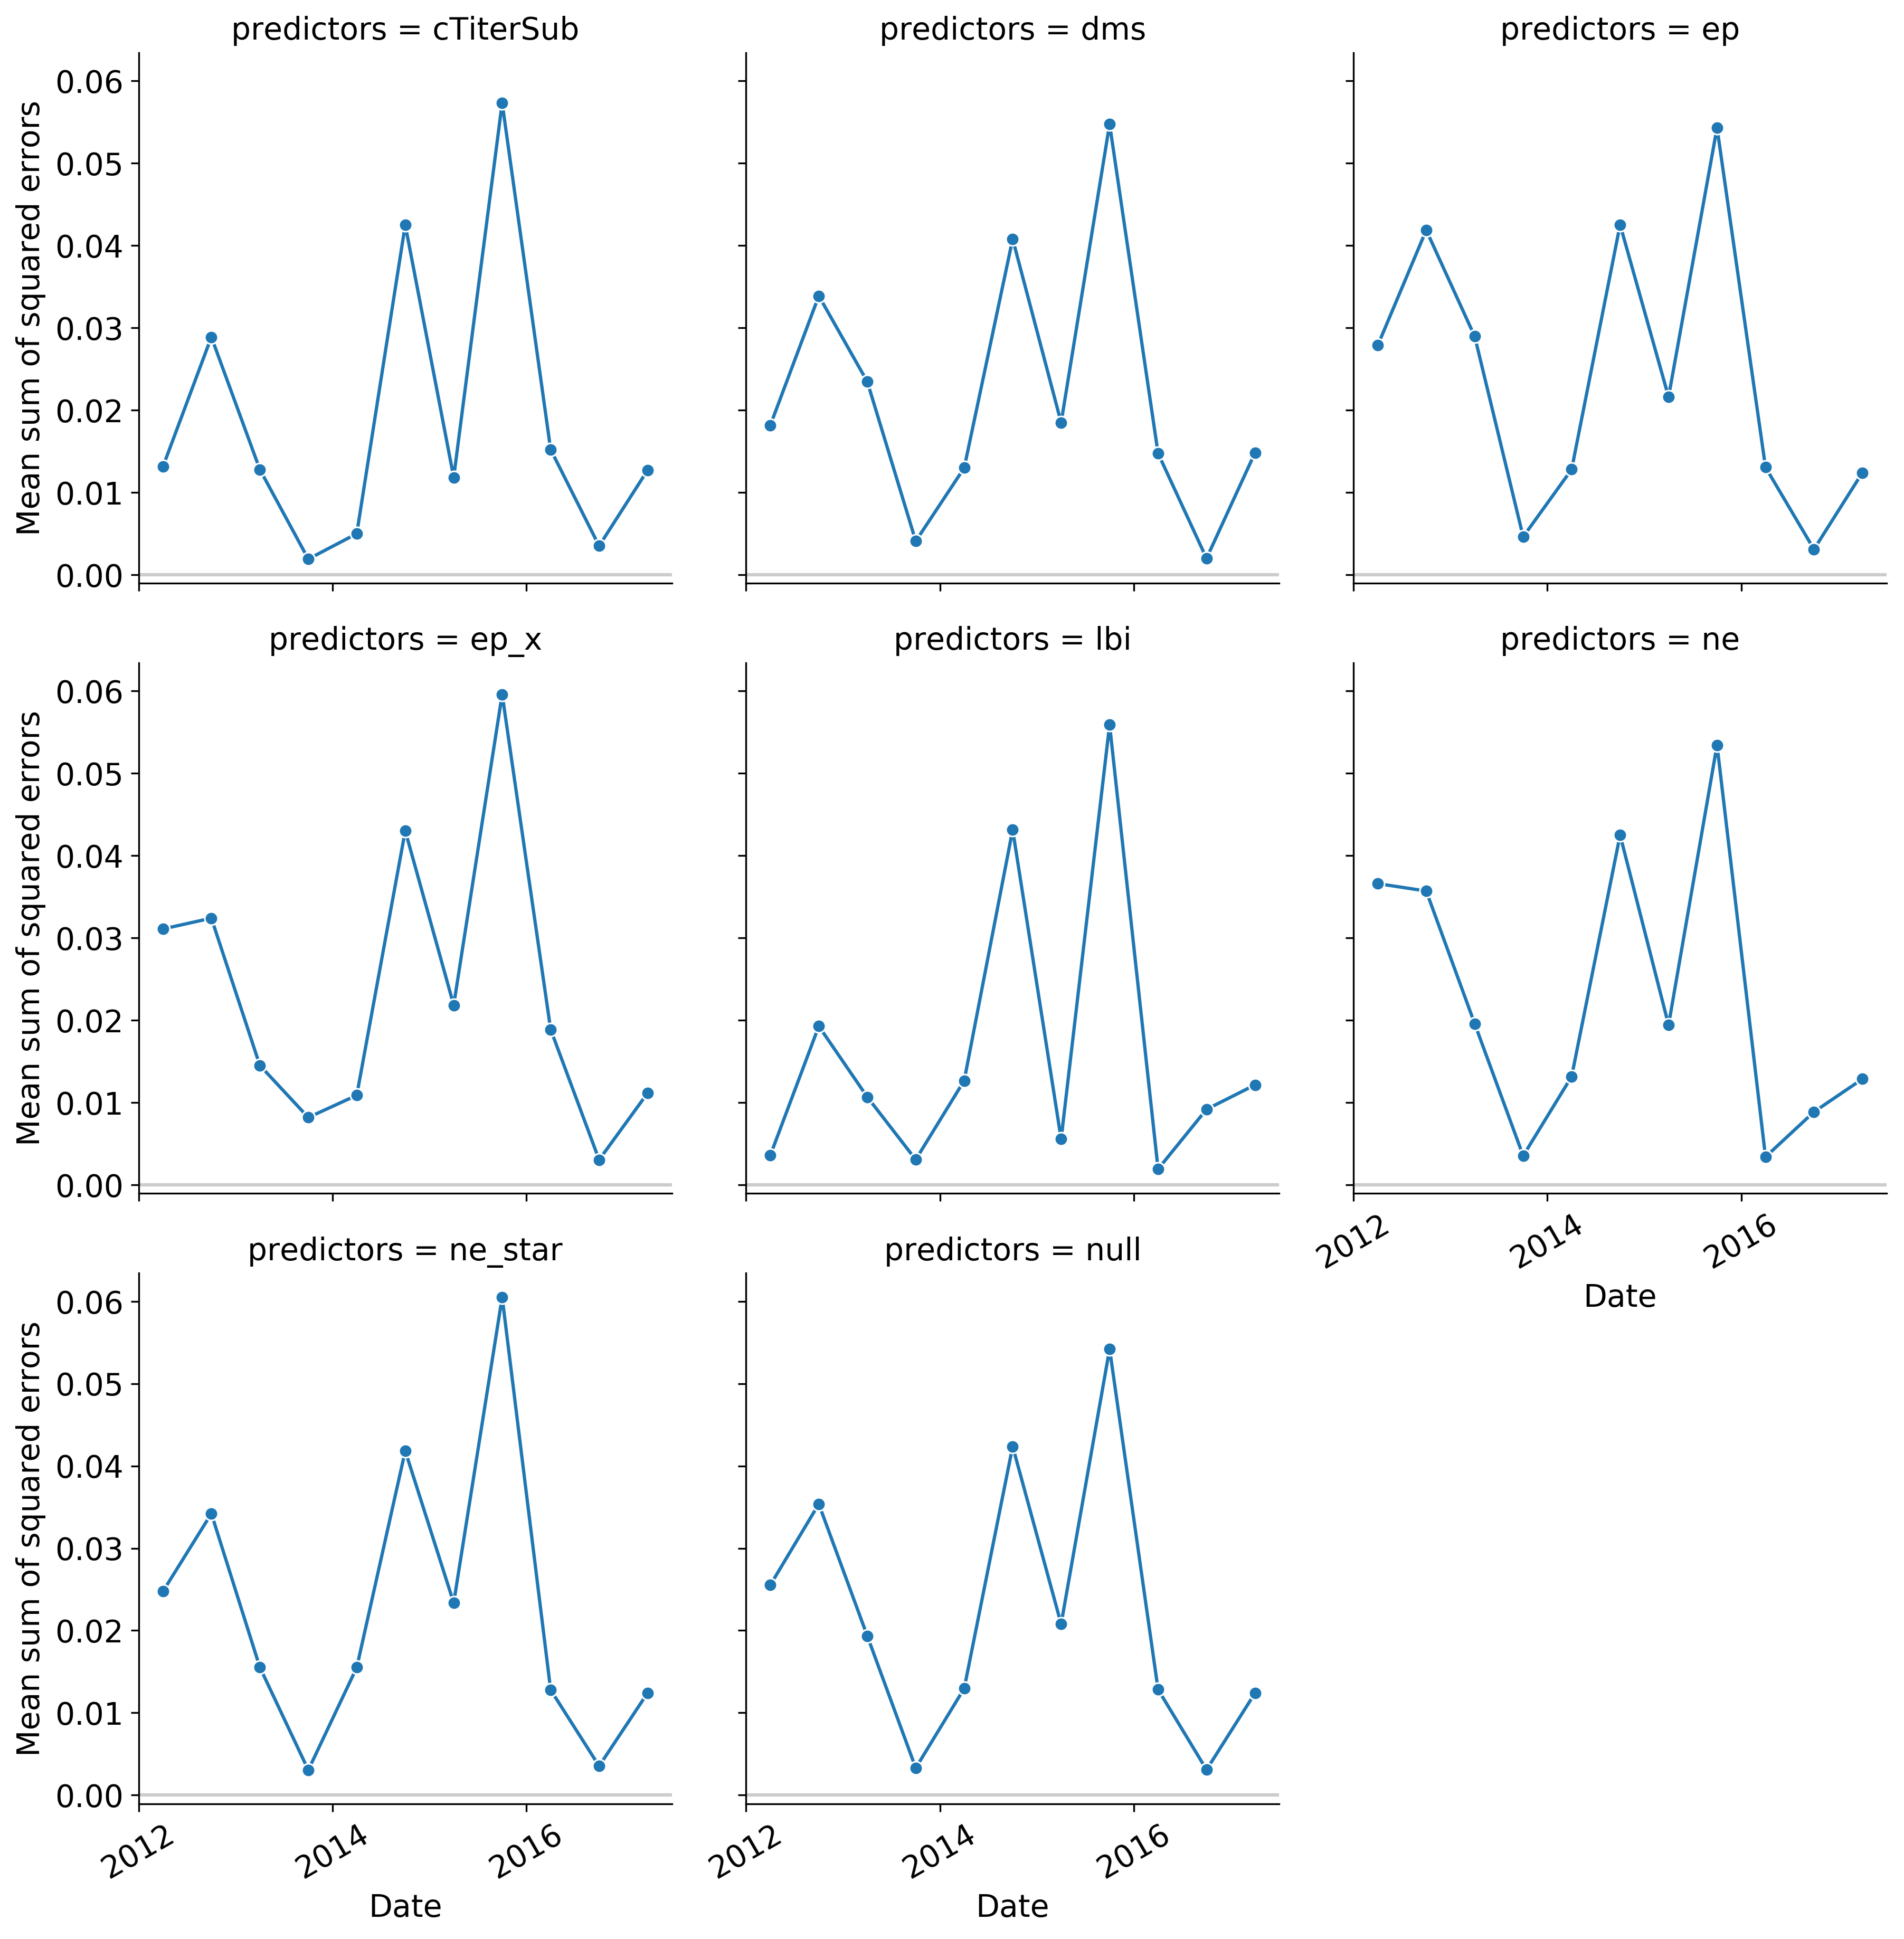

In [204]:
g = facet_time_plot(model_mse_by_time, "mse", "Mean sum of squared errors")